# WCPP: data collection

## Contents

- [Introduction](#introduction)
- [Libraries](#libraries)
- [Functions and settings](#functions_and_settings)
- [Datasets collection](#datasets_collection) 
  - [List of datasets](#list_of_datasets) 
  - [Data importing](#data_importing)
- [Datasets exploration](#datasets_exploration)
  - [Oxford Supertracker](#oxford_supertracker)
    - [Type](#type)
    - [Policy area and focus](#policy_area_and_focus)
    - [Dates](#dates)
    - [Authors, source, and provider](#authors_source_and_provider)
    - [World region, country coverage, level of observation](#world_region_country_coverage_level_of_observation)
- [Conclusion](#conclusion)

## Introduction
<a id='introduction'></a>

<div class="alert-info">
This notebook finds, imports and discusses datasets that tracked policies by governments around the world towards the Covid-19 pandemic. It shows what data was collected around the period from early 2020 to late 2022, gauging the quality of information available to researchers investigating the decisions made by policy-makers. It also selects datasets that meet the needs of the Worldwide Covid Policy Project. 
<br>
      
Knowing the landscape of data available on policy-making during the pandemic is useful, because it defines some of the boundaries within which humanity will be able to learn from what it did during the spread of the disease. While further data can be created by retrospective collection; and the value of the quantitative information available is only realisable with qualitative, contextual understanding that is not recorded in the datasets; the pandemic has passed and it is fair to assume that a great majority of data on it has already been collected. Understanding the size and quality of the dataspace therefore guides what can be learned about the decisions made and programmes implemented, and may also prompt improvements in data collection ahead of future crises.   

The Worldwide Covid Policy Project seeks to address the following questions:
 
- 1) What was the policy space available to governments?
- 2) Which parts of the policy space did governments use?
- 3) Why did governments use parts of the policy space?

To find any answers to the questions, the project needs datasets that meet the following criteria:

- 1) The data cover the period from at least early 2020 to late 2022.
- 2) There is enough data to allow statistical confidence in any computation.
- 3) There are sufficient variables to proxy the policy space available to decision-makers.
- 4) Enough administrative areas are covered around the world to allow for insightful comparative research.     
- 5) The data is available on open principles, allowing others to replicate the analysis and findings. 

There are numerous datasets available, many of which were conveniently tracked by the <a href="https://supertracker.spi.ox.ac.uk/policy-trackers/" target="_blank">Oxford Supertracker</a>. These are considered below with the  <a href="https://opendatacharter.net/principles/" target="_blank">Open Data Charter</a> principle of the data being 'accessible and usable' in mind. The <a href="https://supertracker.spi.ox.ac.uk/surveys/" target="_blank">surveys</a> collected by the tracker are left for any research on policy conditions and effects. All other non-machine readable entries are removed from the tracker, with the aim of creating a meta-database of Covid policy databases.   
    
</div>

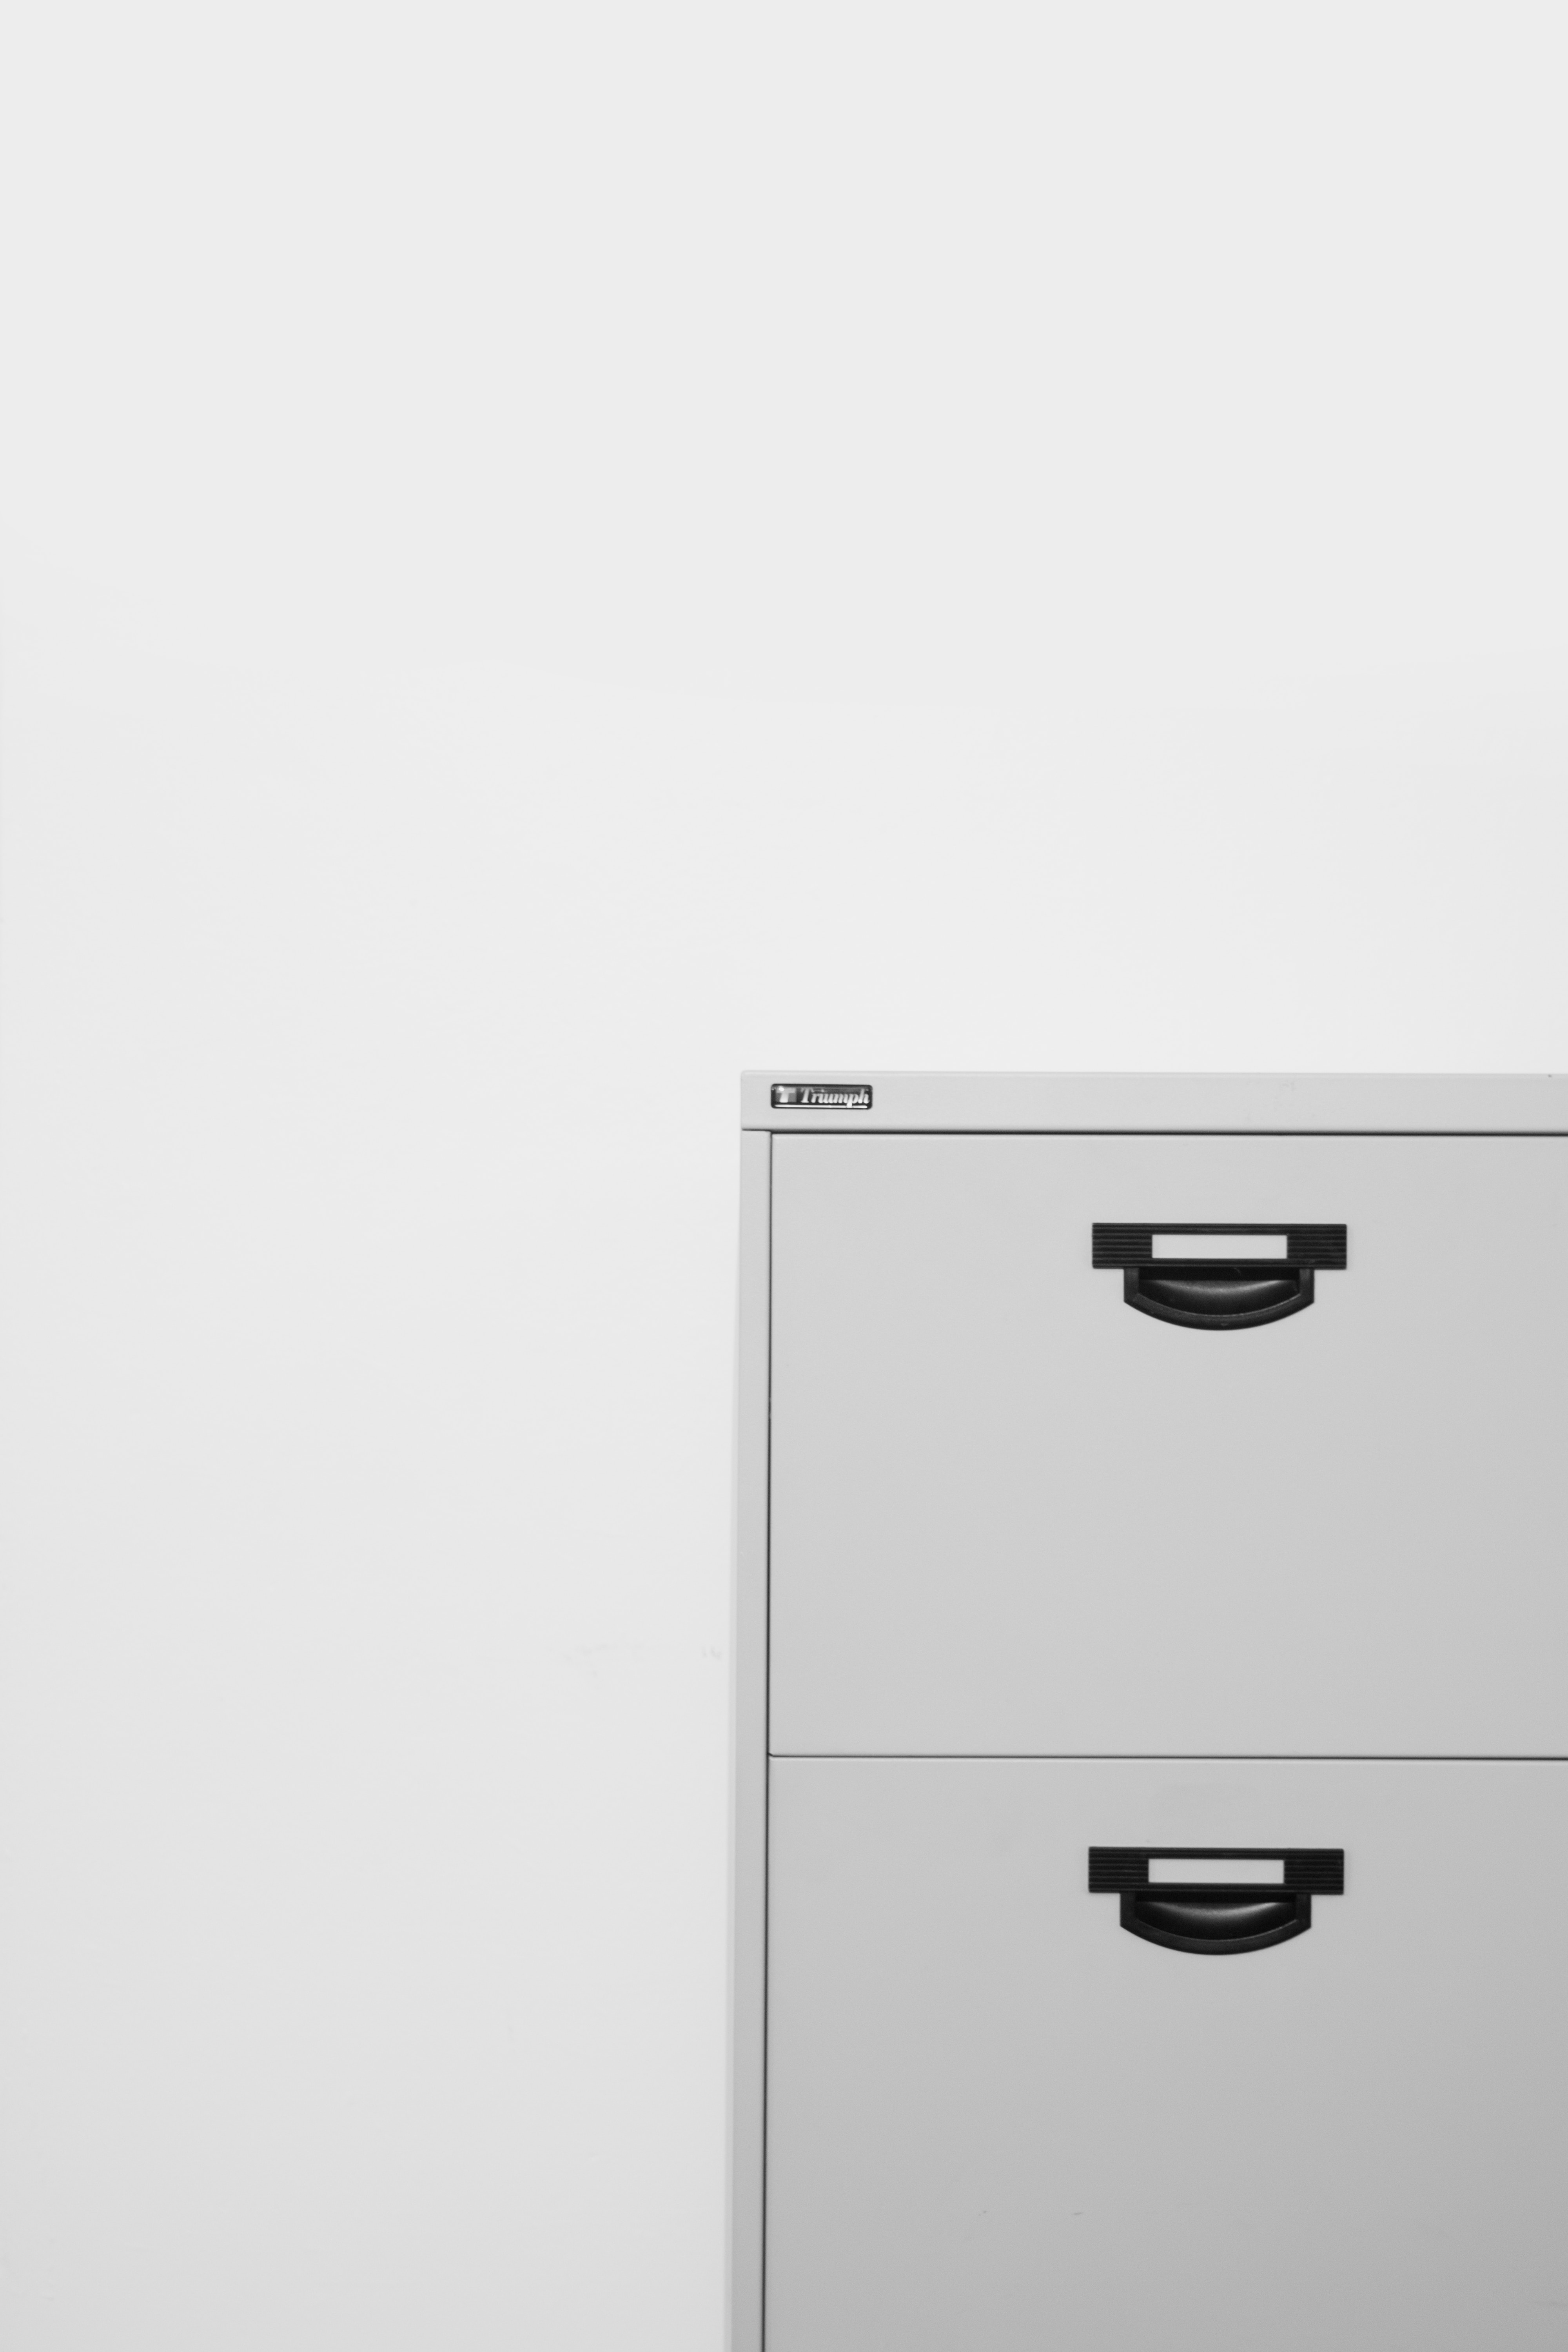

## Libraries
<a id='libraries'></a>

<div class="alert-info">
Importing libraries and packages that are used in the notebook. 
</div>

In [729]:
# Imports packages for managing and manipulating data
import pandas as pd
import numpy as np

# Imports date and time packages for dealing with such
import datetime

# Imports packages for visualising data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

## Functions and settings
<a id='functions_and_settings'></a>

<div class="alert-info">
Stating functions that are used in the notebook, and any adjustments to the operation of Python, Jupyter Notebook, and suchlike. 
</div>

In [730]:
# EDA checking function to test for basic aspects of data quality
def EDA_checks(dataset):
    #Prints the row labels
    print('ROW LABELS')
    print('')
    print(dataset.index)
    print('')
    #Prints the column names
    print('COLUMN NAMES')
    print('')
    print(dataset.columns)
    print('')
    #Prints the number of rows and columns
    print('NUMBER OF ROWS AND COLUMNS')
    print('')
    print(dataset.shape)
    print('')
    #Prints a concise summary of the dataset
    print('CONCISE SUMMARY')
    print('')
    print(dataset.info())
    print('')
    #Prints a concise summary of the dataset
    print('DESCRIPTION OF ALL COLUMNS')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    #Prints the number of null values in the dataset
    print('NUMBER OF NULL VALUES BY COLUMN')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    print(dataset.isnull().sum())

In [731]:
# Function to check for missing and duplicated values across a dataset
def missing_and_duplicated(dataset):
    print('DUPLICATES')
    print('')
    # Gives the sum of the duplicated rows in the dataframe
    duplicated_rows_sum = dataset.duplicated().sum()   
    print(f'There are {duplicated_rows_sum} duplicated rows in the dataset.')
    print('')
    print('The duplicated rows are as follows:')
    # Locates the duplicated rows of in the dataframe
    duplicated_rows = dataset[dataset.duplicated(keep=False)]
    display(duplicated_rows)
    print('NULLS')
    print('')
    # Gives the sum of null values
    null_values_sum = dataset.isna().sum().sum()
    print(f'There are {null_values_sum} null values in the dataset.')
    print('')
    print('The null values are in the following columns:')
    # Gives missing values by the rows in the dataframe
    null_values_by_column = dataset.isna().sum(axis = 0)
    display(null_values_by_column)
    print('')
    print('The null values above account for the following percentages of all null values:')
    # Gives the number of missing entries as a percentage of the dataframe, using the result from 'shape'
    nulls_percentage = dataset.isna().sum(axis = 0) / dataset.shape[0] * 100 
    display(nulls_percentage)

In [732]:
# Function for counting when policy areas tags appear together
def policy_tags_combined_count(priority_tag):
    # Sets tags counts
    agriculture = 0
    behavioural_responses_and_mobility = 0
    cases_and_deaths = 0
    civic_freedom_and_human_rights = 0
    education_policy = 0
    environmental_policy = 0
    gender = 0
    health_and_care_policy = 0
    international_development_philanthropy = 0
    macroeconomic_and_financial_policy = 0
    non_pharmaceutical_interventions = 0
    politics_elections_policy_making = 0
    prisons_courts_and_judiciary_systems = 0
    regions_and_cities = 0
    research_and_innovation = 0
    social_and_employment_policy = 0
    tax_policy = 0
    trade_policy_and_fdi = 0
    vaccination = 0
    
    # Loops through the entries in the edited tags
    for entry in policy_areas_edited:
        # Identifies if the target term is in the entry
        if priority_tag in entry:
            # Loops through the remaining tags, counting their occurrences
            if 'Agriculture' in entry:
                agriculture += 1
            if 'Behavioural Responses and Mobility' in entry:
                behavioural_responses_and_mobility += 1
            if 'Cases and Deaths' in entry:
                cases_and_deaths += 1
            if 'Civic Freedom and Human Rights' in entry:
                civic_freedom_and_human_rights += 1
            if 'Education Policy' in entry:
                education_policy += 1
            if 'Environmental Policy' in entry:
                environmental_policy += 1
            if 'Gender' in entry:
                gender += 1
            if 'Health and Care Policy' in entry:
                health_and_care_policy += 1
            if 'International Development, Philanthropy' in entry:
                international_development_philanthropy += 1
            if 'Macroeconomic and Financial Policy' in entry:
                macroeconomic_and_financial_policy += 1
            if 'Non-Pharmaceutical Interventions' in entry:
                non_pharmaceutical_interventions += 1
            if 'Politics, Elections, Policy Making' in entry:
                politics_elections_policy_making += 1
            if 'Prisons, Courts and Judiciary Systems' in entry:
                prisons_courts_and_judiciary_systems += 1
            if 'Regions and Cities' in entry:
                regions_and_cities += 1
            if 'Research and Innovation' in entry:
                research_and_innovation += 1
            if 'Social and Employment Policy' in entry:
                social_and_employment_policy += 1
            if 'Tax Policy' in entry:
                tax_policy += 1
            if 'Trade Policy and FDI' in entry:
                trade_policy_and_fdi += 1
            if 'Vaccination' in entry:
                vaccination += 1
    
    # Creates dictionary for counts
    policy_areas_grouped_tags_counts = {}
    
    # Checks if select tags are the priority one, counting them if not
    if priority_tag != 'Agriculture':
        policy_areas_grouped_tags_counts['Agriculture'] = agriculture
    if priority_tag != 'Behavioural Responses and Mobility':
        policy_areas_grouped_tags_counts['Behavioural Responses and Mobility'] = behavioural_responses_and_mobility
    if priority_tag != 'Cases and Deaths':
        policy_areas_grouped_tags_counts['Cases and Deaths'] = cases_and_deaths
    if priority_tag != 'Civic Freedom and Human Rights':
        policy_areas_grouped_tags_counts['Civic Freedom and Human Rights'] = civic_freedom_and_human_rights
    if priority_tag != 'Education Policy':
        policy_areas_grouped_tags_counts['Education Policy'] = education_policy
    if priority_tag != 'Environmental Policy':
        policy_areas_grouped_tags_counts['Environmental Policy'] = environmental_policy
    if priority_tag != 'Gender':
        policy_areas_grouped_tags_counts['Gender'] = gender
    if priority_tag != 'Health and Care Policy':
        policy_areas_tags_counts['Health and Care Policy'] = health_and_care_policy
    if priority_tag != 'International Development, Philanthropy':
        policy_areas_grouped_tags_counts['International Development, Philanthropy'] = international_development_philanthropy
    if priority_tag != 'Macroeconomic and Financial Policy':
        policy_areas_grouped_tags_counts['Macroeconomic and Financial Policy'] = macroeconomic_and_financial_policy
    if priority_tag != 'Non-Pharmaceutical Interventions':
        policy_areas_grouped_tags_counts['Non-Pharmaceutical Interventions'] = non_pharmaceutical_interventions
    if priority_tag != 'Politics, Elections, Policy Making':
        policy_areas_grouped_tags_counts['Politics, Elections, Policy Making'] = politics_elections_policy_making
    if priority_tag != 'Prisons, Courts and Judiciary Systems':
        policy_areas_grouped_tags_counts['Prisons, Courts and Judiciary Systems'] = prisons_courts_and_judiciary_systems
    if priority_tag != 'Regions and Cities':
        policy_areas_grouped_tags_counts['Regions and Cities'] = regions_and_cities
    if priority_tag != 'Research and Innovation':
        policy_areas_grouped_tags_counts['Research and Innovation'] = research_and_innovation
    if priority_tag != 'Social and Employment Policy':
        policy_areas_grouped_tags_counts['Social and Employment Policy'] = social_and_employment_policy
    if priority_tag != 'Tax Policy':
        policy_areas_grouped_tags_counts['Tax Policy'] = tax_policy
    if priority_tag != 'Trade Policy and FDI':
        policy_areas_grouped_tags_counts['Trade Policy and FDI'] = trade_policy_and_fdi
    if priority_tag != 'Vaccination':
        policy_areas_grouped_tags_counts['Vaccination'] = vaccination
    
    # Creates dataframe with counts
    counts_dataframe = pd.DataFrame.from_dict(policy_areas_grouped_tags_counts, orient ='index', columns = ['Count']).sort_values(by ='Count', ascending = False)

    # Makes barchart for the counts
    plt.figure()
    plt.bar(counts_dataframe.index, counts_dataframe['Count'], width = 0.9)
    plt.xticks(rotation=90)
    plt.title(f'Count of policy area tags that occur with {priority_tag}')
    plt.xlabel('Policy area')
    plt.ylabel('Count')
    plt.yticks(range(1,15))
    
    # Shows the chart as the final output
    plt.show()

In [733]:
# Shows bar charts for terms in the definitive as they occur in combination with others
def grouped_tags_charts(policy_areas_definitive, policy_areas_edited):
    # Loops through the definitive list of policy areas
    for entry in policy_areas_definitive:
        # Uses function to count terms and produce charts
        policy_tags_combined_count(entry)

In [734]:
# Sets column widths to show all of the text, when un-hashed
#pd.set_option('display.max_columns', None)
#pd.set_option('display.expand_frame_repr', None)
#pd.set_option('max_colwidth', None)

## Datasets collection
<a id='datasets_collection'></a>

<div class="alert-info">
Showing, importing and initially investigating datasets that have been listed by the Oxford Supertracker. 
</div>

### List of datasets
<a id='list_of_datasets'></a>

<div class="alert-info">
The datasets used in the notebook: <a href="https://supertracker.spi.ox.ac.uk/policy-trackers/" target="_blank">Oxford Supertracker</a>
</div>

### Data importing
<a id='data_importing'></a>

<div class="alert-info">
Importing the datasets used in the notebook. 
</div>

In [735]:
# Imports Oxford Supertracker list of Covid-19 policy datasets
oxford_supertracker = pd.read_csv('/Users/lawrencekay/CSS/Projects/wcp/data/oxford_supertracker_policy_trackers.csv')

## Datasets exploration
<a id='datasets_exploration'></a>

<div class="alert-info">
The first objective for this notebook is to gauge the quantity and quality of data on Covid policy-making available to researchers, thereafter selecting which might be best for answering the Worldwide Covid Policy Project questions. We'll address the first by looking at the Oxford Supertracker, and then second by considering select datasets in it. 
</div>

### Oxford Supertracker
<a id='oxford_supertracker'></a>

<div class="alert-info">
Let's start by having a look at the number and size of the Covid-19 policy datasets available. 
</div>

In [736]:
# Reads the Oxford Supertracker list
oxford_supertracker

Title                                                                                          Link                                                                                                Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Country Coverage      Data Format                                                                                                                                                                                                                                                                                                                           Authors            Type    Level of Observation  Start Date    End Date                                                                      Source Language                                                                                                                                                                              World Region                     Provider
0                                                     NaN                                                                                           NaN                                                                                                        NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

<div class="alert-info">
The Oxford Supertracker has obviously monitored a great many Covid datasets, and let's look at its head and tail.  
</div>

In [737]:
# Gives the top of the dataset
oxford_supertracker.head()

Title                                                                                         Link                                                                                   Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Country Coverage Data Format                                                                                                                                                                                                                                                                                                                           Authors            Type    Level of Observation  Start Date    End Date                                                                      Source Language                                                                                                                                                                              World Region                     Provider
0                                          NaN                                                                                          NaN                                                                                           NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [738]:
# Gives the bottom of the dataset
oxford_supertracker.tail()

Title                                                                                          Link                                                                                                Policy Area                                                                                                                                                                                                                                                                                                                               Focus                                                                                                                                           Country Coverage      Data Format                                                                                                                                          Authors            Type    Level of Observation  Start Date    End Date                              Source Language                                World Region                     Provider
228                  ECDC-JRC Response Measures Database                                            https://covid-statistics.jrc.ec.europa.eu/RMeasures                                                                           Non-Pharmaceutical Interventions                                                                                                                                                  A regularly updated archive of non-pharmaceutical interventions (NPIs) in seven categories introduced by 30 countries in the European Union (EU) and European Economic Area (EEA).       BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; FRA; DEU; GRC; HUN; ISL; IRL; ITA; LVA; LIE; LTU; LUX; MLT; NLD; NOR; POL; PRT; ROU; SVK; SVN; ESP; SWE; AUT        csv; xlsx  [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en); [Joint Research Centre](https://twitter.com/eu_sciencehub)  Policy Tracker                national  2020-01-01  up-to-date        Governmental agencies; Media      NaN  West Europe; Eastern Europe & Central Asia  International organisations
229                              COVID-19 School Data Hub                                                           https://www.covidschooldatahub.com/                                                                                           Education Policy                                                                                                                                                                   A central database for educators, researchers, and policymakers to understand how the COVID-19 pandemic shaped students’ modes of learning in 2020-21 in the USA.                                                                                                                                                        USA  html; csv; xlsx                                                                                                           [Emily Oster](https://emilyoster.net/)  Policy Tracker            sub-national  2020-09-01  2021-05-31               Governmental agencies      NaN                               North America                    Academics
230                    State Laws and Mandates by Vaccine                                                                https://www.immunize.org/laws/                                                                                                Vaccination                                                                                                                                                                                                                                                          State mandates on immunization and vaccine-preventable diseases in the USA                                                                                                                                                        USA             html                                                    

<div class="alert-info">
From just a quick view of the datasets listed, it looks like there will be a spread across a great many topic areas available for comparing countries. There could also be a good number that cover the right time window. 
<br>    
    
Now let's get a more comprehensive view of what's in the tracker by running some basic checks on the dataset. 
</div>

In [739]:
# Runs basic EDA checks on the dataset
EDA_checks(oxford_supertracker)

ROW LABELS

RangeIndex(start=0, stop=233, step=1)

COLUMN NAMES

Index(['Title', 'Link', 'Policy Area', 'Focus', 'Country Coverage',
       'Data Format', 'Authors', 'Type', 'Level of Observation', 'Start Date',
       'End Date', 'Source', 'Language', 'World Region', 'Provider'],
      dtype='object')

NUMBER OF ROWS AND COLUMNS

(233, 15)

CONCISE SUMMARY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 232 non-null    object
 1   Link                  232 non-null    object
 2   Policy Area           232 non-null    object
 3   Focus                 232 non-null    object
 4   Country Coverage      232 non-null    object
 5   Data Format           231 non-null    object
 6   Authors               232 non-null    object
 7   Type                  188 non-null    object
 8   Level of Observation  217 non

<div class="alert-info">
The tracker looks like it has a lot of interesting variety in it, with enough consistency across the column counts to mean that the data might not be too much of a mess. Interestingly, the most null values are found in the 'type' and 'level of observation' columns - a pattern which is also basically repeated for the rows - which might be because these characteristics are ambiguous for some datasets. Let's see. 
<br>
    
Let's check for missing and duplicated entries in more depth. 
</div>

In [740]:
# Checks for missing and duplicated rows and columns in the dataset
missing_and_duplicated(oxford_supertracker)

DUPLICATES

There are 0 duplicated rows in the dataset.

The duplicated rows are as follows:


Empty DataFrame
Columns: [Title, Link, Policy Area, Focus, Country Coverage, Data Format, Authors, Type, Level of Observation, Start Date, End Date, Source, Language, World Region, Provider]
Index: []

NULLS

There are 313 null values in the dataset.

The null values are in the following columns:


Title                     1
Link                      1
Policy Area               1
Focus                     1
Country Coverage          1
Data Format               2
Authors                   1
Type                     45
Level of Observation     16
Start Date                5
End Date                  5
Source                    1
Language                230
World Region              1
Provider                  2
dtype: int64


The null values above account for the following percentages of all null values:


Title                    0.429185
Link                     0.429185
Policy Area              0.429185
Focus                    0.429185
Country Coverage         0.429185
Data Format              0.858369
Authors                  0.429185
Type                    19.313305
Level of Observation     6.866953
Start Date               2.145923
End Date                 2.145923
Source                   0.429185
Language                98.712446
World Region             0.429185
Provider                 0.858369
dtype: float64

<div class="alert-info">
There are no duplicated rows in the dataset, thankfully, but null values are found in nearly all of the columns. The type, level of observation, and language, hold most of them. The last of these might not be an issue as the language is likely to be English. The start and end dates might be more troublesome, as they will be necessary to make the data usable. 
<br>
    
Before we get into looking at what's in the datasets, let's count how many there are. From just the view of the head of the tracker, we saw that row zero is empty. And from the basic checks just above, that means that there should be 232 datasets. But let's verify that.      
    
</div>

In [741]:
# Drops row zero from the dataset
oxford_supertracker.drop(index = 0, inplace = True)

In [742]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [743]:
# Checks the change
oxford_supertracker

Title                                                                                          Link                                                                                                Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Country Coverage      Data Format                                                                                                                                                                                                                                                                                                                           Authors            Type    Level of Observation  Start Date    End Date                                                                      Source Language                                                                                                                                                                              World Region                     Provider
0                                 WHO PHSM: Public health and social measures                          https://www.who.int/emergencies/diseases/novel-coronavirus-2019/phsm               Non-Pharmaceutical Interventions; Health and Care Policy; Macroeconomic and Financial Policy   measures or actions by individuals, institutions, communities, local and national governments and international bodies to slow or stop the spread of an infectious disease. Establishing one single open-content dataset by merging pre-existing datasets from WHO, the London School of Hygiene and Tropical Medicine, ACAPS, University of Oxford, Global Public Health Intelligence Network, US Centers for Disease Control and Prevention and the Complexity Science Hub Vienna.  worldwide; AFG; ALB; DZA; ASM; AND; AGO; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GUF; GAB; GMB; GEO; DEU; GHA; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HUN; ISL; IND; IDN; IRN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LAO; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; FSM; MCO; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NIU; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; REU; ROU; RUS; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; SYR; TJK; T

In [744]:
# Counts the number of original entries
number_original_entries = oxford_supertracker['Title'].nunique()

# Gives the number of unique entries for the level of observation
print(f"There are {number_original_entries} original entries in the dataset.") 

There are 232 original entries in the dataset.


<div class="alert-info">
What are the dataset names? 
</div>

In [745]:
# Gets the list of dataset names from the tracker
datasets_names = pd.DataFrame(oxford_supertracker['Title'])

# Shows list of names
datasets_names.sample(50)

Title
18                                                                                                                                    Bruegel fiscal policy dataset
130                                                                                                                                      COVID-19 IP Policy Tracker
105                                                                                                                                 CIHI COVID-19 Intervention Scan
73                                                                                                                                    Apple Mobility Trends Reports
205                                                                                                                                        COVID-19 and World Trade
91                                                                                                                       UCLA Law Covid-19 Behind Bars Data Project
193                                                                                                                                  Test and Trace – US State Data
166                                                                                                                                     UNINFO COVID-19 Data Portal
160                                                                            Social protection responses to COVID-19 in the Global South – database and dashboard
212                                                                                                                                   COVID-19 SBA loans above 150k
65                                                                                                                                       OECD multilevel governance
90                                                                                                                     Brennan Center for Justice Courts' Responses
67                                                                                                               Resources State and Local Government Practitioners
22                                                                                                                   COVID-19 Fiscal Response Tracker and world map
173                                                                                                                                      SafeGraph COVID-19 Toolkit
23                                                                                                                                               IMF Fiscal Monitor
55                                                                                                              UNESCO COVID-19 Educational Disruption and Response
135                                                                                                International Review of Leave Policies and Related Research 2020
174                                                                                                                          Unacast COVID-19 Location Data Toolkit
27                                                                                                                                Firm-level risk Covid-19 exposure
10                                                                                                                                COVID19 Afrique Données Recherche
218                                                                                                                                        COVID-19 Vaccine Tracker
25                                                                                                                        The Opportunity Insights Economic Tracker
66                                                                                                                                            OECD cities responses
13                                                        

<div class="alert-info">
So, we can see that there seem to be a good number of datasets that could have interesting information for a comparative analysis. The themes cover topics such as education, economic stimulus, prisons, and health. And because we've dropped the empty row, every row has at least policy and country coverage information. 
    
<br>
    
But we're only interested in numeric data so let's look at the formats used. 
</div>

In [746]:
# Shows the entries for the data formats
oxford_supertracker['Data Format'].unique()

array(['csv', 'xlsx', 'csv; API', 'csv; xlsx', 'html; csv', 'csv;',
       'xlsx; csv', 'csv;  xlsx', ' html; xlsx',
       ' html; non-downloadable', ' pdf; html', ' pdf', 'xlsx; pdf',
       ' html; pdf', ' csv; tsv; dta', ' html; csv; xlsx', ' xlsx',
       ' csv', ' pdf; xlsx', 'html; pdf; csv', ' pdf; html; xlsx',
       ' html; csv; json', 'csv; xlsx; pdf; html', 'csv;  html',
       ' pdf; json', ' csv; json', ' csv; pdf', ' csv; html', 'docx',
       ' xlsx; csv; html', ' xlsx; pdf; html', 'pdf',
       'html; non-downloadable', 'csv; PostgreSQL', 'html; pdf',
       'xlsx; dta', 'xlsx; csv; json', 'xlsx; json', 'html', 'csv; html',
       nan, 'csv;xlsx', 'xlsx; html', 'html; pdf; docx',
       'csv; xlsx; rdf; rss', 'html; csv; xlsx; pdf', 'html; pdf; xlsx',
       'html; xlsx', 'html; pdf; xlsx; docx',
       'csv; json; kmz; rdf; rss; xlsx', 'csv; json',
       'html; csv; pdf; json', 'html; csv; xlsx'], dtype=object)

In [747]:
# Shows the number of unique data format entries
print(f"There are {len(oxford_supertracker['Data Format'].unique())} types of data format in the dataset.")

There are 53 types of data format in the dataset.


<div class="alert-info">
There are a couple of entries that are known to have additiona data formats, so let's change those:
<br>
    
- Real Time Population Survey, which offers data in the 'xlsx' format. 
- Vera Institute of Justice prison data, which offers data in the 'csv' format. 
</div>

In [748]:
# Changes the Real Time Population Survey data format
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Real Time Population Survey', ['Data Format']] = 'html; pdf; xlsx'


In [749]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Real Time Population Survey']

Title                                     Link                                                       Policy Area                                                                                                                                                                             Focus Country Coverage      Data Format                                                                                                        Authors            Type Level of Observation  Start Date    End Date     Source Language   World Region   Provider
30  Real Time Population Survey  https://sites.google.com/view/covid-rps  Macroeconomic and Financial Policy; Social and Employment Policy   bi-weekly online household survey that aims to provide more timely and more frequent version of the official labor market survey used to produce unemployment rate numbers etc.              USA  html; pdf; xlsx  Alexander Bick; [Adam Blandin](https://twitter.com/AdamBlandin);\n[Dallas Fed](https://twitter.com/DallasFed)  Policy Tracker             national  2020-03-29  up-to-date  Academics      NaN  North America  Academics

In [750]:
# Changes the Vera Institute of Justice prison data format
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Vera Institute of Justice prison data', ['Data Format']] = 'html; pdf; xlsx; csv'

In [751]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Vera Institute of Justice prison data']

Title                                                                                                        Link                                              Policy Area                                                           Focus Country Coverage           Data Format                                              Authors            Type    Level of Observation  Start Date    End Date              Source Language   World Region   Provider
89  Vera Institute of Justice prison data  https://www.vera.org/blog/covid-19-1/use-this-data-to-hold-your-local-jail-accountable-during-the-pandemic  Prisons, Courts and Judiciary Systems; Cases and Deaths   number of prisoners and #COVID19 cases and deaths per prison.              USA  html; pdf; xlsx; csv  [Vera Institute](https://twitter.com/verainstitute)  Policy Tracker  national; sub-national  2020-04-08  up-to-date  Think tanks; Media      NaN  North America  Academics

<div class="alert-info">
Now let's drop the PDF entries. 
</div>

In [752]:
# Finds the entries listed as only 'pdf'
oxford_supertracker[oxford_supertracker['Data Format'] == 'pdf']

Title                                                                                                   Link                                           Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                         Focus                                                                                                                                                                                                            Country Coverage Data Format                                                                                                                                                                                                                                                                                                                                                          Authors            Type Level of Observation  Start Date    End Date                                    Source Language                                                                                                                                                                              World Region                           Provider
101                                        Emergency Transitions Monitor     https://www.lse.ac.uk/cities/research/urban-governance/Emergency-Governance-for-Cities-and-Regions                                    Regions and Cities  The project is collecting and analysing data from cities and regions on how they are transitioning into and out of emergency modes. This monitor will initially focus on COVID-19 urban governance and actions while centrally considering interventions beyond the immediate crisis responses. In particular, it will monitor to what extent crisis response experiments may become new fixtures of post-crisis governance.                                                                                                                                                                                                                   worldwide         pdf                                                                                                                                                                           Philipp Rode; Edgardo Bilsky; Oscar Chamat; [Nuno F da Cruz](https://twitter.com/NFdaCruz); Ainara FernÃ¡ndez Tortosa; Anna Calvete Moreno; [LSECities](https://twitter.com/LSECities)  Policy Tracker         sub-national  2020-06-05  2022-04-01                                 Academics      NaN                                                                                                                                                                                 worldwide                          Companies
102                                       IZA Crisis Response Monitoring                                                               https://covid-19.iza.org/crisis-monitor/                          Social and Employment Policy                                                                                                                                                                                                                                      Short-Run Labor Market Impacts of COVID-19 and Initial Policy Measures. IZA has invited a small number of labor economists as country experts to jointly monitor these crisis responses.                                                                                                                                                                  AUT; FRA; DEU; ITA; NLD; PRT; SVK; ESP; SWE; CHE; GBR; USA         pdf                                                                    

In [753]:
# Counts the number of PDF entries
number_pdf_entries = (oxford_supertracker[oxford_supertracker['Data Format'] == ' pdf']) + (oxford_supertracker[oxford_supertracker['Data Format'] == 'pdf'])

# Shows the number of PDF-only entries
print(f"There are {len(number_pdf_entries)} PDF-only entries in the dataset.")

There are 19 PDF-only entries in the dataset.


In [754]:
# Drops PDF only entries
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'] == 'pdf'].index)
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'] == ' pdf'].index)

In [755]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 213 entries in the dataset, compared to 232 at the beginning.


In [756]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

<div class="alert-info">
To judge whether to drop some more entries, let's find out which ones have 'pdf' entered as one of several formats.  
</div>

In [757]:
# Finds entries with 'pdf' in the listed data formats
oxford_supertracker[oxford_supertracker['Data Format'].str.contains('pdf' or ' pdf', na=False)]

Title                                                                                                                                                           Link                                                                                                      Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Country Coverage            Data Format                                                                                                                                                                                                                                                                                                                                                                      Authors            Type    Level of Observation  Start Date    End Date                                                     Source Language                                                                                                                                                                              World Region                                Provider
11                                                                                                                                  COVID19 Global Travel Navigator                                                                                                                           https://c19navigator.mayerbrown.com/                                                                                 Non-Pharmaceutical Interventions                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      travel restrictions, quarantine requirements for travellers  worldwide; AFG; ALB; DZA; ASM; AND; AGO; AIA; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BGR; BFA; BDI; KHM; CMR; CAN; CPV; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GUF; PYF; G

<div class="alert-info">
PDF data formats are mixed with a range of other types, let's look at those other types and hopefully weed some out, starting with HTML-only ones.  
</div>

In [758]:
# Finds the html-only entries
html_only_entries = oxford_supertracker[(oxford_supertracker['Data Format'] == 'html') | (oxford_supertracker['Data Format'] == ' html')]

# States the number of HTML-only entries
print(f"There ate {len(html_only_entries)} HTML-only entries.")

There ate 34 HTML-only entries.


In [759]:
# Shows the HTML-only entries
html_only_entries

Title                                                                                                                                                           Link                                                                                                                                                                                     Policy Area                                                                                                                                                                                                                                                                Focus                                                                                                                                                                                                                                                              Country Coverage Data Format                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Authors            Type    Level of Observation  Start Date    End Date                                                     Source Language                                                                                                                                                                              World Region                     Provider
132             WFP Global Monitoring of School Meals During COVID-19 School Closures                                                                                                          https://cdn.wfp.org/2020/school-feeding-map/index.html                                                                                                                                                        Health and Care Policy; Education Policy                                                                                                                      School closures and the number of children missing out on school meals, policy solutions from national governments and the World Food Programme                                                                                                                               ARG; BRB; BLZ; BOL; BRA; BGR; CPV; CAN; CYM; CHL; COL; COK; CRI; DOM; SLV; FRA; GTM; IND; IRL; JAM; JPN; LBR; PER; ZAF; ESP; TTO; GBR; USA; URY        html                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                [World Food Programme](https://twitter.com/wfp)  Policy Tracker                national  2020-03-16  2020-09-04  Governmental agencies; International organisations; Media      NaN                                                                                             North America; West Europe; Latin America & the Caribbean; Sub-Saharan Africa; Southeast Asia  International organisations
147                                                        UNINFO COVID-19 Data Portal                                                                                                                                       https://data.uninfo.org/                                                                                              

<div class="alert-info">
HTML-only entries are of little use as they're just showing data on a webpage that can't be downloaded. Let's remove them.   
</div>

In [760]:
# Drops PDF only entries
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'] == 'html'].index)
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'] == ' html'].index)

In [761]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 179 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Now let's do the same thing with the other non-readable entries: ' html; non-downloadable', 'html; non-downloadable', ' pdf; html', ' html; pdf', 'html; pdf', ' pdf; json', 'docx', and 'html; pdf; docx'.  
</div>

In [762]:
# Gets other non-readable entries
other_non_readable_entries = oxford_supertracker[(oxford_supertracker['Data Format'] == ' html; non-downloadable') 
                                                 | (oxford_supertracker['Data Format'] == 'html; non-downloadable')
                                                 | (oxford_supertracker['Data Format'] == ' pdf; html')
                                                 | (oxford_supertracker['Data Format'] == ' html; pdf')
                                                 | (oxford_supertracker['Data Format'] == 'html; pdf')
                                                 | (oxford_supertracker['Data Format'] == ' pdf; json')
                                                 | (oxford_supertracker['Data Format'] == 'docx')
                                                 | (oxford_supertracker['Data Format'] == 'html; pdf; docx')]

# Shows other non-readable entries
other_non_readable_entries

Title                                                                                                       Link                                                                                                                  Policy Area                                                                                                                                                                                                      Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Country Coverage              Data Format                                                                                                                                                                                                                                                                                 Authors            Type    Level of Observation  Start Date    End Date                                                           Source Language                                                                                                                                                                              World Region                       Provider
10                          COVID19 Afrique Données Recherche                                                                            https://www.covid19afrique.com/                                                                           Non-Pharmaceutical Interventions; Cases and Deaths                                       non-pharmaceutical interventions; cases and deaths (in French) for Francophone African countries and countries of Economic Community of West African States (ECOWAS)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               NGA; NER; BEN; CMR; CIV; BFA; MLI; MDG; GIN; GHA; SEN; TCD; TGO; CPV; LBR; GNB; GMB; SLE; MRT; MAR; DZA; TUN; BDI; RWA; GAB; COG; COD; DJI; SYC; COM; MUS; MDG   html; non-downloadable                                                                                                                                                                                      [Emmanuel Bonnet](https://twitter.com/@mavalo76);\n[Valéry Ridde](https://twitter.com/ValeryRidde)  Policy Tracker                national  2020-01-01  up

In [763]:
# Drops the other non-readable entries
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[(oxford_supertracker['Data Format'] == ' html; non-downloadable') 
                                                 | (oxford_supertracker['Data Format'] == 'html; non-downloadable')
                                                 | (oxford_supertracker['Data Format'] == ' pdf; html')
                                                 | (oxford_supertracker['Data Format'] == ' html; pdf')
                                                 | (oxford_supertracker['Data Format'] == 'html; pdf')
                                                 | (oxford_supertracker['Data Format'] == ' pdf; json')
                                                 | (oxford_supertracker['Data Format'] == 'docx')
                                                 | (oxford_supertracker['Data Format'] == 'html; pdf; docx')].index)

In [764]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 103 entries in the dataset, compared to 232 at the beginning.


In [765]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

<div class="alert-info">
Let's look at the updated dataframe. 

</div>

In [766]:
# Shows the updated dataframe
oxford_supertracker

Title                                                                                          Link                                                                                                Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Country Coverage      Data Format                                                                                                                                                                                                                                                                                                                           Authors            Type    Level of Observation  Start Date    End Date                                                                      Source Language                                                                                                                                                                              World Region                     Provider
0                                 WHO PHSM: Public health and social measures                          https://www.who.int/emergencies/diseases/novel-coronavirus-2019/phsm               Non-Pharmaceutical Interventions; Health and Care Policy; Macroeconomic and Financial Policy   measures or actions by individuals, institutions, communities, local and national governments and international bodies to slow or stop the spread of an infectious disease. Establishing one single open-content dataset by merging pre-existing datasets from WHO, the London School of Hygiene and Tropical Medicine, ACAPS, University of Oxford, Global Public Health Intelligence Network, US Centers for Disease Control and Prevention and the Complexity Science Hub Vienna.  worldwide; AFG; ALB; DZA; ASM; AND; AGO; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GUF; GAB; GMB; GEO; DEU; GHA; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HUN; ISL; IND; IDN; IRN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LAO; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; FSM; MCO; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NIU; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; REU; ROU; RUS; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; SYR; TJK; T

<div class="alert-info">
We've more than halved the number of entries, getting closer to a list of usable datasets for research. Having stripped many of them due to their entered data formats, but knowing that many will not have accessible data anyway, we'll have to look at the remaining links manually. 
    
<br>
    
Having done that, the following need to be deleted as they don't have any data at their links in a readable format. 
    
- Observatory of Government Restrictive Measures for the COVID-19 pandemic (GovRM-COVID19).
- Health Intervention Tracking for COVID-19 (HIT-COVID).
- The Dallas Fed Social Distancing Index.
    
As do these for a variety of reasons
    
- The COVID-19 EU PolicyWatch is a list of measures and a database on the policies adopted by European Union governments as they sought to mitigate the effects of the pandemic on workers and companies.
- COVID19 Government Measures Dataset doesn't seem to be maintained and the data does not download.
- socialdistancing.stanford.edu doesn't seem to have been maintained, or the project completed to provide a downloadable dataset.
- OECD Health System responses summary is just a PDF and needs to be deleted.
- Apple Mobility Trends Reports are no longer available.
- COVID-19 Public Media Dataset is no longer available.
- EPIC Tracker looks defunct and doesn't seem to have data to download.
- Covid-19 Policy Tracker seems to be defunct.
- Green Recovery Tracker doesn't seem to make its data available openly.
- Epidemic Forecasting: COVID-19 is no longer online.
- A good reason: A chronicle of stay-at-home orders in Europe appears to be broken.
- Covid-19 Food Policy in South Africa - The First Four Months doesn't have data to download. The same is true of Covid-19 Food Policy in England - The First Four Months and Covid-19 Food Policy in India - The First Four Months.
</div>

In [767]:
# Removes Observatory of Government Restrictive Measures for the COVID-19 pandemic (GovRM-COVID19), using str.contains
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('GovRM-COVID19', na=False)].index)

In [768]:
# Removes Health Intervention Tracking for COVID-19 (HIT-COVID)
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'Health Intervention Tracking for COVID-19 (HIT-COVID)'].index)

In [769]:
# Removes the Dallas Fed Social Distancing Index
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'The Dallas Fed Social Distancing Index'].index)

In [770]:
# Removes the COVID-19 EU PolicyWatch
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 EU PolicyWatch', na=False)].index)

In [771]:
# Removes the COVID19 Government Measures Dataset
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID19 Government Measures Dataset', na=False)].index)

In [772]:
# Removes socialdistancing.stanford.edu
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('socialdistancing', na=False)].index)

In [773]:
# Removes the OECD Health System responses summary
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('OECD Health System responses summary', na=False)].index)

In [774]:
# Removes Apple Mobility Trends Reports
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Apple Mobility Trends Reports', na=False)].index)

In [775]:
# Removes the COVID-19 Public Media Dataset
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Public Media Dataset', na=False)].index)

In [776]:
# Removes the EPIC Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('EPIC Tracker', na=False)].index)

In [777]:
# Removes the Covid-19 Policy Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Covid-19 Policy Tracker', na=False)].index)

In [778]:
# Removes the Green Recovery Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Green Recovery Tracker', na=False)].index)

In [779]:
# Removes Epidemic Forecasting: COVID-19
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Epidemic Forecasting: COVID-19', na=False)].index)

In [780]:
# Removes 'A good reason: A chronicle of stay-at-home orders in Europe'
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('A Good Reason', na=False)].index)

In [781]:
# Removes Covid-19 Food Policy in South Africa - The First Four Months 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Covid-19 Food Policy in South Africa', na=False)].index)

In [782]:
# Removes Covid-19 Food Policy in England - The First Four Months
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Covid-19 Food Policy in England', na=False)].index)

In [783]:
# Removes Covid-19 Food Policy in India - The First Four Months
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Covid-19 Food Policy in India', na=False)].index)

In [784]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 86 entries in the dataset, compared to 232 at the beginning.


In [785]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

<div class="alert-info">
We're now down by a lot of entries, but at least we can be confident in the ones remaining. Let's have a look at what we have left. 


</div>

In [786]:
# Shows the top half of the dataset
oxford_supertracker.head(50)

Title                                                                                                                                                                                                                                                                                                                                                      Link                                                                                                                                                                                                                                    Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Country Coverage           Data Format                                                                                                                                                                                                                                                                                                                                                                                                           Authors            Type    Level of Observation  Start Date    End Date                                                                                        Source Language                                                                                                                                                                              World Region                           Provider
0                                                                                                                      WHO PHSM: Public health and social measures                                                                                                                                                                                                                                                                                      https://www.who.int/emergencies/diseases/novel-coronavirus-2019/phsm                                                                                                                                                   Non-Pharmaceutical Interventions; Health and Care Policy; Macroeconomic and Financial Policy                                                                                                                             measures or actions by individuals, institutions, communities, local and national governments and internat

In [787]:
# Shows the bottom half of the dataset
oxford_supertracker.tail(50)

Title                                                                                                                                                                                                                                                                                                                                                      Link                                                                                                                                                                                                                                    Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                                     Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Country Coverage                     Data Format                                                                                                                                                                                                                                                                                                                                                                                                           Authors            Type    Level of Observation  Start Date    End Date                                                                                        Source Language                                                                                                                                                                              World Region                                Provider
36                                                                                        CIHI COVID-19 Intervention Scan                                                                                                                                                                                                                                                                                                         https://www.cihi.ca/en/covid-19-intervention-scan                                                                                                                                                                                       Health and Care Policy; Non-Pharmaceutical Interventions                                                                                                                   It includes case finding and management, physical distancing, health workforce capacity, health service delivery, and travel restrictions as well as contextual information, such as the timing of spring breaks announced or implemented by federal, provincial and territorial governments as well 

<div class="alert-info">
There are a few entries that need minor amendments: 
    
- Coronavirus containment measures, which has a rogue colon in its data format cell.
- UNDP HDR Global Preparedness and Vulnerability Dashboard, for which the link is now https://hdr.undp.org/sites/default/files/2020-21/preparedness_vulnerability_dashboards_12.xlsx.
</div>

In [788]:
# Changes the data format entry for Coronavirus containment measures
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Coronavirus containment measures', ['Data Format']] = 'csv'

In [789]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Coronavirus containment measures']

Title                                                       Link                       Policy Area                                                                                                                          Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Country Coverage Data Format                                      Authors            Type    Level of Observation  Start Date    End Date                                              Source Language                                                                                                                                                                              World Region   Provider
4  Coronavirus containment measures  https://github.com/OlivierLej/Coronavirus_CounterMeasures  Non-Pharmaceutical Interventions  containment measures incl. a stringency index as a time series, worldwide on a country level and for the USA on a state level  worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ARM; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BTN; BOL; BIH; BWA; BRA; BGR; BFA; BDI; KHM; CMR; CAN; CPV; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; CIV; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; GRL; GRD; GTM; GIN; GNB; GUY; HTI; HND; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; PRK; KOR; KWT; KGZ; LVA; LBN; LSO; LBR; LBY; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NIU; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; QAT; ROU; RUS; RWA; KNA; LCA; VCT; WSM; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWE; CHE; TJK; THA; TGO; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; URY; UZB; VUT; VEN; VNM; YEM; ZMB; ZWE; MNE; SRB; USA         csv  [Olivier Lejeune](https://twitter.com/O_LJ)  Policy Tracker  national; sub-national  2020-01-23  2020-11-15  Governmental agencies; International organisations      NaN  worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa  Academics

In [790]:
# Changes the link for UNDP HDR Global Preparedness and Vulnerability Dashboard
oxford_supertracker.loc[oxford_supertracker['Title'] == 'UNDP HDR Global Preparedness and Vulnerability Dashboard', ['Link']] = 'https://hdr.undp.org/sites/default/files/2020-21/preparedness_vulnerability_dashboards_12.xlsx'

In [791]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'UNDP HDR Global Preparedness and Vulnerability Dashboard']

Title                                                                                            Link                                                                                    Policy Area                                                                                                                                                                                                                                                                                                                                                                Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Country Coverage       Data Format                           Authors            Type Level of Observation  Start Date    End Date                       Source Language                                                                                                                                                                              World Region                     Provider
35  UNDP HDR Global Preparedness and Vulnerability Dashboard  https://hdr.undp.org/sites/default/files/2020-21/preparedness_vulnerability_dashboards_12.xlsx  International Development, Philanthropy; Social and Employment Policy; Health and Care Policy  index for preparedness and vulnerability to pandemics by country. Preparedness index composed of indicators such as Human Development Index, number of physicians and mobile phone subscriptions. Vulnerability index composed of indicators such as population in poverty, population without social protection, remittances inflows or tourism as a share of GDP.  worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ARM; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; HRV; CUB; CYP; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; GRD; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LAO; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MNG; MAR; MOZ; MMR; NAM; NPL; NLD; NZL; NIC; NER; NGA; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; QAT; ROU; RUS; RUS; RWA; KNA; LCA; VCT; WSM; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; SYR; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; UGA; UKR; ARE; GBR; URY; UZB; VUT; VEN; YEM; ZMB; ZWE; MNE; SRB; SSD; USA   xlsx; pdf; html  [UNDP](https://twitter.com/UNDP)  Policy Tracker             national  2020-01-01  up-to-date  International organisations      NaN  worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe  International organisations

<div class="alert-info">
Given that there were a good number of data formats that appeared twice in the search for them due to white spaces, let's remove those spaces. 
</div>

In [792]:
# Removes white space from the Data Format column
oxford_supertracker['Data Format'] = oxford_supertracker['Data Format'].str.strip()

<div class="alert-info">
Let's also remove any null values in the Data Format column
</div>

In [793]:
# Finds the rows with null values in the Data Format columnn
oxford_supertracker.loc[oxford_supertracker['Data Format'].isnull()]

Title                                             Link                  Policy Area                                                                                          Focus Country Coverage Data Format                                                                                            Authors            Type Level of Observation  Start Date    End Date                            Source Language   World Region   Provider
56  COVID-19 Housing Policy Scorecard  https://evictionlab.org/covid-policy-scorecard/  Regions and Cities; Housing  Eviction and housing pandemic responses measured and evaluated at the state-level in the USA.              USA         NaN  [Eviction Lab](https://twitter.com/evictionlab); [Emily Benfer](https://twitter.com/emilyabenfer)  Policy Tracker         sub-national  2020-04-01  up-to-date  Governmental agencies; Academics      NaN  North America  Academics

<div class="alert-info">
There's no data to download at the <a href="https://evictionlab.org/covid-policy-scorecard/#scorecard-resources" target="_blank">COVID-19 Housing Policy Scorecard</a> so it will have to be deleted. 
</div>

In [794]:
# Removes the COVID-19 Housing Policy Scorecard 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Housing Policy Scorecard', na=False)].index)

In [795]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [796]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 85 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
It's difficult to see what else could be done to clean the dataset at the moment, beyond dealing with the language column and getting rid of the null values. Having looked at all of the entries a few steps ago, we can change the null values in the language column to English, leaving the others to those specified. 
</div>

In [797]:
# Checks how many types of languages are listed in the column
oxford_supertracker['Language'].unique()

array([nan, 'German'], dtype=object)

In [798]:
# Changes the data format entry for Coronavirus containment measures
oxford_supertracker['Language'].fillna('English', inplace = True)

In [799]:
# Checks the change
oxford_supertracker['Language'].isnull().sum()

0

<div class="alert-info">
Let's also order the datasets alphabetically by their titles, making it easier to use. 
</div>

In [800]:
# Orders the datasets alphabetically by their titles
oxford_supertracker = oxford_supertracker.sort_values('Title')

In [801]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [802]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 85 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Okay, so we're done with the basic cleaning of the dataset. It's now a comprehensible metadata-set of policy decisions and actions with regards to Covid-19 by governments around the world, from 2020 or so until a few years later. 
    
<br>

The next steps will be focused on trying to understand which datasets might be suitable for the research aims of the Worldwide Covid Policy Project, described in the introduction. Many of the steps will involve cleaning the dataset, which will improve the meta-analysis. We'll look at the datasets across the following topics:
    
- Type, or how government decisions were tracked. 
- The policy area and focus, or what information the datasets hold. 
- Dates, or the breadth of temporal tracking. 
- Authors, source, and provider, to get an understanding of who collected the data. 
- Country coverage, level of observation, and world region, or how much of the world is covered by the datasets at given administrative levels. 
  
<br>
Let's work down the list.
</div>

## Type
<a id='type'></a>

<div class="alert-info">
Let's have a look at the types of tracking information across the datasets. 
</div>

In [803]:
# Finds the types of dataset in the Type column
oxford_supertracker['Type'].unique()

array([nan, 'Policy Tracker', 'Collection'], dtype=object)

<div class="alert-info">
Given that dataset is meant to be a group of policy trackers, let's bet on 'Collection' being the rarer entry and look at them first.  
</div>

In [804]:
# Finds the 'Collection' rows  in the Type columnn
oxford_supertracker.loc[(oxford_supertracker['Type'] == 'Collection')]

Title                                                                                                                          Link                                                                                                                                                                                                                                    Policy Area                                                                                                                                                                                                                                                                                                                                          Focus Country Coverage Data Format                                                                                                                                      Authors        Type Level of Observation  Start Date    End Date                                                                                        Source Language                                                                                                                                                                              World Region                     Provider
15  COVID-19 Resource Tracker: A Guide to State and Local Responses  https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses                                                                                                                                                                                                                          Collection of Sources  This guide is a spreadsheet compiling more than 100 resources tracking state and local data and policy responses in health care, food, housing, and income supports in the USA. It also includes resources on policies to reduce the spread of the disease, support specific populations, and help residents work, learn, and vote from home.              USA        xlsx                                                                                        [Urban Institute](https://twitter.com/urbaninstitute)  Collection         sub-national  2020-03-01  2021-04-09                          Governmental agencies; Media; Academics; Think tanks; other trackers  English                                                                                                                                                                             North America                  Think tanks
27                                           Corona Daten Plattform                                                                                         https://www.corona-datenplattform.de/  Collection of Sources; Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making                                                                                                                                                                                         provides datasets on Germany on a broadrange of issues .disaggregated at the state-, and district level Free registration is required for data access.              DEU         csv  [infas](https://www.infas.de/); [German Federal Ministry for Economic Affairs and Energy](https://www.bmwi.de/Navigation/EN/Home/home.html)  Collection         sub-national  2020-03-11  up-to-date                                                              Governmental agencies; Academics   German                                                                                                                                                                               West Europe        Governmental agencies
63                                 SARS-CoV-2 and COVID-19 DATA HUB                                https://docs.google.com/

<div class="alert-info">
There are only four entries that are 'collections'. Their content is as follows:
    
- <a href="https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses" target="_blank">COVID-19 Resource Tracker: A Guide to State and Local Responses</a> is a tracker of trackers. In other words, it's a collection of resources that tracked the approaches of administrative units in the United States during the pandemic. It's probably best to list it as a 'policy tracker', as it's doing that at the meta level. 
- The <a href="https://www.healthcare-datenplattform.de/" target="_blank">Corona Daten Plattform</a> is a collection of health-related datasets on Germany that were established during the pandemic and have since been continued into a monitoring platform. The same applies here to the type specification as the previous one. 
- The <a href="https://docs.google.com/spreadsheets/d/1mRWA6SrT4C9qdHQsHENXJjJ4Fg1oA4HiLlwob5xOA_M/edit#gid=0" target="_blank">SARS-CoV-2 and COVID-19 Data Hub</a> is a collection of health-focused information resources, mostly on the United States, and needs to be removed.  
- <a href="https://planipolis.iiep.unesco.org/en" target="_blank">UNESCO Planipolis</a> is just a small spreadsheet of entries on education system reports on select countries. It's not actually focused on Covid policy-making and needs to be removed.    
<br>
    
Three of the four are useful collections - they're correctly labelled - but we'll need to look at the policy trackers to understand how distinct the categories are. 
</div>

In [805]:
# Changes the COVID-19 Resource Tracker: A Guide to State and Local Responses type
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Resource Tracker: A Guide to State and Local Responses', ['Type']] = 'Policy Tracker'

In [806]:
# Checks change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Resource Tracker: A Guide to State and Local Responses']

Title                                                                                                                          Link            Policy Area                                                                                                                                                                                                                                                                                                                                          Focus Country Coverage Data Format                                                Authors            Type Level of Observation  Start Date    End Date                                                                Source Language   World Region     Provider
15  COVID-19 Resource Tracker: A Guide to State and Local Responses  https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses  Collection of Sources  This guide is a spreadsheet compiling more than 100 resources tracking state and local data and policy responses in health care, food, housing, and income supports in the USA. It also includes resources on policies to reduce the spread of the disease, support specific populations, and help residents work, learn, and vote from home.              USA        xlsx  [Urban Institute](https://twitter.com/urbaninstitute)  Policy Tracker         sub-national  2020-03-01  2021-04-09  Governmental agencies; Media; Academics; Think tanks; other trackers  English  North America  Think tanks

In [807]:
# Changes the Corona Daten Plattform type
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Corona Daten Plattform', ['Type']] = 'Policy Tracker'

In [808]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Corona Daten Plattform']

Title                                   Link                                                                                                                                                                                                                                    Policy Area                                                                                                                                                   Focus Country Coverage Data Format                                                                                                                                      Authors            Type Level of Observation  Start Date    End Date                            Source Language World Region               Provider
27  Corona Daten Plattform  https://www.corona-datenplattform.de/  Collection of Sources; Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making  provides datasets on Germany on a broadrange of issues .disaggregated at the state-, and district level Free registration is required for data access.              DEU         csv  [infas](https://www.infas.de/); [German Federal Ministry for Economic Affairs and Energy](https://www.bmwi.de/Navigation/EN/Home/home.html)  Policy Tracker         sub-national  2020-03-11  up-to-date  Governmental agencies; Academics   German  West Europe  Governmental agencies

In [809]:
# Removes UNESCO Planipolis
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('UNESCO Planipolis', na=False)].index)

In [810]:
# Removes SARS-CoV-2 and COVID-19 Data Hub 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('SARS-CoV-2 and COVID-19 DATA HUB', na=False)].index)

In [811]:
# Finds the 'Policy Tracker' rows in the Type columnn
policy_trackers = oxford_supertracker.loc[(oxford_supertracker['Type'] == 'Policy Tracker')]

# Shows policy trackers
policy_trackers.tail(30)

Title                                                                                                                                                           Link                                                                                                Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Country Coverage           Data Format                                                                                                                                                                                                                                                                              Authors            Type    Level of Observation  Start Date    End Date                                                                      Source Language                                                                                                                                                                              World Region                           Provider
48                                                                                                                      ILO collection of country policy responses                                                                                 https://ilo.org/global/topics/coronavirus/country-responses/lang--en/index.htm                                           Social and Employment Policy; Macroeconomic and Financial Policy                                                                                                                                                                                                                                                                                                                                                                                                                                        structured by 4 categories: 1) Stimulating economy & employment 2) Supporting enterprises, jobs, incomes 3) Protecting workers in workplace 4) Relying on social dialogue                                                                                                                                         worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; AUS; AUT; AZE; BHS; BGD; BRB; BLR; BEL; BLZ; BEN; BOL; BIH; BWA; BRA; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; G

<div class="alert-info">
Looking at all of the datasets above raises two interesting questions: are we interested only in policy trackers and what should count as one? The answer to the first is easier to answer. We're interested in decisions made by public bodies with the intention to realise collective action against the spread and effects of Covid-19. It's data on the actions of governments, regulators, health authorities, and so on, that is of interest because it helps with showing what the policy space was and how decision-makers acted within it. Datasets on the effects of decisions, the conditions within which decisions were taken, or collections of research into the pandemic, can be moved to one side. It's cleaner to have a meta-dataset dedicated to policy decisions, with datasets on adjacent topics used when necessary. 
<br>
    
This means removing the following entries from the dataset: 
    
- <a href="https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses" target="_blank">COVID-19 Resource Tracker: A Guide to State and Local Responses</a> because it is a tracker of trackers. 
- The <a href="https://docs.google.com/spreadsheets/d/1DuY8VLV2yG8TAOZbtyNtrhHERmzUjSaXpAo0_59z_XU/edit#gid=60477339" target="_blank">COVID-19 Social Science Research Tracker</a> because it is a collection of academic projects and papers on the pandemic.
- The <a href="https://dimensions.figshare.com/articles/dataset/Dimensions_COVID-19_publications_datasets_and_clinical_trials/11961063" target="_blank">Dimensions COVID-19 publications, data sets, clinical trials</a> as it is a collection of clinical trials and other research. 
- <a href="https://www.openicpsr.org/openicpsr/project/119901/version/V1/view" target="_blank">Covid Prison Data</a> because it is about deaths in US prisons - a type of policy effect - rather than policy.
- <a href="https://sites.google.com/view/firmrisk/home?authuser=0" target="_blank">Firm-level risk Covid-19 exposure</a> because it's about how firms responded to the conditions of the pandemic rather than what policy-makers were doing to affect those conditions. 
- <a href="https://data.humdata.org/dataset/covid19_africa_continental_infections-recoveries-deaths/resource/833ac7c3-fc5e-49e2-9b40-320957ba3cbc?view_id=3c55e124-dc8f-4995-b72e-d1b59ce38fc3" target="_blank">Humanitarian Data Exchange: Africa COVID19 Infections, Recoveries and Deaths</a> as it is a cases and deaths tracker.
- <a href="https://sites.google.com/view/covid-rps" target="_blank">Real Time Population Survey</a> as it only measured the labour market effects of the pandemic. 
- <a href="https://covidtracking.com/race" target="_blank">The COVID Racial Data Tracker</a> because it was an effects tracker. 
- <a href="https://about.lens.org/covid-19/" target="_blank">The Lens COVID19 datasets</a> given that it just tracks Covid-related patenting and research.
- <a href="https://www.newyorkfed.org/research/policy/weekly-economic-index#/" target="_blank">The Weekly Economic Index (WEI)</a> as it's just a US economy tracker and is neither focused on Covid nor policy towards it.
- The <a href="https://hdr.undp.org/sites/default/files/2020-21/preparedness_vulnerability_dashboards_12.xlsx" target="_blank">UNDP HDR Global Preparedness and Vulnerability Dashboard</a>, which is about pre-pandemic conditions. 
- As suggested by its name, <a href="https://data.unicef.org/resources/data-to-inform-the-covid-19-response/" target="_blank">UNICEF Data to inform the COVID-19 response</a> is just about the context for policy, rather than policy decisions.
- The <a href="https://www.vera.org/news/covid-19-1/use-this-data-to-hold-your-local-jail-accountable-during-the-pandemic" target="_blank">Vera Institute of Justice prison data</a> which tracked the populations of US jails during the first wave of the pandemic, and which may have data quality problems given the updates on its GitHub page.
    
    
That leaves a handful of entries that are ambiguous as to whether they qualify as policy trackers:  
    
- The <a href="https://www.cato.org/covid-19-permanent-private-closures" target="_blank">Cato COVID-19 Permanent Private School Closures</a> which tracks the closing decisions of privately-funded schools in the United States.
- The <a href="https://docs.google.com/spreadsheets/d/16f99488ylGL9L1BaeqaD-yy85mayS7-BSHJS31ukiXk/edit#gid=608920111" target="_blank">School COVID Survey</a> which tracked a variety of decisions made by schools in the United States.
- The <a href="https://stanford-school-enrollment-project.datasette.io/" target="_blank">Stanford School Enrollment Project 2020-2021</a>, a tracker of who went to school during the pandemic in the United States.
- <a href="https://www.newamerica.org/digital-impact-governance-initiative/blog/beyond-covid-19/" target="_blank">Coronavirus Response Tech Tracker</a> which followed announcements of Covid-related digital products, many of which were intended to support collective action. 
    

They are ambiguous because we need a better framework for what counts as a Covid policy decision. Ones made by national governments are easy to identify, as are those at supra- and sub-national levels of administration. But do decisions made by single public bodies, intended to affect only those people using them, count? Three of the above are datasets on schools in the United States, making choices about their opening hours and which pupils would attend. 
    
The answer is in the work of Michael Lipsky, an academic, on <a href="https://www.irp.wisc.edu/publications/dps/pdfs/dp4869.pdf" target="_blank">street-level bureaucracy</a>. Lipsky argued that administrators in public organisations tasked with implementing policy had discretion, and therefor policy-affecting agency, over what policy was. The description by the <a href="https://www.who.int/emergencies/diseases/novel-coronavirus-2019/phsm" target="_blank">WHO PHSM: Public health and social measures</a> of its work as collecting data on 'measures or actions by individuals, institutions, communities, local and national governments and international bodies' during the pandemic speaks to the same view: decisions up and down the public decision-making hierarchy mattered during the pandemic. In short, decisions even at the school level - including those by private ones, given the regulations often applied to them - are worth including in a meta-dataset about Covid-19 policy.  
    
Finally, the following entries need to be adjusted:
   
- The link for <a href="https://www.ecdc.europa.eu/en/publications-data/response-measures-database-rmd" target="_blank">ECDC-JRC Response Measures Database</a> needs to be changed. 
- The link for <a href="https://www.kff.org/report-section/global-covid-19-tracker-policy-actions/" target="_blank">State COVID-19 Data and Policy Actions</a> needs to be changed. 

In [812]:
# Removes COVID-19 Social Science Research Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Social Science Research Tracker', na=False)].index)

In [813]:
# Removes the Dimensions COVID-19 publications, data sets, clinical trials 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Dimensions COVID-19 publications, data sets, clinical trials', na=False)].index)

In [814]:
# Removes Covid Prison Data 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Covid Prison Data', na=False)].index)

In [815]:
# Removes Firm-level risk Covid-19 exposure  
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Firm-level risk Covid-19 exposure', na=False)].index)

In [816]:
# Removes Humanitarian Data Exchange: Africa COVID19 Infections, Recoveries and Deaths  
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Humanitarian Data Exchange: Africa COVID19 Infections, Recoveries and Deaths', na=False)].index)

In [817]:
# Removes Real Time Population Survey   
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Real Time Population Survey', na=False)].index)

In [818]:
# Removes The COVID Racial Data Tracker    
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('The COVID Racial Data Tracker', na=False)].index)

In [819]:
# Removes the Lens COVID19 datasets    
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('The Lens COVID19 datasets', na=False)].index)

In [820]:
# Removes the Weekly Economic Index (WEI)    
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('The Weekly Economic Index (WEI)', na=False)].index)

/Users/lawrencekay/opt/anaconda3/envs/covidpolicy/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [821]:
# Removes the UNDP HDR Global Preparedness and Vulnerability Dashboard   
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('UNDP HDR Global Preparedness and Vulnerability Dashboard', na=False)].index)

In [822]:
# Removes the UNICEF Data to inform the COVID-19 response   
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('UNICEF Data to inform the COVID-19 response', na=False)].index)

In [823]:
# Removes the Vera Institute of Justice prison data  
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Vera Institute of Justice prison data', na=False)].index)

In [824]:
# Changes the ECDC-JRC Response Measures Database link
oxford_supertracker.loc[oxford_supertracker['Title'] == 'ECDC-JRC Response Measures Database ', ['Link']] = 'https://www.ecdc.europa.eu/en/publications-data/response-measures-database-rmd'

In [825]:
# Checks link change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'ECDC-JRC Response Measures Database ']

Title                                                                            Link                       Policy Area                                                                                                                                                                               Focus                                                                                                                                      Country Coverage Data Format                                                                                                                                          Authors            Type Level of Observation  Start Date    End Date                        Source Language                                World Region                     Provider
35  ECDC-JRC Response Measures Database   https://www.ecdc.europa.eu/en/publications-data/response-measures-database-rmd  Non-Pharmaceutical Interventions  A regularly updated archive of non-pharmaceutical interventions (NPIs) in seven categories introduced by 30 countries in the European Union (EU) and European Economic Area (EEA).  BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; FRA; DEU; GRC; HUN; ISL; IRL; ITA; LVA; LIE; LTU; LUX; MLT; NLD; NOR; POL; PRT; ROU; SVK; SVN; ESP; SWE; AUT   csv; xlsx  [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en); [Joint Research Centre](https://twitter.com/eu_sciencehub)  Policy Tracker             national  2020-01-01  up-to-date  Governmental agencies; Media  English  West Europe; Eastern Europe & Central Asia  International organisations

In [826]:
# Changes the State COVID-19 Data and Policy Actions link
oxford_supertracker.loc[oxford_supertracker['Title'] == 'State COVID-19 Data and Policy Actions', ['Link']] = 'https://www.kff.org/report-section/global-covid-19-tracker-policy-actions/'

In [827]:
# Checks link change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'State COVID-19 Data and Policy Actions']

Title                                                                        Link                                                                                                Policy Area                                                                                                                                                                                                                                                                                                                               Focus Country Coverage Data Format                                              Authors            Type Level of Observation  Start Date    End Date                              Source Language   World Region     Provider
68  State COVID-19 Data and Policy Actions  https://www.kff.org/report-section/global-covid-19-tracker-policy-actions/  Education Policy; Non-Pharmaceutical Interventions; Vaccination; Health and Care Policy; Cases and Deaths  Includes state-level data on a variety of COVID-19 metrics, including the latest hotspots and hospitalizations; cases, deaths, and vaccinations by race and ethnicity; and cases and deaths at long-term care facilities. COVID-19 vaccine mandates, school-related policies, social distancing actions, and health policy actions              USA   html; csv  [Kaiser Family Foundation](https://twitter.com/KFF)  Policy Tracker         sub-national  2020-03-11  up-to-date  Governmental agencies; Think tanks  English  North America  Think tanks

In [828]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [829]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 72 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Now let's move to using what we've learnt, on the datasets with no values in the Type column. 
</div>

In [830]:
# Finds the rows with null values in the Type columnn
oxford_supertracker.loc[oxford_supertracker['Type'].isnull()]

Title                                                                                                                                                                                                                                                                                                                                                      Link                                                                                                                                                                   Policy Area                                                                                                                                                                                                                                                                                                    Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Country Coverage                     Data Format                                                                                                                                                                                                                                                                                                                                                                                                           Authors Type    Level of Observation  Start Date    End Date                                                           Source Language                                                                                                                                                                              World Region                           Provider
0                                                                                                              #Masks4All                                                                                                                                                                                                                                                                                              https://masks4all.co/what-countries-require-masks-in-public/                                                                                                                                              Non-Pharmaceutical Interventions                                                                                                                                                                                                                                      collects what countries require masks in public or recommend masks.                                                                                                                                                                                                                                                                                                                                                                                                                                               

<div class="alert-info">
The following changes need to be made to the datasets above:
<br>
    
- <a href="https://masks4all.co/what-countries-require-masks-in-public/" target="_blank">#Masks4All</a> needs to be listed as a policy tracker. 
- The <a href="https://www.nature.com/articles/s41597-021-01031-5" target="_blank">COVID Border Accountability Project (COBAP)</a> needs to be listed as a policy tracker. 
- <a href="https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4" target="_blank">COVID-19 Case Surveillance Public Use Data with Geography</a> is a Covid cases and conditions dataset and needs to be removed. 
- <a href="https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4" target="_blank">COVID-19 Reported Patient Impact and Hospital Capacity by Facility</a> is about hospital capacity utilisation in the United States and is hence a tracking of street-level policy decisions. It needs to be categorised as a policy tracker. 
- <a href="https://healthdata.gov/dataset/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/6xf2-c3ie" target="_blank">COVID-19 Reported Patient Impact and Hospital Capacity by State (RAW)</a> is the same as the above.
- The <a href="https://airtable.com/shrSAi6t5WFwqo3GM/tblEzPQS5fnc0FHYR/viweyymxOAtNvo7yH?blocks=bipZFzhJ7wHPv7x9z" target="_blank">COVID-19 Treatment and Vaccine Tracker</a> is table of the Covid vaccines and treatments that were under development. It's not a policy tracker and needs to be removed.
- <a href="https://github.com/hikmahealth/covid19countymap" target="_blank">COVID-19 US County Policies</a> needs to be listed as a policy tracker. 
- <a href="https://www.openicpsr.org/openicpsr/project/119061/version/V6/view" target="_blank">Governments' responses to COVID-19 dataset</a> is a policy tracker.
- <a href="https://docs.google.com/spreadsheets/d/1ZqnCmSueVD26Xrw1hMszi5Q_aQwsZJe78Y5HCLwXQ64/edit#gid=0" target="_blank">Grattan: coronavirus announcements tracker</a> needs to be listed as a policy tracker. 
- <a href="https://github.com/owid/covid-19-data/tree/master/public/data" target="_blank">Our World in Data COVID-19 dataset</a> is in good part a policy tracker and needs to be listed as one. 
- <a href="https://www.oecd.org/employment/COVID19-paid-sick-leave-policy-responses.xlsx" target="_blank">Paid sick leave policy responses to the COVID-19 crisis</a> needs to be listed as a policy tracker. 
- <a href="https://fts.unocha.org/emergencies/911/summary/2021" target="_blank">UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak</a> needs to be listed as a policy tracker. 
- <a href="https://datacatalog.worldbank.org/search/dataset/0038134" target="_blank">World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results)</a> needs to be listed as a policy tracker. 
- <a href="https://www.worldbank.org/en/data/interactive/2020/03/24/world-bank-education-and-covid-19" target="_blank">World Bank Education Team COVID tracking database and map of school closures</a> needs to be listed as a policy tracker. 
</div>

In [831]:
# Lists #Masks4All as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('#Masks4All', na=False), ['Type']] = 'Policy Tracker'

In [832]:
# Checks change
oxford_supertracker.loc[oxford_supertracker['Title'] == '#Masks4All']

Title                                                          Link                       Policy Area                                                                Focus Country Coverage Data Format                              Authors            Type Level of Observation  Start Date    End Date Source Language                                                                                                                                                                              World Region Provider
0  #Masks4All  https://masks4all.co/what-countries-require-masks-in-public/  Non-Pharmaceutical Interventions  collects what countries require masks in public or recommend masks.        worldwide   html; csv  [#Masks4All](https://masks4all.co/)  Policy Tracker             national  2020-03-16  2020-12-21  Media  English  worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa     NGOs

In [833]:
# Lists COVID Border Accountability Project (COBAP) as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID Border Accountability Project', na=False), ['Type']] = 'Policy Tracker'

In [834]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID Border Accountability Project (COBAP)']

Title                                                Link                       Policy Area                                                                                    Focus Country Coverage Data Format                                                                                                                                                                                                                                                                                                                                                                                                           Authors            Type Level of Observation  Start Date    End Date                 Source Language                                                                                                                                                                              World Region   Provider
5  COVID Border Accountability Project (COBAP)  https://www.nature.com/articles/s41597-021-01031-5  Non-Pharmaceutical Interventions  documents travel and immigration policies in response to the pandemic on a daily basis.        worldwide   html; csv  [Mary Shiraef](https://politicalscience.nd.edu/people/students/mary-a-shiraef/); Mark Weiss; Ian Wang; Camilla Kline; Nikolas Lazar; Michael Shiraef; Ellen Shiraef; Noah Taylor; Bryn Walker; Rachel Musetti; Hannah Risman; Cayleigh Jackson; Cora Hirst; Aadya Bhaskaran; Elizabeth Beling; Aman Bedi; Layth Mattar; Suzanne Martin; Kriti Desai; Yeshwini Selvaraj; Thuy Nguyen; Amalia Gradie; Sarah Naseer  Policy Tracker             national  2020-01-01  2020-12-31  Governmental agencies  English  worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe  Academics

In [835]:
# Removes COVID-19 Case Surveillance Public Use Data with Geography 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Case Surveillance Public Use Data with Geography', na=False)].index)

In [836]:
# Lists COVID-19 Reported Patient Impact and Hospital Capacity by Facility as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID-19 Reported Patient Impact and Hospital Capacity by Facility', na=False), ['Type']] = 'Policy Tracker'

In [837]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Reported Patient Impact and Hospital Capacity by Facility ']

Title                                                                                          Link             Policy Area                                                                                                                             Focus Country Coverage                     Data Format                                                                   Authors            Type Level of Observation  Start Date    End Date                 Source Language   World Region               Provider
13  COVID-19 Reported Patient Impact and Hospital Capacity by Facility   https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u  Health and Care Policy  The dataset provides facility-level data for hospital utilization and coronavirus-related capacity aggregated on a weekly basis.              USA  csv; json; kmz; rdf; rss; xlsx  [U.S. Department of Health & Human Services](https://twitter.com/hhsgov)  Policy Tracker         sub-national  2020-12-12  up-to-date  Governmental agencies  English  North America  Governmental agencies

In [838]:
# Lists COVID-19 Reported Patient Impact and Hospital Capacity by State (RAW) as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID-19 Reported Patient Impact and Hospital Capacity by State', na=False), ['Type']] = 'Policy Tracker'

In [839]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Reported Patient Impact and Hospital Capacity by State ']

Title                                                                                         Link             Policy Area                                                                                                                       Focus Country Coverage                     Data Format                                                                   Authors            Type Level of Observation  Start Date    End Date                 Source Language   World Region               Provider
14  COVID-19 Reported Patient Impact and Hospital Capacity by State   https://healthdata.gov/dataset/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/6xf2-c3ie  Health and Care Policy  The dataset provides state-aggregated data for hospital utilization and coronavirus-related capacity in the United States.              USA  csv; json; kmz; rdf; rss; xlsx  [U.S. Department of Health & Human Services](https://twitter.com/hhsgov)  Policy Tracker         sub-national  2020-12-14  up-to-date  Governmental agencies  English  North America  Governmental agencies

In [840]:
# Removes COVID-19 Treatment and Vaccine Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Treatment and Vaccine Tracker', na=False)].index)

In [841]:
# Lists COVID-19 US County Policies as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID-19 US County Policies', na=False), ['Type']] = 'Policy Tracker'

In [842]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 US County Policies']

Title                                             Link                                                                 Policy Area                                                                                                Focus Country Coverage Data Format                                          Authors            Type Level of Observation  Start Date    End Date                                                Source Language   World Region   Provider
20  COVID-19 US County Policies  https://github.com/hikmahealth/covid19countymap  Cases and Deaths; Health and Care Policy; Non-Pharmaceutical Interventions  County-level COVID-19 policy dataset covering over 1,200 U.S. counties and Native American nations.              USA   html; csv  [Hikma Health](https://twitter.com/hikmahealth)  Policy Tracker         sub-national  2020-03-01  2020-07-31  Governmental agencies; Media; Academics; Think tanks  English  North America  Companies

In [843]:
# Lists Governments' responses to COVID-19 dataset as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains("Governments' responses to COVID-19 dataset", na=False), ['Type']] = 'Policy Tracker'

In [844]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == "Governments' responses to COVID-19 dataset"]

Title                                                                Link                                                                               Policy Area                                                                                                                                                                                                                                                                      Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Country Coverage Data Format                                                                                                                              Authors            Type Level of Observation  Start Date    End Date                                          Source Language                                                                                                                                                                              World Region   Provider
38  Governments' responses to COVID-19 dataset  https://www.openicpsr.org/openicpsr/project/119061/version/V6/view  Social and Employment Policy; Macroeconomic and Financial Policy; Health and Care Policy  It tracks 19 measures – 12 public health measures and 7 economic measures – taken by 229 governments on a daily basis. The tracking of the measures allows creating an index of the rigidity of public health measures and an index of economic response to the pandemic.  worldwide; AFG; ALB; DZA; AND; AGO; AIA; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; CIV; HRV; CUB; CYP; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FRO; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MCO; MNG; MSR; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NCL; NZL; NIC; NER; NGA; NIU; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TWN; TJK; TZA; THA; TLS; TGO; TKL; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; USA; URY; UZB; VUT; VEN; VNM; YEM; ZMB; ZWE; CUW; GGY; IMN; JEY; MNE; SRB; SSD; XKX   xlsx; dta  [Simon Porcher](https://twitter.com/SimonPorcher); [IAE Paris - Université Paris I Panthéon-Sorbonne](https://twitter.com/iaeparis)  Policy Tracker             national  2020-01-01  2020-10-01  International organisations; NGOs; Think tanks  English  worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe  Academics

In [845]:
# Lists Governments' responses to COVID-19 dataset as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains("Governments' responses to COVID-19 dataset", na=False), ['Type']] = 'Policy Tracker'

In [846]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == "Governments' responses to COVID-19 dataset"]

Title                                                                Link                                                                               Policy Area                                                                                                                                                                                                                                                                      Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Country Coverage Data Format                                                                                                                              Authors            Type Level of Observation  Start Date    End Date                                          Source Language                                                                                                                                                                              World Region   Provider
38  Governments' responses to COVID-19 dataset  https://www.openicpsr.org/openicpsr/project/119061/version/V6/view  Social and Employment Policy; Macroeconomic and Financial Policy; Health and Care Policy  It tracks 19 measures – 12 public health measures and 7 economic measures – taken by 229 governments on a daily basis. The tracking of the measures allows creating an index of the rigidity of public health measures and an index of economic response to the pandemic.  worldwide; AFG; ALB; DZA; AND; AGO; AIA; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; CIV; HRV; CUB; CYP; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FRO; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MCO; MNG; MSR; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NCL; NZL; NIC; NER; NGA; NIU; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TWN; TJK; TZA; THA; TLS; TGO; TKL; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; USA; URY; UZB; VUT; VEN; VNM; YEM; ZMB; ZWE; CUW; GGY; IMN; JEY; MNE; SRB; SSD; XKX   xlsx; dta  [Simon Porcher](https://twitter.com/SimonPorcher); [IAE Paris - Université Paris I Panthéon-Sorbonne](https://twitter.com/iaeparis)  Policy Tracker             national  2020-01-01  2020-10-01  International organisations; NGOs; Think tanks  English  worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe  Academics

In [847]:
# Lists Grattan: coronavirus announcements tracker as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('Grattan: coronavirus announcements tracker', na=False), ['Type']] = 'Policy Tracker'

In [848]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Grattan: coronavirus announcements tracker']

Title                                                                                                  Link                                                                                                                                                                   Policy Area                                                                                                                                                                                                                  Focus Country Coverage Data Format                                                                                                  Authors            Type    Level of Observation  Start Date    End Date                 Source Language         World Region     Provider
39  Grattan: coronavirus announcements tracker  https://docs.google.com/spreadsheets/d/1ZqnCmSueVD26Xrw1hMszi5Q_aQwsZJe78Y5HCLwXQ64/edit?usp=sharing  Civic Freedom and Human Rights; Macroeconomic and Financial Policy; Non-Pharmaceutical Interventions; Health and Care Policy; Education Policy; Social and Employment Policy  A record of Australian Government policy announcements in response to the COVID-19 crisis in the areas of: Borders, Health, Welfare, Spatial distancing, Businesses, Schools, Monetary policy, Indigenous Australians              AUS        xlsx  [Grattan Institute](https://twitter.com/GrattanInst); [Anika Stobart](https://twitter.com/AnikaStobart)  Policy Tracker  national; sub-national  2020-01-23  2020-12-18  Governmental agencies  English  East Asia & Pacific  Think tanks

In [849]:
# Lists Our World in Data COVID-19 dataset as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('Our World in Data COVID-19 dataset', na=False), ['Type']] = 'Policy Tracker'

In [850]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Our World in Data COVID-19 dataset']

Title                                                           Link                                                                              Policy Area                                                                                               Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Country Coverage      Data Format                                                                                                                                                                                                                                                       Authors            Type Level of Observation  Start Date    End Date                                                         Source Language                                                                                                                                                                              World Region   Provider
52  Our World in Data COVID-19 dataset  https://github.com/owid/covid-19-data/tree/master/public/data  Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Vaccination  collects data on confirmed cases, deaths, hospitalizations, testing, and vaccinations of COVID-19.  worldwide; AFG; ALB; DZA; AND; AGO; AIA; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BGR; BFA; BDI; KHM; CMR; CAN; CPV; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; CIV; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; PYF; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KOR; KWT; KGZ; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MRT; MUS; MEX; MCO; MNG; MSR; MAR; MOZ; MMR; NAM; NPL; NLD; NCL; NZL; NIC; NER; NGA; MNP; NOR; OMN; PAK; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RWA; KNA; LCA; VCT; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SOM; ZAF; ESP; LKA; SDN; SUR; SWE; CHE; TWN; TJK; THA; TGO; TTO; TUN; TUR; TCA; UGA; UKR; ARE; GBR; URY; UZB; VEN; VNM; ESH; YEM; ZMB; ZWE; GGY; IMN; JEY; MNE; SRB; SXM; SSD; XKX; USA  xlsx; csv; json  [Our World in Data](https://twitter.com/OurWorldInData); [Max Roser](https://twitter.com/MaxCRoser); [Joe Hasell](https://twitter.com/JoeHasell); Edouard Mathieu; Diana Beltekian; Hannah Ritchie; Esteban Ortiz-Ospina; Bobbie Macdonald; Charlie Giattino  Policy Tracker             national  2020-03-31  up-to-date  Governmental agencies; International organisations; Academics  English  worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa  Academics

In [851]:
# Lists Paid sick leave policy responses to the COVID-19 crisis  as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('Paid sick leave policy responses to the COVID-19 crisis', na=False), ['Type']] = 'Policy Tracker'

In [852]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Paid sick leave policy responses to the COVID-19 crisis']

Title                                                                                                                                                                                                                                                                                                                                                      Link                                           Policy Area                                                                                                                                                                                 Focus                                                                                                                                                                    Country Coverage Data Format                                                                                             Authors            Type Level of Observation  Start Date    End Date                                                           Source Language                                                                                                         World Region                           Provider
55  Paid sick leave policy responses to the COVID-19 crisis  https://eur02.safelinks.protection.outlook.com/?url=http%3A%2F%2Fwww.oecd.org%2Femployment%2FCOVID19-paid-sick-leave-policy-responses.xlsx&data=02%7C01%7CStefan.THEWISSEN%40oecd.org%7C50fe6acaf5ad4614b9a008d81f34a91a%7Cac41c7d41f61460db0f4fc925a2b471c%7C0%7C1%7C637293658330576974&sdata=84Sj3NUOxQ7FPZr6sqxZ0LIDXrM4i4qhj2idieH2ow0%3D&reserved=0  Social and Employment Policy; Health and Care Policy  documents policies to support sick workers, extend support beyond sick workers and to assist employers, such as measures affecting coverage, benefit level, duration, reporting etc.  AUS; AUT; BEL; CAN; CHL; COL; CRI; CZE; DNK; EST; FIN; FRA; DEU; GRC; HUN; ISL; IRL; ISR; ITA; JPN; LVA; LTU; LUX; MEX; NLD; NZL; NOR; POL; PRT; SVN; ESP; SWE; CHE; TUR; GBR; USA        xlsx  [OECD Social](https://twitter.com/OECD_Social); [Stefan Thewissen](https://twitter.com/ThewissenS)  Policy Tracker             national  2020-03-11  2020-06-30  Governmental agencies; International organisations; Think tanks  English  West Europe; North America; Latin America & the Caribbean; Eastern Europe & Central Asia; East Asia & Pacific; OECD  OECD; International organisations

In [853]:
# Lists UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak', na=False), ['Type']] = 'Policy Tracker'

In [854]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak']

Title                                                 Link                              Policy Area                                                                                          Focus Country Coverage      Data Format                                                                                        Authors            Type Level of Observation  Start Date    End Date                                              Source Language                                                                                                                                                                              World Region                     Provider
68  UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak  https://fts.unocha.org/emergencies/911/summary/2021  International Development, Philanthropy  Tracks international flows of funds donated for pandemic-related humanitarian response plans.        worldwide  html; pdf; xlsx  [United Nations Office for the Coordination of Humanitarian Affairs](https://www.unocha.org/)  Policy Tracker             national  2020-03-11  up-to-date  Governmental agencies; International organisations  English  worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe  International organisations

In [855]:
# Lists World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results)  as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures', na=False), ['Type']] = 'Policy Tracker'

In [856]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results) ']

Title                                                                                                     Link       Policy Area                                                                                                                                                                                                                                                      Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Country Coverage Data Format                                                                                                                                                                Authors            Type Level of Observation  Start Date    End Date                       Source Language                                                                                                                                                               World Region                     Provider
70  World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results)    https://datacatalog.worldbank.org/dataset/survey-national-education-responses-covid-19-school-closures  Education Policy  National education responses to school closures related to the COVID-19 pandemic by surveying Ministries of Education and national statistics units. [See here for aggregate results](https://infogram.com/copy-copy-covid-fig-_r4-1hke60d1x7m525r?live).  worldwide; AFG; ALB; AND; AIA; ATG; ARG; ARM; AZE; BHS; BHR; BGD; BRB; BLZ; BEN; BTN; BOL; BIH; BWA; BGR; BFA; BDI; KHM; CYM; CHN; COL; COM; COG; COK; CRI; CUB; DJI; DMA; DOM; ECU; SLV; ETH; FJI; GMB; GEO; GHA; GIB; GTM; GIN; GUY; HND; HKG; HUN; IND; IDN; JAM; JPN; JOR; KAZ; KEN; KIR; KGZ; LAO; LBN; MAC; MYS; MDV; MLI; MRT; MUS; MEX; MCO; MSR; MAR; MOZ; MMR; NPL; NLD; NIC; NER; NGA; NIU; OMN; PAK; PLW; PNG; PHL; PRI; QAT; LCA; WSM; SMR; STP; SEN; SYC; SLE; SGP; SLB; LKA; SUR; SYR; THA; TLS; TGO; TON; TTO; TUN; TCA; TUV; ARE; URY; UZB; VEN; YEM; CUW; SRB   xlsx; dta  [World Bank Education Team](https://twitter.com/WBG_Education); [UNESCO-UIS](https://twitter.com/UNESCOstat); [UNICEF Education](https://twitter.com/UNICEFEducation)  Policy Tracker                  NaN  2020-04-20  2020-06-26  International organisations  English  worldwide; Middle East & North Africa; Eastern Europe & Central Asia; East Asia & Pacific; Sub-Saharan Africa; Latin America & the Caribbean; Southeast Asia; West Europe  International organisations

In [857]:
# Lists World Bank Education Team COVID tracking database and map of school closures as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('World Bank Education Team COVID tracking database and map of school closures', na=False), ['Type']] = 'Policy Tracker'

In [858]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'World Bank Education Team COVID tracking database and map of school closures']

Title                                                                                        Link       Policy Area                                                                                                      Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Country Coverage Data Format                                                                                                                  Authors            Type Level of Observation  Start Date    End Date                       Source Language                                                                                                                                                                              World Region                     Provider
71  World Bank Education Team COVID tracking database and map of school closures  https://www.worldbank.org/en/data/interactive/2020/03/24/world-bank-education-and-covid-19  Education Policy  School closures related to the COVID-19 pandemic, number of children out of school, and schools reopening  worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; CIV; HRV; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; GRD; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; LVA; LBN; LSO; LBR; LBY; LTU; LUX; MAC; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MNG; MSR; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RUS; RWA; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TCA; TUV; UGA; UKR; ARE; GBR; URY; UZB; VUT; VEN; VNM; YEM; ZMB; ZWE; MNE; SRB; SXM; SSD         csv  [World Bank Education Team](https://www.worldbank.org/en/data/interactive/2020/03/24/world-bank-education-and-covid-19)  Policy Tracker             national  2020-01-01  2021-03-15  International organisations  English  worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe  International organisations

In [859]:
# Finds the rows with null values in the Type columnn
oxford_supertracker.loc[oxford_supertracker['Type'].isnull()]

Empty DataFrame
Columns: [Title, Link, Policy Area, Focus, Country Coverage, Data Format, Authors, Type, Level of Observation, Start Date, End Date, Source, Language, World Region, Provider]
Index: []

In [860]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [861]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 70 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Okay, that was straightforward. We've now got a dataset of policy trackers-only. Let's move on to looking at their policy area and focus. 
</div>

## Policy area and focus
<a id='policy_area_and_focus'></a>

<div class="alert-info">
Let's first grab the columns of interest, putting them into a separate dataframe. 
</div>

In [862]:
# Puts the focus and policy areas into a separate dataframe
focus_policy_areas = pd.DataFrame(oxford_supertracker[['Title', 'Policy Area', 'Focus']])

In [863]:
# Shows the top half of the selection
focus_policy_areas.head(35)

Title                                                                                                                                                                                                                                    Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                    Focus
0                                                                                        #Masks4All                                                                                                                                                                                                               Non-Pharmaceutical Interventions                                                                                                                                                                                                                                                                                                                                                                      collects what countries require masks in public or recommend masks.
1                                A global database on central banks' monetary responses to Covid-19                                                                                                                                                                                                             Macroeconomic and Financial Policy                                                                                                                                                                                                                              Provides details of central banks' monetary policy responses to Covid-19, including interest rate measures, reserve policies, lending operations, asset purchase programmes and foreign exchange operations
2                                                             CGD - COVID education policy tracking                                                                                                                                                                                                                               Education Policy                                                                                                                                                                                                                                                                                                                                                                                                                          school closures
3                                                                   CIHI COVID-19 Intervention Scan                                                                                                                                                                                       Health and Care Policy; Non-Pharmaceutical Interventions                                                                                                  It includes case finding and management, physical distancing, health workforce capacity, health service delivery, and travel restrictions as well as contextual information, such as the timing of spring breaks announced or implemented by federal, provincial and territorial governments as well as professional regulatory bodies.
4                                                 COVID Analysis and Mapping of Policies (AMP) site                                                                                                                                                                               

In [864]:
# Shows the bottom half of the selection
focus_policy_areas.tail(36)

Title                                                                                                                                                                   Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Focus
34                                                                                                                   Food and Agriculture Policy Decision Analysis                                                               Agriculture; Trade Policy and FDI; Social and Employment Policy; Macroeconomic and Financial Policy; Tax Policy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         A database that contains national policy decisions and frameworks on food and agricultural food systems.
35                                                                                                                      Google Covid-19 Community Mobility Reports                                                                                                                                            Behavioural Responses and Mobility                                                                                                                                                                                                                                                                                                                                                               mobility trends over time by geography, across different categories of places such as retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential. Data is sourced from Google Apps such as Google Maps.
36                                                                                                                      Governments' responses to COVID-19 dataset                                                                                      Social and Employment Policy; Macroeconomic and Financial Policy; Health and Care Policy                                                                                                                                                                                                                                                                                                                                        It tracks 19 measures – 12 public health measures and 7 economic measures – taken by 229 governments on a daily basis. The tracking of the measures allows creating an index of the rigidity of public health measures and an index of economic response to the pandemic.
37                                                                                                                      Grattan: coronavirus announcements tracker  Civic Freedom and Human Rights; Macroeconomic and Financial Policy; Non-Pharmaceutical Interventions; Health and Care Policy; Education Policy; Social and Employment Policy                                                                                                     

In [865]:
# Counts the number of unique Policy Area entries
focus_policy_areas['Policy Area'].nunique()

40

In [866]:
# Shows the unique Policy Area entries
focus_policy_areas['Policy Area'].unique()

array(['Non-Pharmaceutical Interventions',
       'Macroeconomic and Financial Policy', 'Education Policy',
       'Health and Care Policy; Non-Pharmaceutical Interventions',
       'Non-Pharmaceutical Interventions; Civic Freedom and Human Rights',
       'Health and Care Policy', 'Collection of Sources',
       'Trade Policy and FDI',
       'Cases and Deaths; Health and Care Policy; Non-Pharmaceutical Interventions',
       'Non-Pharmaceutical Interventions; Health and Care Policy; Social and Employment Policy',
       'Trade Policy and FDI; Social and Employment Policy; Tax Policy',
       'Health and Care Policy; Cases and Deaths; Gender',
       'Collection of Sources; Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making',
       'Non-Pharmaceutical Interventions; Health and Care Policy',
       'Research and Innovation'

In [867]:
# Counts the number of unique Policy Area entries
focus_policy_areas['Focus'].nunique()

69

In [868]:
# Shows the unique Policy Area entries
focus_policy_areas['Focus'].unique()

array(['collects what countries require masks in public or recommend masks.',
       "Provides details of central banks' monetary policy responses to Covid-19, including interest rate measures, reserve policies, lending operations, asset purchase programmes and foreign exchange operations",
       ' school closures',
       'It includes case finding and management, physical distancing, health workforce capacity, health service delivery, and travel restrictions as well as contextual information, such as the timing of spring breaks announced or implemented by federal, provincial and territorial governments as well as professional regulatory bodies.',
       ' non-pharmaceutical interventions. Available on a sub-national level for the USA.',
       'documents travel and immigration policies in response to the pandemic on a daily basis.',
       ' fiscal, monetary & exchange rate measures',
       ' financial stability (incl. fiscal, monetary, macroprudential and liquidity measures)',
    

<div class="alert-info">
On a first look, we've got a lot of policy area tag clusters - 41 - for only 70 or so datasets. It looks like this is because of multiple tags being applied, so we'll need to look at the options that were given when submitting datasets to gauge how the tags might have been linked together. Let's also look at the counts of policy areas in more depth. 
    
<br>
    
The entries in the Focus column are free text describing the data being submitted. The column should be renamed as 'Notes' or 'description' as 'focus' suggests that the data might be a sub-categorisation of 'policy area'. 
</div>

In [869]:
# Puts the focus and policy areas into a separate dataframe
policy_areas = pd.DataFrame(oxford_supertracker['Policy Area'])

# Shows dataframe
policy_areas

Policy Area
0                                                               Non-Pharmaceutical Interventions
1                                                             Macroeconomic and Financial Policy
2                                                                               Education Policy
3                                       Health and Care Policy; Non-Pharmaceutical Interventions
4                                                               Non-Pharmaceutical Interventions
..                                                                                           ...
65                                                                              Education Policy
66                                                       International Development, Philanthropy
67  Non-Pharmaceutical Interventions; Health and Care Policy; Macroeconomic and Financial Policy
68                                                                              Education Policy
69                                                                              Education Policy

[70 rows x 1 columns]

In [870]:
# Groups by policy areas for counting
policy_areas = policy_areas.apply(pd.Series.value_counts, axis = 0, result_type=None).fillna(0)

# Shows change
policy_areas

Policy Area
Education Policy                                                                                                                                                                                                                                        10
Non-Pharmaceutical Interventions                                                                                                                                                                                                                         8
Non-Pharmaceutical Interventions; Civic Freedom and Human Rights                                                                                                                                                                                         5
Macroeconomic and Financial Policy                                                                                                                                                                                                                       4
Macroeconomic and Financial Policy; Social and Employment Policy                                                                                                                                                                                         3
Social and Employment Policy                                                                                                                                                                                                                             3
Collection of Sources                                                                                                                                                                                                                                    2
Health and Care Policy                                                                                                                                                                                                                                   2
Non-Pharmaceutical Interventions; Health and Care Policy; Macroeconomic and Financial Policy                                                                                                                                                             2
Social and Employment Policy; Macroeconomic and Financial Policy                                                                                                                                                                                         1
Prisons, Courts and Judiciary Systems; Cases and Deaths                                                                                                                                                                                                  1
Macroeconomic and Financial Policy; Non-Pharmaceutical Interventions; Health and Care Policy                                                                                                                                                             1
Social and Employment Policy; Environmental Policy                                                                                                                                                                                                       1
Tax Policy                                                                                                                                                                                                                                               1
Research and Innovation; Collection of Sources                                                                                                                                                                                                           1
Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Vaccination                                                                                                                                        

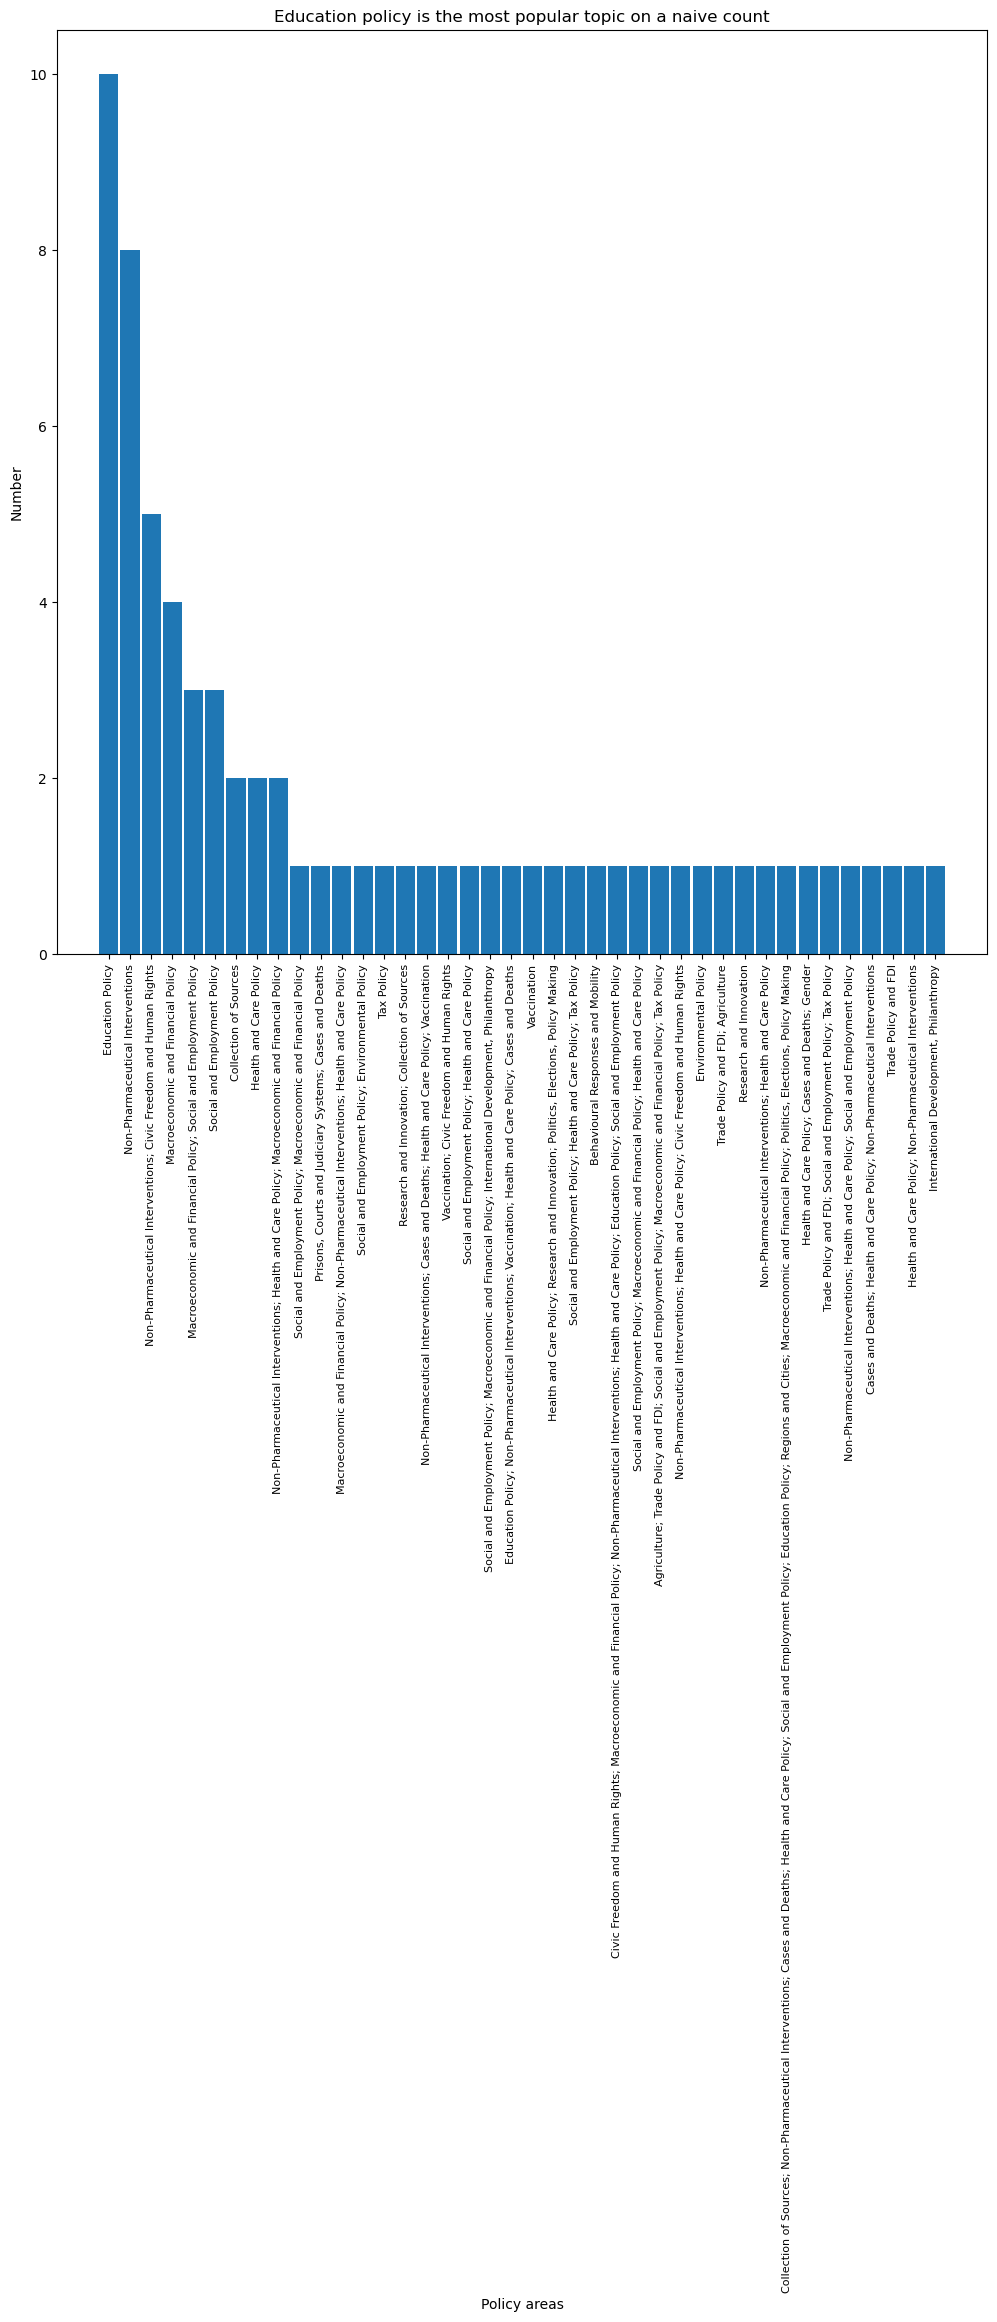

In [871]:
# Plots counts
plt.figure(figsize =(12, 12))
plt.bar(policy_areas.index, height = policy_areas['Policy Area'], width = 0.9, color = None)
plt.xticks(rotation=90)
plt.title('Education policy is the most popular topic on a naive count')
plt.xlabel('Policy areas')
plt.ylabel('Number')
plt.show()

<div class="alert-info">
On a naive groupinbg of the policy area tags, 'education policy' and then 'non-pharmaceutical interventions' are the most common. It's a naive count, because the bunching of policy areas creates unique entries in the column, some of which might contain more popular tags that rarely occur alone. But there is something useful that's suggested by the naive count: education policy might be a type of intervention that doesn't often cluster with any other type. 
    
<br>
    
But let's first have look at how the data policy tags might have been entered. Below is the list of policy areas from the Oxford Supertracker <a href="https://supertracker.spi.ox.ac.uk/documentation/" target="_blank">documentation</a>.
</div>

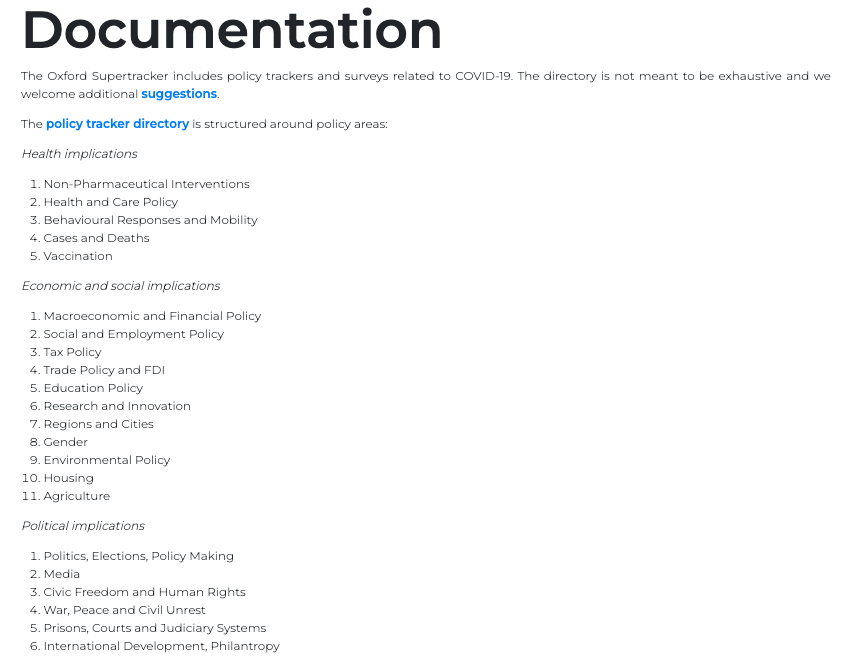

<div class="alert-info">
The policy areas list is logical and simple, and likely covers all of the topics that one might think of. But how did the entries get their labels? Let's have a look at the <a href="https://supertracker.spi.ox.ac.uk/submit-a-tracker/" target="_blank">submission form</a>.
</div>

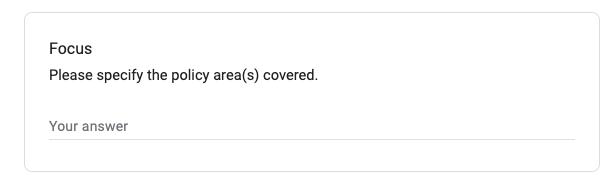

<div class="alert-info">
The box above is the only one on the form that takes identification of a policy area, but it's free form. As there are no drop-down lists here or elsewhere it's likely that the tags were attributed to submissions by editors at the tracker rather than the authors of the submissions. 
    
<br>
    
Looking at education policy entries below evidences this process somewhat, with submission authors likely having provided the text in the 'focus' column and their them being summarised with a policy area tag. 
</div>

In [872]:
# Shows the text and entries given for education policy entries
focus_policy_areas.loc[focus_policy_areas['Policy Area'] == 'Education Policy']

Title       Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                                     Focus
2                                                                                   CGD - COVID education policy tracking  Education Policy                                                                                                                                                                                                                                                                                                                                                                                                                                           school closures
8                                                                             COVID-19 Global Education Recovery Tracker   Education Policy                                                                                                                                                                                                                                                                               Tracks ongoing information about the global status of schools, teachers and students amid the COVID-19 pandemic, such as in-person/remote teaching and its related support.
16                                                                                               COVID-19 School Data Hub  Education Policy                                                                                                                                                                                                                                                                                         A central database for educators, researchers, and policymakers to understand how the COVID-19 pandemic shaped students’ modes of learning in 2020-21 in the USA.
22                                                                        Cato COVID-19 Permanent Private School Closures  Education Policy                                                                                                                                                                                                                                                                Permanent closures of private schools at least partially connected to COVID-19 since the beginning of local and state lockdowns by religious affiliation. Private school enrolment survey.
38                                How are children going back to school in America's 225 largest public school districts?  Education Policy                                                                                                                                                                                                                                                                                                               Provides the 2020-2021 back-to-school policies, such as online or in-person teaching, of the America's 225 largest public school districts 
55                                                                                                    School COVID Survey  Education Policy                                                                                                                                                                                                                                                                                                                                                            Provides school policies in the districts of four US states (NY, NJ, CT, PA) in the 2020-2021.
58                                        

<div class="alert-info">
Let's look at some more complicated entries. 
</div>

In [873]:
# Finds select, complicated entries
focus_policy_areas.iloc[[24, 39, 68]]

Title                                                                                                                                                                                                                                    Policy Area                                                                                                                                                                                                                                                                                           Focus
24                                                                                                 Corona Daten Plattform  Collection of Sources; Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making                                                                                                                                          provides datasets on Germany on a broadrange of issues .disaggregated at the state-, and district level Free registration is required for data access.
39                                                                                                   IGC COVID-19 tracker                                                                                                                                      Social and Employment Policy; Macroeconomic and Financial Policy; International Development, Philanthropy   economic support measures for countries worldwide by 1) wage/employment support, 2) cash transfers, 3) credit schemes/guarantees/ business support, 4) tax delays/deferrals, 5) tax cuts/ cancellations/exemptions/credits, 6) Interest rate cuts/liquidity measures/ other monetary measures
68  World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results)                                                                                                                                                                                                                                Education Policy                                       National education responses to school closures related to the COVID-19 pandemic by surveying Ministries of Education and national statistics units. [See here for aggregate results](https://infogram.com/copy-copy-covid-fig-_r4-1hke60d1x7m525r?live).

<div class="alert-info">
The policy area tags for these entries are notable for the fact that the free text in the Focus column is in two of the instances not enough to justify the tags given. There must have been editorial investigation of the sources that went beyond the submissions. 
    
<br>

We've also still got a problem with the entries that described as being a 'collection'. We previously addressed those that had their type listed as 'collection'. But some are still solely described as a 'Collection of Sources' in the policy area column, or have the term as one of several tags. Given that we've decided to focus on policy trackers, it will be more helpful to have the former hold tags on what they are tracking - even in a meta way - and the latter not include the term at all. 
    
<br> 
Let's rename the entries that are listed as 'Collection of Sources' to a relevant policy category or set of them.   
</div>

In [874]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Policy Area'] == 'Collection of Sources']

Title                                                                                                                          Link            Policy Area                                                                                                                                                                                                                                                                                                                                          Focus Country Coverage      Data Format                                                                                       Authors            Type Level of Observation  Start Date    End Date                                                                Source Language                                                                                                                                                                              World Region     Provider
14  COVID-19 Resource Tracker: A Guide to State and Local Responses  https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses  Collection of Sources  This guide is a spreadsheet compiling more than 100 resources tracking state and local data and policy responses in health care, food, housing, and income supports in the USA. It also includes resources on policies to reduce the spread of the disease, support specific populations, and help residents work, learn, and vote from home.              USA             xlsx                                         [Urban Institute](https://twitter.com/urbaninstitute)  Policy Tracker         sub-national  2020-03-01  2021-04-09  Governmental agencies; Media; Academics; Think tanks; other trackers  English                                                                                                                                                                             North America  Think tanks
51                                               OxCOVID19 Database                                                                                                 https://covid19.eng.ox.ac.uk/  Collection of Sources                                       large, single-centre, multimodal relational database consisting of information (using acknowledged Sources) related to COVID-19 pandemic. OxCOVID19 Database is currenlty comprised of six tables: EPIDEMIOLOGY, GOVERNMENT_RESPONSE, COUNTRY_STATISTICS, MOBILITY, WEATHER and ADMINISTRATIVE_DIVISION.        worldwide  csv; PostgreSQL  [University of Oxford, Department of Engineering Science](https://twitter.com/OxEngineering)  Policy Tracker                  NaN  2020-01-30  up-to-date         Governmental agencies; International organisations; Academics  English  worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe    Academics

<div class="alert-info">
Let's change the policy area for the COVID-19 Resource Tracker first, using the categories listed on its website. 
</div>

In [875]:
# Changes the policy areas for COVID-19 Resource Tracker: A Guide to State and Local Responses
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID-19 Resource Tracker: A Guide to State and Local Responses', na=False), ['Policy Area']] = 'Health and Care Policy; Non-Pharmaceutical Interventions; Housing; Social and Employment Policy; Education Policy; Politics, Elections, Policy Making'

In [876]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Resource Tracker: A Guide to State and Local Responses']

Title                                                                                                                          Link                                                                                                                                            Policy Area                                                                                                                                                                                                                                                                                                                                          Focus Country Coverage Data Format                                                Authors            Type Level of Observation  Start Date    End Date                                                                Source Language   World Region     Provider
14  COVID-19 Resource Tracker: A Guide to State and Local Responses  https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses  Health and Care Policy; Non-Pharmaceutical Interventions; Housing; Social and Employment Policy; Education Policy; Politics, Elections, Policy Making  This guide is a spreadsheet compiling more than 100 resources tracking state and local data and policy responses in health care, food, housing, and income supports in the USA. It also includes resources on policies to reduce the spread of the disease, support specific populations, and help residents work, learn, and vote from home.              USA        xlsx  [Urban Institute](https://twitter.com/urbaninstitute)  Policy Tracker         sub-national  2020-03-01  2021-04-09  Governmental agencies; Media; Academics; Think tanks; other trackers  English  North America  Think tanks

<div class="alert-info">
We'll actually remove the OxCOVID19 Database as its policy trackling refers to the Oxford Covid-19 Government Response Tracker, which is listed elsewhere in the dataset. 

</div>

In [877]:
# Removes the OxCOVID19 Database 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('OxCOVID19 Database', na=False)].index)

In [878]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'OxCOVID19 Database']

Empty DataFrame
Columns: [Title, Link, Policy Area, Focus, Country Coverage, Data Format, Authors, Type, Level of Observation, Start Date, End Date, Source, Language, World Region, Provider]
Index: []

In [879]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [880]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 69 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Now we'll remove the cluster references from the other entries.
</div>

In [881]:
# Finds the entries with 'collection' in their policy area tags
oxford_supertracker.loc[oxford_supertracker['Policy Area'].str.contains('Collection')]

Title                                                                                   Link                                                                                                                                                                                                                                    Policy Area                                                                                                                                                                                                                                     Focus                                                                                                                                                                                                                                                                                                                                                                                                                           Country Coverage Data Format                                                                                                                                      Authors            Type Level of Observation  Start Date    End Date                                                Source Language                                                                                                                                                                              World Region                     Provider
24                           Corona Daten Plattform                                                  https://www.corona-datenplattform.de/  Collection of Sources; Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making                                                                                    provides datasets on Germany on a broadrange of issues .disaggregated at the state-, and district level Free registration is required for data access.                                                                                                                                                                                                                                                                                                                                                                                                                                        DEU         csv  [infas](https://www.infas.de/); [German Federal Ministry for Economic Affairs and Energy](https://www.bmwi.de/Navigation/EN/Home/home.html)  Policy Tracker         sub-national  2020-03-11  up-to-date                      Governmental agencies; Academics   German                                                                                                                                                                               West Europe        Governmental agencies
49  Open Government Approaches to Tackling COVID-19  https://www.opengovpartnership.org/collecting-open-government-approaches-to-covid-19/                                                                                                                                                                                                 Research and Innovation; Collection of Sources   a list of open government approaches, such as citizen-led community responses, Building trust between government and citizens, Transparency over forecasting models and data, Digital platforms or apps, Tackling misinformation online   worldwide; ARG; AUS; AZE; BHR; BGD; BEL; BEN; BOL; BRA; BGR; CMR; CAN; CHL; CHN; COL; CRI; HRV; DMA; ECU; SLV; EST; FJI; FRA; GEO; DEU; GHA; GRC; GTM; HTI; HND; HKG; IND; IDN; IRL; ISR; ITA; JOR; KEN; KOR; KWT; LVA; LIE; LTU; MAC; MYS; MLI; MEX; MNG; MAR; NAM; NPL; NLD; NER; NGA; NOR; OMN; PAK; PAN; PRY; PER; PHL; PRT; REU; ROU; SGP; SVK; SOM; ZAF; ESP; LKA; CHE; TWN;

<div class="alert-info">
There are three entries to deal with. Let's go through those. 
</div>

In [882]:
# Removes 'Collection of Sources' from the the policy areas for Corona Daten Plattform
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('Open Government Approaches to Tackling COVID-19', na=False), ['Policy Area']] = 'Research and Innovation'

In [883]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Open Government Approaches to Tackling COVID-19']

Title                                                                                   Link              Policy Area                                                                                                                                                                                                                                     Focus                                                                                                                                                                                                                                                                                                                                                                                                                           Country Coverage Data Format                                                  Authors            Type Level of Observation  Start Date    End Date                                                Source Language                                                                                                                                                                              World Region                     Provider
49  Open Government Approaches to Tackling COVID-19  https://www.opengovpartnership.org/collecting-open-government-approaches-to-covid-19/  Research and Innovation   a list of open government approaches, such as citizen-led community responses, Building trust between government and citizens, Transparency over forecasting models and data, Digital platforms or apps, Tackling misinformation online   worldwide; ARG; AUS; AZE; BHR; BGD; BEL; BEN; BOL; BRA; BGR; CMR; CAN; CHL; CHN; COL; CRI; HRV; DMA; ECU; SLV; EST; FJI; FRA; GEO; DEU; GHA; GRC; GTM; HTI; HND; HKG; IND; IDN; IRL; ISR; ITA; JOR; KEN; KOR; KWT; LVA; LIE; LTU; MAC; MYS; MLI; MEX; MNG; MAR; NAM; NPL; NLD; NER; NGA; NOR; OMN; PAK; PAN; PRY; PER; PHL; PRT; REU; ROU; SGP; SVK; SOM; ZAF; ESP; LKA; CHE; TWN; THA; TUN; UGA; UKR; ARE; GBR; URY; VEN; JEY; SRB; USA   xlsx; csv  [Open Gov Partnership](https://twitter.com/opengovpart)  Policy Tracker             national  2020-03-19  2021-05-23  Governmental agencies; Think tanks; Companies; Media  English  worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe  International organisations

In [884]:
# Removes 'Collection of Sources' from the the policy areas for Corona Daten Plattform
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('Corona Daten Plattform', na=False), ['Policy Area']] = 'Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making'

In [885]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Corona Daten Plattform']

Title                                   Link                                                                                                                                                                                                             Policy Area                                                                                                                                                   Focus Country Coverage Data Format                                                                                                                                      Authors            Type Level of Observation  Start Date    End Date                            Source Language World Region               Provider
24  Corona Daten Plattform  https://www.corona-datenplattform.de/  Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making  provides datasets on Germany on a broadrange of issues .disaggregated at the state-, and district level Free registration is required for data access.              DEU         csv  [infas](https://www.infas.de/); [German Federal Ministry for Economic Affairs and Energy](https://www.bmwi.de/Navigation/EN/Home/home.html)  Policy Tracker         sub-national  2020-03-11  up-to-date  Governmental agencies; Academics   German  West Europe  Governmental agencies

In [886]:
# Removes 'Collection of Sources' from the the policy areas for Corona Daten Plattform
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('SARS-CoV-2 and COVID-19 DATA HUB', na=False), ['Policy Area']] = 'Health and Care Policy; Non-Pharmaceutical Interventions'

In [887]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'SARS-CoV-2 and COVID-19 DATA HUB']

Empty DataFrame
Columns: [Title, Link, Policy Area, Focus, Country Coverage, Data Format, Authors, Type, Level of Observation, Start Date, End Date, Source, Language, World Region, Provider]
Index: []

<div class="alert-info">
And let's double-check on any entries with 'Collection of Sources' remaining in their policy area tags. 
</div>

In [888]:
# Finds the entries with 'collection' in their policy area tags
oxford_supertracker.loc[oxford_supertracker['Policy Area'].str.contains('Collection')]

Empty DataFrame
Columns: [Title, Link, Policy Area, Focus, Country Coverage, Data Format, Authors, Type, Level of Observation, Start Date, End Date, Source, Language, World Region, Provider]
Index: []

<div class="alert-info">
As all entries are also now listed as policy trackers, we can drop the 'type' column. 
</div>

In [889]:
# Drops the Type column
oxford_supertracker = oxford_supertracker.drop(columns = 'Type')

In [890]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [891]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 69 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Having underaken the cleaning steps above, let's search in a non-naive way for how often the policy areas occur. The first step we'll take is to make a definitive list of the policy area search terms which agrees with the documentation.  
</div>

In [892]:
# Gets the set of unique and edited policy areas
policy_areas_edited = focus_policy_areas['Policy Area'].unique()

# Converts the array to a list
policy_areas_edited = policy_areas_edited.tolist()

# Shows starting list
policy_areas_edited

['Non-Pharmaceutical Interventions',
 'Macroeconomic and Financial Policy',
 'Education Policy',
 'Health and Care Policy; Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions; Civic Freedom and Human Rights',
 'Health and Care Policy',
 'Collection of Sources',
 'Trade Policy and FDI',
 'Cases and Deaths; Health and Care Policy; Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions; Health and Care Policy; Social and Employment Policy',
 'Trade Policy and FDI; Social and Employment Policy; Tax Policy',
 'Health and Care Policy; Cases and Deaths; Gender',
 'Collection of Sources; Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making',
 'Non-Pharmaceutical Interventions; Health and Care Policy',
 'Research and Innovation',
 'Macroeconomic and Financial Policy; Social and Employment Policy',
 'Tra

In [893]:
# Creates holding list of terms
policy_areas_holding = []

In [894]:
# Loops through the entries in the edited list
for entry in policy_areas_edited:
    # Splits any entry with a semi-colon and puts it into the holding list
    policy_areas_holding.append(entry.split('; '))

In [895]:
# Creates a list for the definitive terms
policy_areas_definitive = []

In [896]:
# Appends the split entries to the definitive list, starting with a loop through the entries
for entry in policy_areas_holding:
    # Loops through the policy areas in each entry
    for area in entry:
        # Checks if the area is not repetitious
        if area not in policy_areas_definitive:
            # Adds the area to the definitive list if it isn't already in it
            policy_areas_definitive.append(area)

In [897]:
# Sorts final list alphabetically
policy_areas_definitive.sort()

In [898]:
# Removes 'Collection of Sources
policy_areas_definitive.pop(4)

'Collection of Sources'

In [899]:
# Sorts final list
policy_areas_definitive

['Agriculture',
 'Behavioural Responses and Mobility',
 'Cases and Deaths',
 'Civic Freedom and Human Rights',
 'Education Policy',
 'Environmental Policy',
 'Gender',
 'Health and Care Policy',
 'International Development, Philanthropy',
 'Macroeconomic and Financial Policy',
 'Non-Pharmaceutical Interventions',
 'Politics, Elections, Policy Making',
 'Prisons, Courts and Judiciary Systems',
 'Regions and Cities',
 'Research and Innovation',
 'Social and Employment Policy',
 'Tax Policy',
 'Trade Policy and FDI',
 'Vaccination']

<div class="alert-info">
Looking again at the <a href="https://supertracker.spi.ox.ac.uk/documentation/" target="_blank">documentation</a>, every term in the definitive list is from the set of terms used by the editors, but there are three of the latter that aren't attached to any entry in the database: housing; media; War, Peace and Civil Unrest. That's interesting, as it raises questions about activity in those areas or the tracking of it.
    
<br>
    
Let's now look at which tags are most common in the database. We'll do that first in a few steps below, starting by creating counters for the terms and then using for loops to do the counting. 
</div>

In [900]:
# Makes counters for policy areas terms used
agriculture = 0
behavioural_responses_and_mobility = 0
cases_and_deaths = 0
civic_freedom_and_human_rights = 0
education_policy = 0
environmental_policy = 0
gender = 0
health_and_care_policy = 0
international_development_philanthropy = 0
macroeconomic_and_financial_policy = 0
non_pharmaceutical_interventions = 0
politics_elections_policy_making = 0
prisons_courts_and_judiciary_systems = 0
regions_and_cities = 0
research_and_innovation = 0
social_and_employment_policy = 0
tax_policy = 0
trade_policy_and_fdi = 0
vaccination = 0

In [901]:
# Creates list for all policy areas entered
policy_areas_entered = oxford_supertracker['Policy Area'].tolist()

In [902]:
# Checks list type
type(policy_areas_entered)

list

In [903]:
# Creates holding list of terms
policy_areas_entered_holding = []

In [904]:
# Loops through the entries in the entered list
for entry in policy_areas_entered:
    # Splits any entry with a semi-colon and puts it into the holding list
    policy_areas_entered_holding.append(entry.split('; '))

In [905]:
# Creates a list for the definitive terms
policy_areas_entered = []

In [906]:
# Appends the split entries to the definitive list, starting with a loop through the entries
for entry in policy_areas_holding:
    # Loops through the policy areas in each entry
    for area in entry:
        # Adds the area to the definitive list if it isn't already in it
        policy_areas_entered.append(area)

In [907]:
# Checks entered list
policy_areas_entered

['Non-Pharmaceutical Interventions',
 'Macroeconomic and Financial Policy',
 'Education Policy',
 'Health and Care Policy',
 'Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions',
 'Civic Freedom and Human Rights',
 'Health and Care Policy',
 'Collection of Sources',
 'Trade Policy and FDI',
 'Cases and Deaths',
 'Health and Care Policy',
 'Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions',
 'Health and Care Policy',
 'Social and Employment Policy',
 'Trade Policy and FDI',
 'Social and Employment Policy',
 'Tax Policy',
 'Health and Care Policy',
 'Cases and Deaths',
 'Gender',
 'Collection of Sources',
 'Non-Pharmaceutical Interventions',
 'Cases and Deaths',
 'Health and Care Policy',
 'Social and Employment Policy',
 'Education Policy',
 'Regions and Cities',
 'Macroeconomic and Financial Policy',
 'Politics, Elections, Policy Making',
 'Non-Pharmaceutical Interventions',
 'Health and Care Policy',
 'Research and Innovation',
 'Macroeconomic a

In [908]:
# Loops through list of entered terms
for area in policy_areas_entered:
    # Checks areas against list of terms
    if area == 'Agriculture':
        agriculture += 1
    if area == 'Behavioural Responses and Mobility':
        behavioural_responses_and_mobility += 1
    if area == 'Cases and Deaths':
        cases_and_deaths += 1
    if area == 'Civic Freedom and Human Rights':
        civic_freedom_and_human_rights += 1
    if area == 'Education Policy':
        education_policy += 1
    if area == 'Environmental Policy':
        environmental_policy += 1
    if area == 'Gender':
        gender += 1
    if area == 'Health and Care Policy':
        health_and_care_policy += 1
    if area == 'International Development, Philanthropy':
        international_development_philanthropy += 1
    if area == 'Macroeconomic and Financial Policy':
        macroeconomic_and_financial_policy += 1
    if area == 'Non-Pharmaceutical Interventions':
        non_pharmaceutical_interventions += 1
    if area == 'Politics, Elections, Policy Making':
        politics_elections_policy_making += 1
    if area == 'Prisons, Courts and Judiciary Systems':
        prisons_courts_and_judiciary_systems += 1
    if area == 'Regions and Cities':
        regions_and_cities += 1
    if area == 'Research and Innovation':
        research_and_innovation += 1
    if area == 'Social and Employment Policy':
        social_and_employment_policy += 1
    if area == 'Tax Policy':
        tax_policy += 1
    if area == 'Trade Policy and FDI':
        trade_policy_and_fdi += 1
    if area == 'Vaccination':
        vaccination += 1

In [909]:
# Creates dictionary of policy areas tags
policy_areas_tags_counts = {}

In [910]:
# Adds entries to the dictionary, adding the three areas with no entries
policy_areas_tags_counts['Agriculture'] = agriculture
policy_areas_tags_counts['Behavioural Responses and Mobility'] = behavioural_responses_and_mobility
policy_areas_tags_counts['Cases and Deaths'] = cases_and_deaths
policy_areas_tags_counts['Civic Freedom and Human Rights'] = civic_freedom_and_human_rights
policy_areas_tags_counts['Education Policy'] = education_policy
policy_areas_tags_counts['Environmental Policy'] = environmental_policy
policy_areas_tags_counts['Gender'] = gender
policy_areas_tags_counts['Health and Care Policy'] = health_and_care_policy
policy_areas_tags_counts['International Development, Philanthropy'] = international_development_philanthropy
policy_areas_tags_counts['Macroeconomic and Financial Policy'] = macroeconomic_and_financial_policy
policy_areas_tags_counts['Non-Pharmaceutical Interventions'] = non_pharmaceutical_interventions
policy_areas_tags_counts['Politics, Elections, Policy Making'] = politics_elections_policy_making
policy_areas_tags_counts['Prisons, Courts and Judiciary Systems'] = prisons_courts_and_judiciary_systems
policy_areas_tags_counts['Regions and Cities'] = regions_and_cities
policy_areas_tags_counts['Research and Innovation'] = research_and_innovation
policy_areas_tags_counts['Social and Employment Policy'] = social_and_employment_policy
policy_areas_tags_counts['Tax Policy'] = tax_policy
policy_areas_tags_counts['Trade Policy and FDI'] = trade_policy_and_fdi
policy_areas_tags_counts['Vaccination'] = vaccination
policy_areas_tags_counts['Housing'] = 0
policy_areas_tags_counts['Media'] = 0
policy_areas_tags_counts['War, Peace and Civil Unrest'] = 0

<div class="alert-info">
Now that we've been through a few steps of lists and loops, let's get the information we want, first in a table and then with a chart. 
</div>

In [911]:
# Puts the dictionary into a dataframe to be counted
policy_areas_tags_counts_frame = pd.DataFrame.from_dict(policy_areas_tags_counts, orient ='index', columns = ['Count']).sort_values(by ='Count', ascending = False)

# Shows frame
policy_areas_tags_counts_frame

Count
Health and Care Policy                      17
Non-Pharmaceutical Interventions            13
Social and Employment Policy                13
Macroeconomic and Financial Policy          10
Cases and Deaths                             6
Civic Freedom and Human Rights               4
Education Policy                             4
Vaccination                                  4
Trade Policy and FDI                         4
Tax Policy                                   4
Research and Innovation                      3
Agriculture                                  2
Politics, Elections, Policy Making           2
International Development, Philanthropy      2
Environmental Policy                         2
Regions and Cities                           1
Prisons, Courts and Judiciary Systems        1
Behavioural Responses and Mobility           1
Gender                                       1
Housing                                      0
Media                                        0
War, Peace and Civil Unrest                  0

<div class="alert-info">
The table shows what we suspected from the earlier naive counting: health-related tags are more common than education policy ones. This also reflects the <a href="https://supertracker.spi.ox.ac.uk/update-july2021/" target="_blank">Oxford Supertracker counting of the tags</a>.
    
<br>
    
Let's look at the distribution graphically. 
</div>

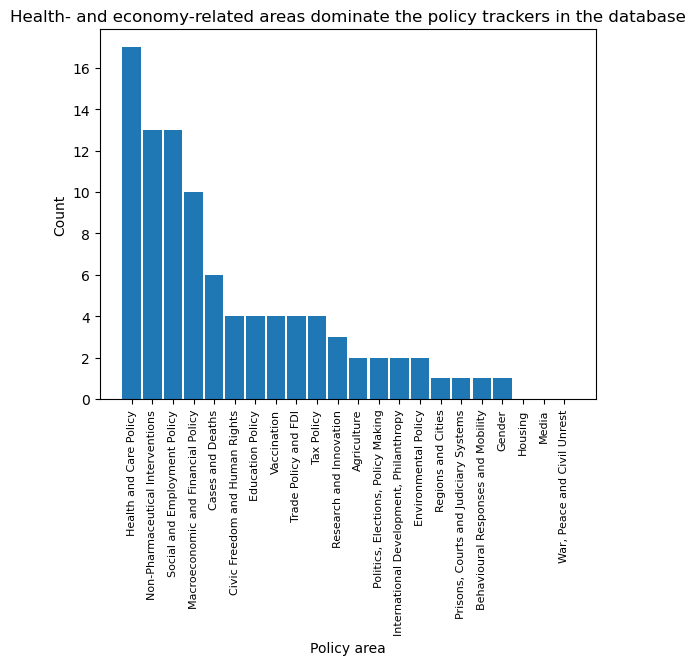

In [1111]:
# Makes barchart for the level of observation counts
plt.figure()
plt.bar(policy_areas_tags_counts_frame.index, policy_areas_tags_counts_frame['Count'], width = 0.9)
plt.xticks(rotation=90)
plt.title('Health- and economy-related areas dominate the policy trackers in the database')
plt.xlabel('Policy area')
plt.ylabel('Count')
plt.show()

<div class="alert-info">
The policy area tags counts suggest that we've got a list of datasets that are heavy on health and fiscal policy, with only some tracking of areas beyond that. The distribution of the tags is a first step the discussion of the policy space that governments had and how they used it. We can't go much further than this at the moment, but it's a start.   
    
<br>
    
To take another small step into the policy space question, let's look at how pairs of policy area arise across the tags. In other words, when a dataset is tagged with 'health and care policy', which other areas is it also tagged with? We'll look at this using some functions described at the start of the notebook, looking across all of the policy tags and how they arose. 
</div>

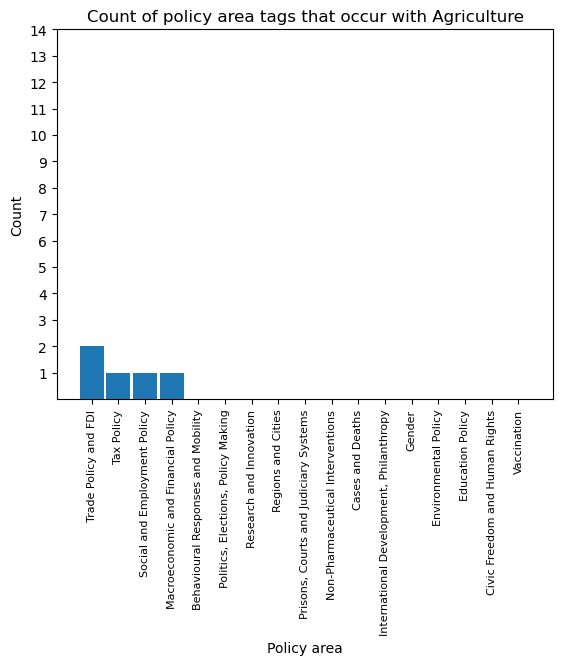

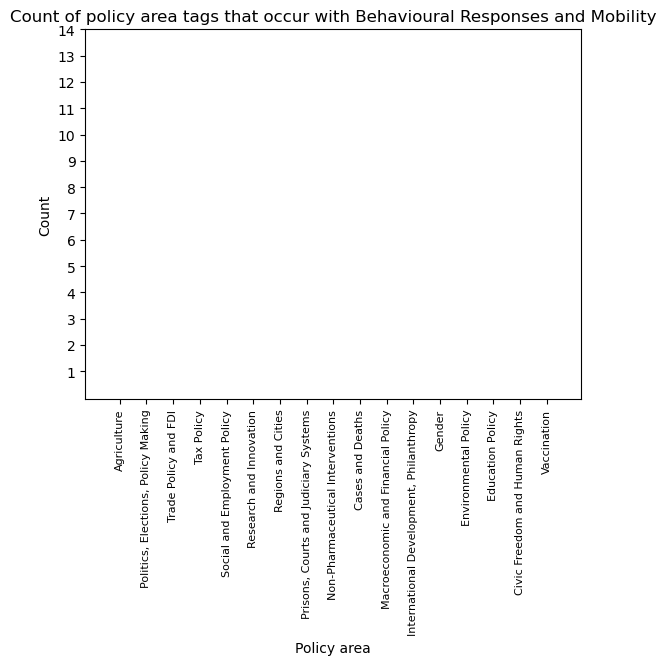

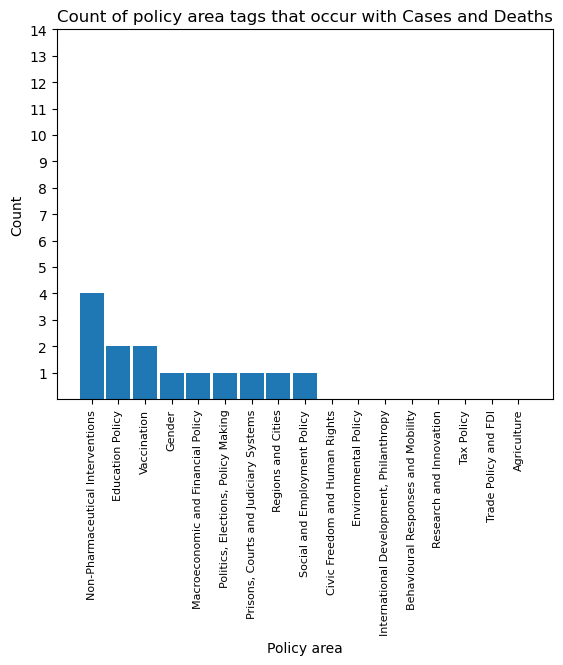

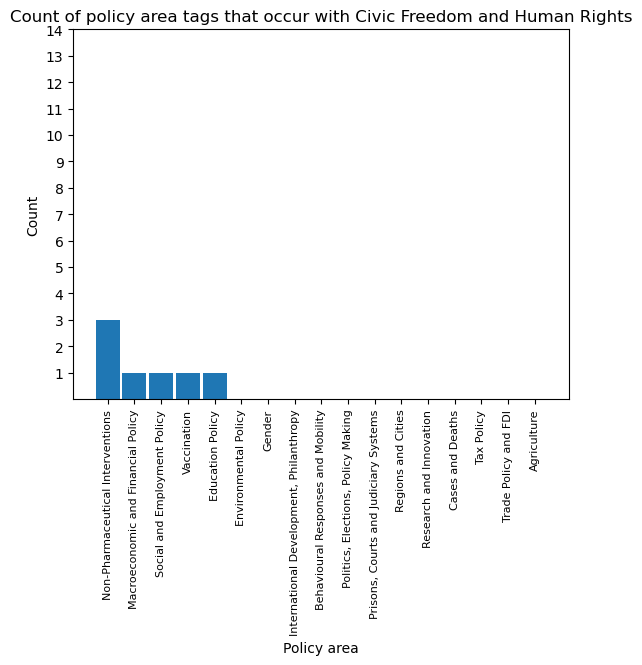

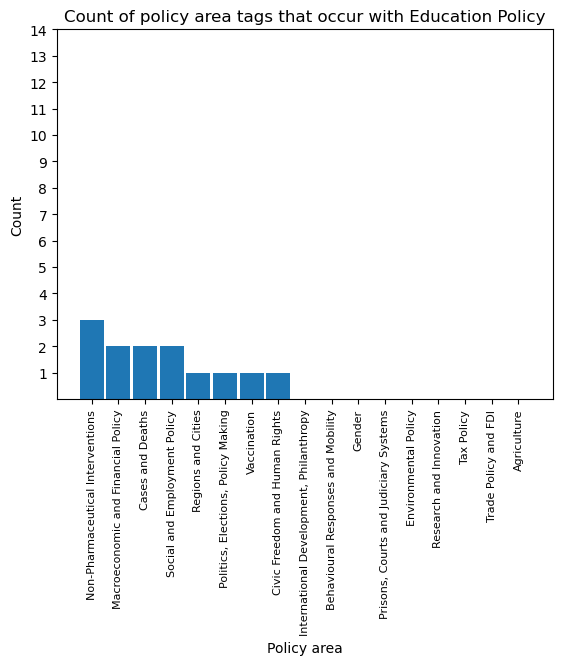

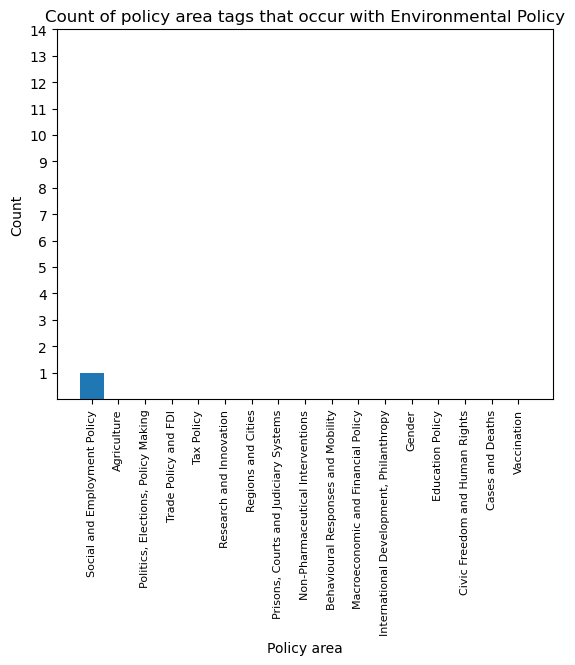

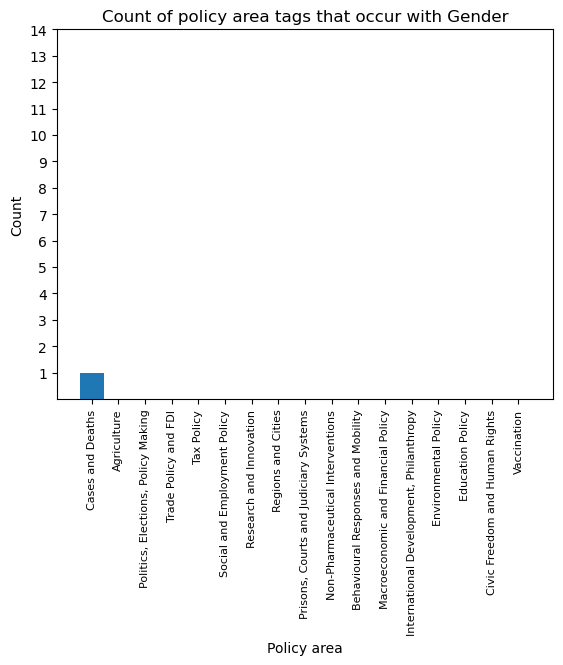

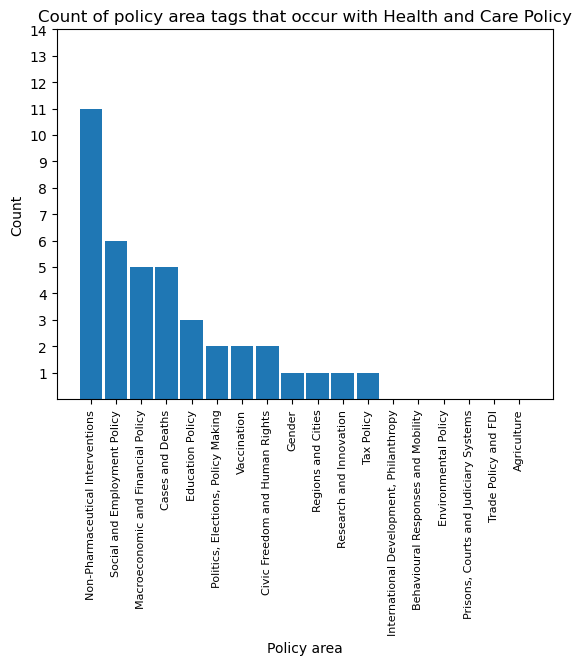

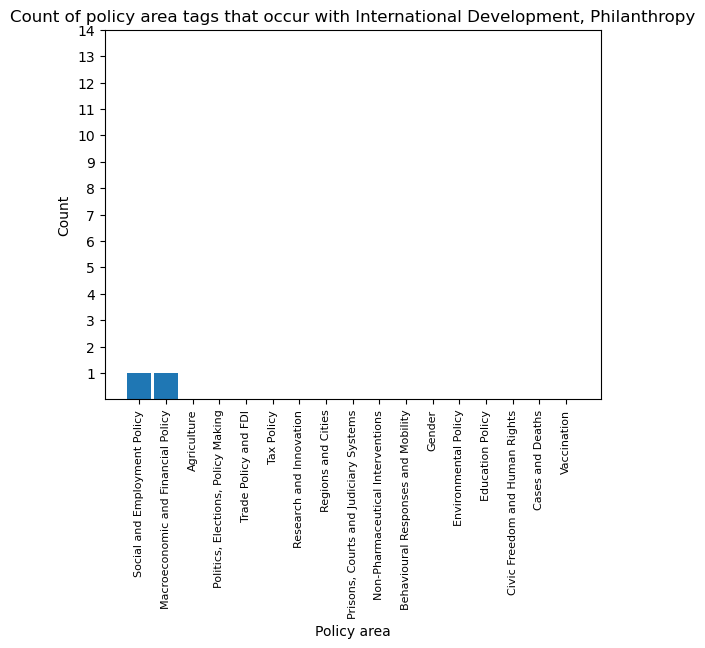

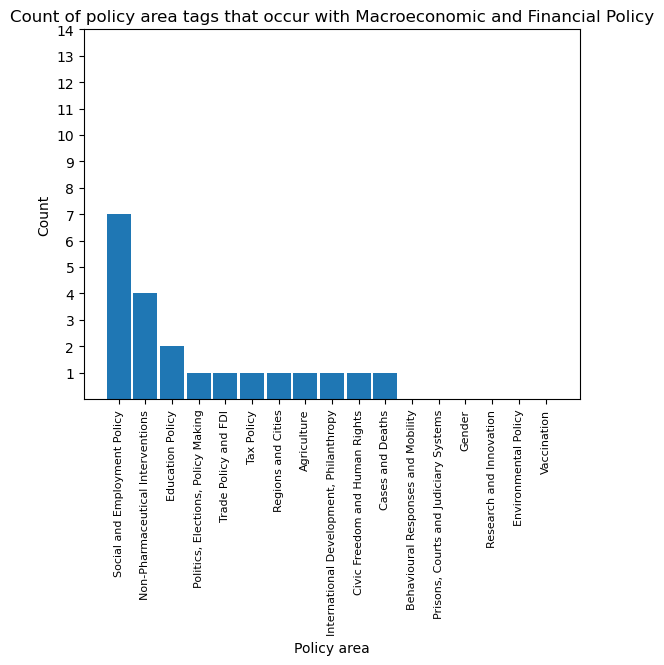

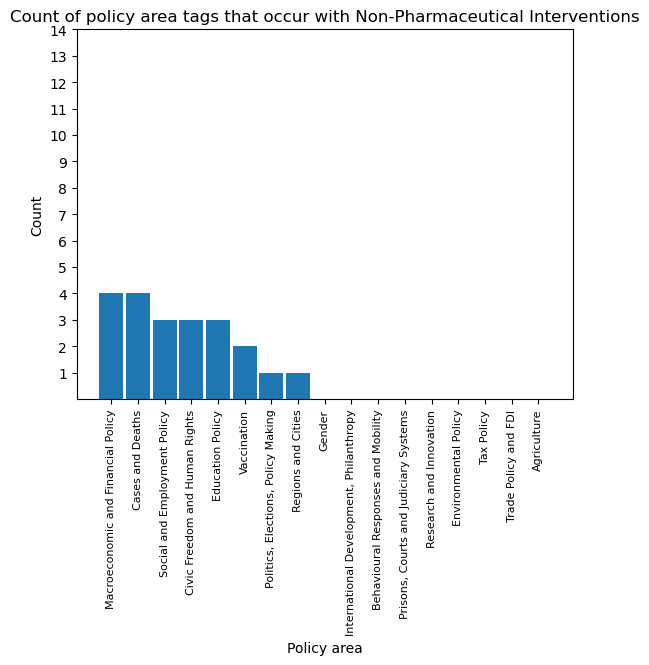

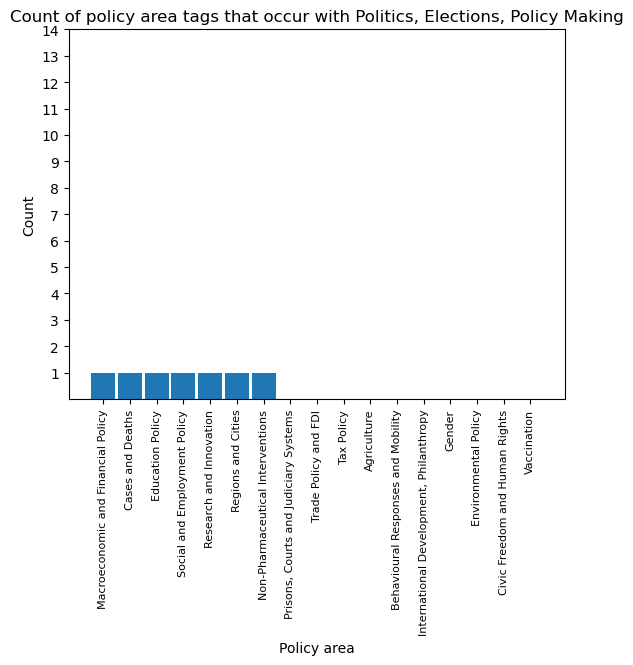

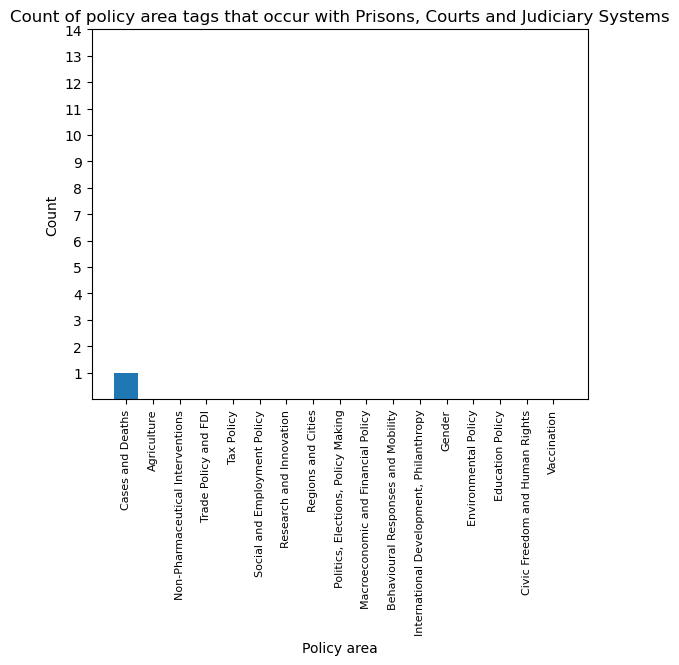

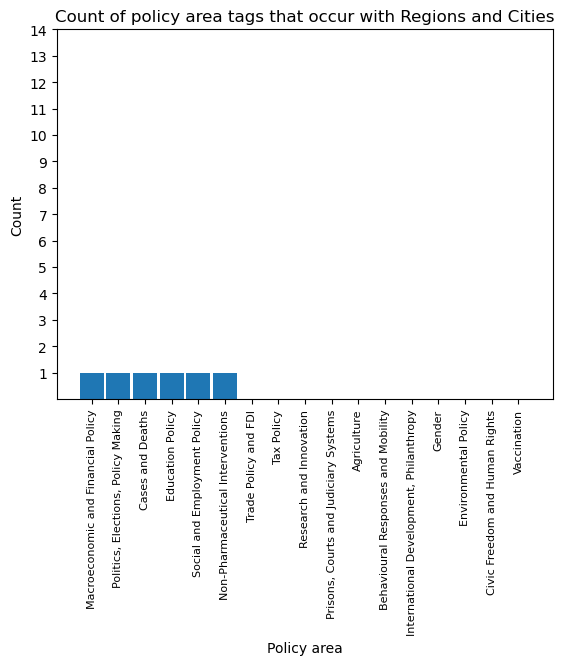

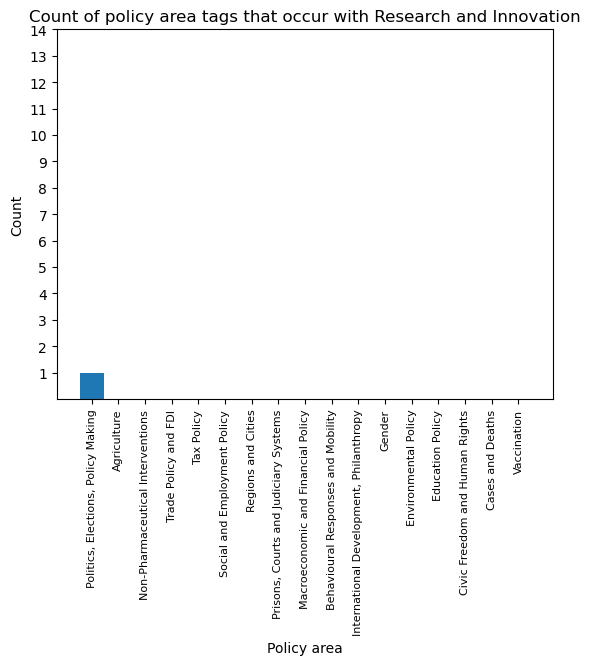

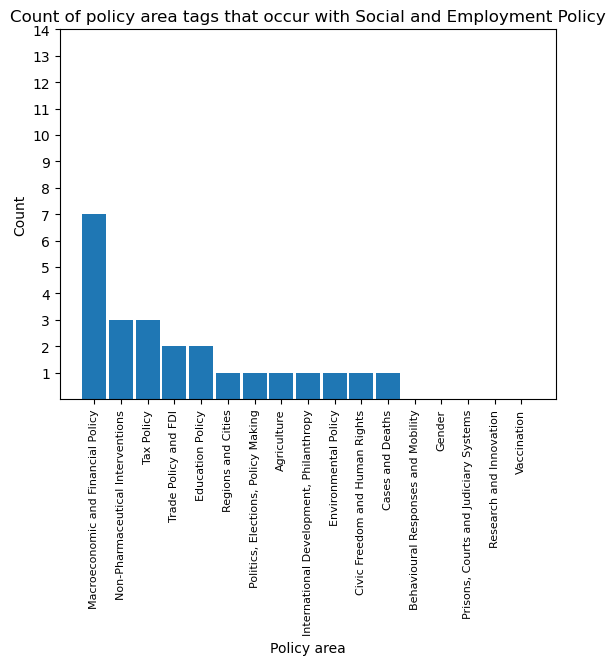

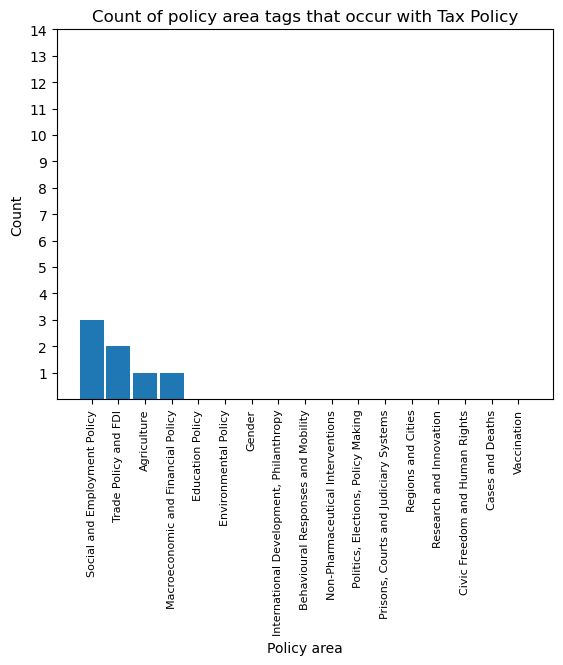

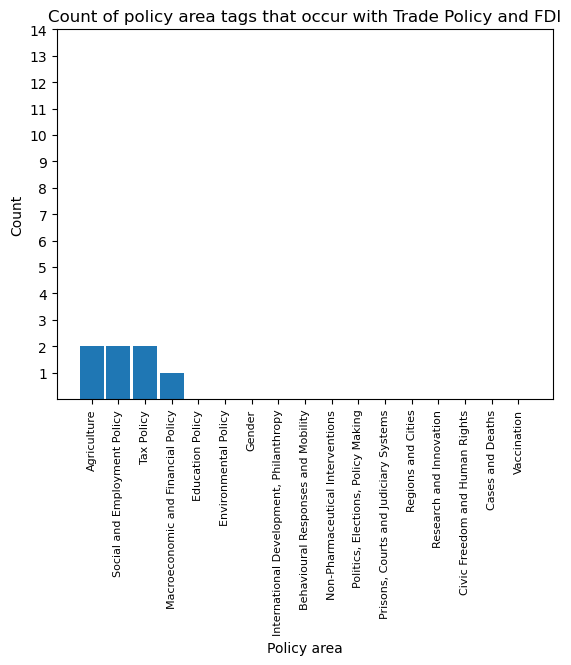

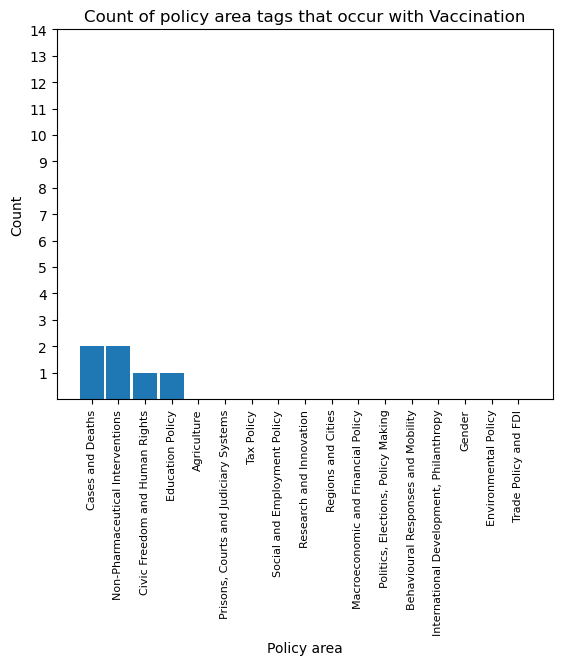

In [913]:
# Uses a function to count when secondary tags occur, aftera primary one from the defintive list
grouped_tags_charts(policy_areas_definitive, policy_areas_edited)

<div class="alert-info">
There are a few things to note from the charts: 
    
- The Health and Care Policy tag often occurs with similar ones, such as that on non-pharmaceutical interventions, but also a range of others. Perhaps that means that when authors were compiling policy trackers, they were more likely to start with health-related policy, adding other topics to it. If that were the case - again, we can't assess this in depth now - it might suggest bias in how trackers mapped the policy space. On the other hand, it could also mean that governments would associate many different types of intervention with health-related ones, when making announcements. 
- Fiscal policy appears, so far, to be the only other intervention cluster. When a dataset was tagged as about macroeconomic and financial policy, tags on labour market policy also tended to arise. 
    
<br>
And that brings to an end our skim of the policy areas - their topics - and focus. 
    
<br>
    
Let's now look at how the dates have been set, and their distribution, across the datasets. 
    
</div>

## Dates
<a id='dates'></a>

<div class="alert-info">
We're interested in some simple questions:
    
- What's the distribution of start dates?
- What's the distribution of end dates?
- Do the temporal entries look broadly correct across the datasets? 

<br>
Let's start by putting the key information into a sub-table. 
    
</div>

In [914]:
# Creates sub-table of the most relevant information for looking at the temporal features
dates_dataframe = oxford_supertracker[['Title', 'Start Date', 'End Date']]

# Shows sub-table
dates_dataframe

Title  Start Date    End Date
0                                                                                                              #Masks4All  2020-03-16  2020-12-21
1                                                      A global database on central banks' monetary responses to Covid-19  2020-02-03  2021-02-16
2                                                                                   CGD - COVID education policy tracking  2020-02-12  up-to-date
3                                                                                         CIHI COVID-19 Intervention Scan  2020-05-05  2022-01-31
4                                                                       COVID Analysis and Mapping of Policies (AMP) site  2020-01-01  up-to-date
..                                                                                                                    ...         ...         ...
64                                                                    UNESCO COVID-19 Educational Disruption and Response  2020-02-17  up-to-date
65                                                       UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak  2020-03-11  up-to-date
66                                                                            WHO PHSM: Public health and social measures  2020-01-04  up-to-date
67  World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results)   2020-04-20  2020-06-26
68                                           World Bank Education Team COVID tracking database and map of school closures  2020-01-01  2021-03-15

[69 rows x 3 columns]

<div class="alert-info">
Let's look at the entries in the start date and end data columns. 
    
</div>

In [915]:
# Gives the unique entries in the 'start date' column
dates_dataframe['Start Date'].unique()

array(['2020-03-16', '2020-02-03', '2020-02-12', '2020-05-05',
       '2020-01-01', 'up-to-date', '2020-01-27', '2020-03-11',
       '2020-01-24', '2020-12-12', '2020-12-14', '2020-03-01',
       '2020-09-01', '2020-05-21', '2020-03-05', '2020-02-28',
       '2020-01-23', '2020-04-30', '2020-03-20', '2020-01-07',
       '2020-02-15', '2020-08-10', '2020-03-17', '2020-02-01',
       '2020-04-08', '2020-01-08', '2020-03-19', '2020-03-31',
       '2020-07-30', '2021-01-20', '2021-02-16', '2020-02-17',
       '2020-01-04', '2020-04-20'], dtype=object)

In [916]:
# Gives the unique entries in the 'start date' column
dates_dataframe['Start Date'].isna().sum()

0

In [917]:
# Gives the unique entries in the 'start date' column
dates_dataframe['End Date'].unique()

array(['2020-12-21', '2021-02-16', 'up-to-date', '2022-01-31',
       '2020-12-31', '2020-05-31', '2020-04-30', '2021-04-09',
       '2021-05-31', '2020-07-31', '2021-03-31', '2020-03-26',
       '2020-11-15', '2021-01-06', '2021-04-30', '2021-03-17',
       '2020-10-01', '2020-12-18', '2020-08-17', '2020-05-10',
       '2021-05-10', '2020-10-24', '2020-06-20', '2020-12-23',
       '2020-07-24', '2021-04-22', '2021-05-23', '2020-06-30',
       '2020-08-30', '2022-02-02', '2021-08-31', '2021-04-21',
       '2020-06-26', '2021-03-15'], dtype=object)

In [918]:
# Gives the unique entries in the 'start date' column
dates_dataframe['End Date'].isna().sum()

0

<div class="alert-info">
We haven't got a problem with missing date entries, but the 'up-to-date' ones will prevent us from doing DateTime and other temporal searches. We've got a few options for amendinh the entries, but let's count and locate the datasets first. 
    
</div>

In [919]:
# Counts the number of 'up-to-date' entries in the 'end date' column
(dates_dataframe['Start Date'] == 'up-to-date').sum()

1

In [920]:
# Counts the number of 'up-to-date' entries in the 'end date' column
(dates_dataframe['End Date'] == 'up-to-date').sum()

34

<div class="alert-info">
We've got more of a problem with end dates than start dates, so let's deal with the former first. 
    
</div>

In [921]:
# Gives the one entry with 'up-to-date' in the 'start date' column
oxford_supertracker.loc[oxford_supertracker['Start Date'] == 'up-to-date']

Title                                    Link                         Policy Area                                       Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Country Coverage Data Format                                                                                                                                                                      Authors Level of Observation  Start Date    End Date                                  Source Language                                                                                                                                                                              World Region   Provider
6  COVID-19 Economic Stimulus Index  http://web.boun.edu.tr/elgin/COVID.htm  Macroeconomic and Financial Policy   fiscal, monetary & exchange rate measures  worldwide; AFG; ALB; DZA; AGO; ARG; ARM; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BTN; BOL; BWA; BRA; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COG; CRI; HRV; CYP; DNK; DJI; DMA; DOM; ECU; EGY; SLV; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; GTM; GIN; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KOR; KWT; LVA; LBN; LSO; LBR; LBY; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MRT; MUS; MEX; MNG; MAR; MOZ; MMR; NAM; NPL; NLD; NZL; NIC; NER; NGA; NOR; OMN; PAK; PAN; PRY; PER; PHL; POL; PRT; QAT; ROU; RUS; RWA; SMR; SAU; SEN; SYC; SLE; SGP; SVN; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TJK; THA; TGO; TON; TUN; TUR; TKM; UGA; UKR; URY; UZB; VNM; YEM; ZMB; ZWE; MNE; SRB; XKX; USA        xlsx  [Ceyhun Elgin](https://twitter.com/CeyhunElgin);\n        [Basbug Gokce](https://twitter.com/BasbugGokce);\n        [Abdullah Yalaman](https://twitter.com/AbdullahYalaman)             national  up-to-date  up-to-date  International organisations; Academics  English  worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe  Academics

<div class="alert-info">
The <a href="https://web.boun.edu.tr/elgin/COVID.htm" target="_blank">COVID-19 Economic Stimulus Index</a> has dates in its <a href="https://web.boun.edu.tr/elgin/CESI_16.xlsx" target="_blank">spreadsheet</a> from 14th July 2020 to 7th May 2021. Let's use those dates. 
    
</div>

In [922]:
# Changes the start date
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Economic Stimulus Index', ['Start Date']] = '2020-07-14' 

In [923]:
# Changes the end date
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Economic Stimulus Index', ['End Date']] = '2021-05-07' 

In [924]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Economic Stimulus Index']

Title                                    Link                         Policy Area                                       Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Country Coverage Data Format                                                                                                                                                                      Authors Level of Observation  Start Date    End Date                                  Source Language                                                                                                                                                                              World Region   Provider
6  COVID-19 Economic Stimulus Index  http://web.boun.edu.tr/elgin/COVID.htm  Macroeconomic and Financial Policy   fiscal, monetary & exchange rate measures  worldwide; AFG; ALB; DZA; AGO; ARG; ARM; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BTN; BOL; BWA; BRA; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COG; CRI; HRV; CYP; DNK; DJI; DMA; DOM; ECU; EGY; SLV; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; GTM; GIN; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KOR; KWT; LVA; LBN; LSO; LBR; LBY; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MRT; MUS; MEX; MNG; MAR; MOZ; MMR; NAM; NPL; NLD; NZL; NIC; NER; NGA; NOR; OMN; PAK; PAN; PRY; PER; PHL; POL; PRT; QAT; ROU; RUS; RWA; SMR; SAU; SEN; SYC; SLE; SGP; SVN; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TJK; THA; TGO; TON; TUN; TUR; TKM; UGA; UKR; URY; UZB; VNM; YEM; ZMB; ZWE; MNE; SRB; XKX; USA        xlsx  [Ceyhun Elgin](https://twitter.com/CeyhunElgin);\n        [Basbug Gokce](https://twitter.com/BasbugGokce);\n        [Abdullah Yalaman](https://twitter.com/AbdullahYalaman)             national  2020-07-14  2021-05-07  International organisations; Academics  English  worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe  Academics

<div class="alert-info">
And now we'll move to dealing with the cluster of end dates without a specific date. 
    
</div>

In [925]:
# Gives all of the entries with 'up-to-date' in the 'start date' column
oxford_supertracker.loc[oxford_supertracker['End Date'] == 'up-to-date']

Title                                                                                                     Link                                                                                                                                                                                                             Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Country Coverage                     Data Format                                                                                                                                                                                                                                                                                                                           Authors    Level of Observation  Start Date    End Date                                                                      Source Language                                                                                                                                                                              World Region                                Provider
2                                                  CGD - COVID education policy tracking           https://docs.google.com/spreadsheets/d/1ndHgP53atJ5J-EtxgWcpSfYG8LdzHpUsnb6mWybErYg/edit#gid=0                                                                                                                                                                                                        Education Policy                                                                                                                                                                                                                                                                                                                                                                                                                                                                        school closures  worldwide; IND; BRA; NGA; USA; AFG; ALB; DZA; ASM; AND; AGO; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FRO; FJI; FIN; FRA; PYF; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MAC; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; 

<div class="alert-info">
Most of the changes are straightforward - just adding an end date to datasets that are not being updated - but there are some that are still maintained, and a small number that have policy variables that continue years into the future. For example, <a href="https://globalgovernanceprogramme.eui.eu/covid-19-trade-policy-database-food-and-medical-products/" target="_blank">COVID-19 Trade Policy Database: Food and Medical Products</a> has dates that run to 2052-11-17. This is entirely plausible, as the policies that were started during the pandemic might have implementation periods - perhaps affected by legislative sunset clauses - that continue for decades into the future. 
    
<br>
How to set end dates for updated or long-dated datasets? It's not possible to set a date for the former as we don't know when it will be stopped. The latter is a bit easier, as entries like the COVID-19 Trade Policy Database are probably just thinking more clearly about policy-making than other sources. All policy should have an end date that matches its implementation. The solution, which is somewhat arbitrary, is to set these entries as having a 2023-12-31 end date, reflecting the fact that the implicit belief across the datasets is that Covid policy continued for a few years and then returned to normal.   
    
The changes are therefore as follows: 
    
- <a href="https://docs.google.com/spreadsheets/d/1ndHgP53atJ5J-EtxgWcpSfYG8LdzHpUsnb6mWybErYg/edit#gid=0" target="_blank">CGD - COVID education policy tracking</a> has dates that run to 2020-09-22. 
- <a href="https://covidamp.org/data" target="_blank">COVID Analysis and Mapping of Policies (AMP) site</a> has dates that run to 2023-03-10.
- <a href="https://som.yale.edu/centers/program-on-financial-stability/covid-19-crisis" target="_blank">COVID-19 Financial Response Tracker (CFRT)</a> has dates that run to 2021-11-08.
- <a href="https://www.covideducationrecovery.global/" target="_blank">COVID-19 Global Education Recovery Tracker</a> has dates that run to 2022-02-11.
- <a href="https://data.humdata.org/dataset/covid-19-global-travel-restrictions-and-airline-information" target="_blank">COVID-19 Global Travel Restrictions and Airline Information</a> states its data as running to 2023-03-10.
- <a href="https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u" target="_blank">COVID-19 Reported Patient Impact and Hospital Capacity by Facility</a> states its data as running to 2023-07-31, with the recency of the latter suggesting that the data is being regularly updated. We'll therefore set the end date as 2023-12-31.  
- <a href="https://healthdata.gov/dataset/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/6xf2-c3ie" target="_blank">COVID-19 Reported Patient Impact and Hospital Capacity by State (RAW)</a> is a rolling snapshot of healthcare facility utilisation rates acfross the United States. As similar data over longer a linger timescale is in the sister dataset above, we'll delete this one.
- <a href="https://data.london.gov.uk/dataset/covid-19-restrictions-timeseries" target="_blank">COVID-19 Restrictions Timeseries</a> has dates that run to 2022-01-31. 
- <a href="https://globalgovernanceprogramme.eui.eu/covid-19-trade-policy-database-food-and-medical-products/" target="_blank">COVID-19 Trade Policy Database: Food and Medical Products</a> has dates that run to 2052-11-17. 
- On a trawl of its spreadsheets, the <a href="https://tinyurl.com/statepolicies" target="_blank">COVID-19 US state policy database (CUSP)</a> seems to have dates that run to 2022-03-26.
- <a href="https://www.wto.org/english/tratop_e/covid19_e/covid19_e.htm" target="_blank">COVID-19 and World Trade</a> will have data that runs from the input date, to an ongoing future date. We'll therefore set the end date to 2023-12-31. 
- It's hard to verify the start and end dates for the <a href="https://globalhealth5050.org/covid19/" target="_blank">COVID-19 sex-disaggregated data tracker</a> so we'll take the one given for the former, and the last report publication date of 2022-09-15 for the latter.
- The  <a href="https://www.cato.org/private-schooling-status-tracker" target="_blank">Cato COVID-19 Permanent Private School Closures</a> link needs to be changed as the purpose of the tracking has changed to that for pre- and post-Covid, across the United States. We'll take the start date provided and set the end date to 2023-12-31. 
- <a href="https://www.healthcare-datenplattform.de/" target="_blank">Corona Daten Plattform</a> runs from the given date to now so we'll set the end date as 2023-12-31. 
- The <a href="https://www.coronanet-project.org/" target="_blank">CoronaNet research project</a> says that it was last updated on 2021-10-13 so we'll take that as its end date.
- The last entry date in the <a href="https://covidstimuluswatch.org/" target="_blank">Covid Stimulus Watch</a> is 2022-01-19, and we'll take that as the end date.
- The <a href="https://www.ecdc.europa.eu/en/publications-data/response-measures-database-rmd" target="_blank">ECDC-JRC Response Measures Database</a> runs to 2022-09-30. 
- The <a href="https://www.energypolicytracker.org/" target="_blank">Energy Policy Tracker</a> runs to 2021-12-31. 
- The <a href="https://www.fao.org/in-action/fapda/fapda-policy-database/en/" target="_blank">Food and Agriculture Policy Decision Analysis</a> tracks policy worldwide and will likely have entries to the present day. We'll therefore set the end date as 2023-12-31. 
- The <a href="https://www.google.com/covid19/mobility/" target="_blank">Google Covid-19 Community Mobility Reports</a> were last updated on 2022-10-15, so we'll use that as the end date. 
- The <a href="https://ilo.org/global/topics/coronavirus/regional-country/country-responses/lang--en/index.htm" target="_blank">ILO collection of country policy responses</a> requires a trawl through it to find the last entry. The publication page says that the data runs to 2022, so we'll assume that the last entry is 2022-12-01.
- The <a href="https://www.oecd.org/coronavirus/en/recovery-dashboard" target="_blank">OECD Green Recovery Database</a> shows data running to late in 2022. Given that many OECD metrics will keep going beyond 2022, we'll take 2022-12-31 as an arbitrary end date. 
- The <a href="https://github.com/owid/covid-19-data/tree/master/public/data" target="_blank">Our World in Data COVID-19 dataset</a> is still maintaining its data. The end date will therefore be 2023-12-31. 
- The <a href="https://www.bsg.ox.ac.uk/research/covid-19-government-response-tracker" target="_blank">Oxford COVID19 Government Response Tracker</a> tracked policy across 2022 so we'll set 2022-12-31 as its end date. 
- On further review, it's not clear where to get the data from <a href="https://ProjectLockdown.world" target="_blank">Project Lockdown</a> so we'll delete it.
- A few dates in the <a href="https://socialprotection.org/social-protection-responses-covid-19-global-south" target="_blank">Social protection responses to COVID-19 in the Global South – database and dashboard</a> go to November 2022 but the database is hard to sort by date. We'll set the end date as 2022-12-31.
- <a href="https://www.kff.org/report-section/global-covid-19-tracker-updated-methods/" target="_blank">State COVID-19 Data and Policy Actions</a> runs to 2022-12-31.
- The last data update for <a href="https://github.com/sociepy/covid19-vaccination-subnational" target="_blank">Subnational COVID-19 vaccination data</a> was 2021-12-16 so we'll take that as the end date.
- The data for <a href="https://www.newyorkfed.org/research/policy/weekly-economic-index#/" target="_blank">The Weekly Economic Index (WEI)</a> is ongoing so we'll set the end date as 2023-12-31. 
- The latest dates in <a href="https://docs.google.com/spreadsheets/d/1X6uJkXXS-O6eePLxw2e4JeRtM41uPZ2eRcOA_HkPVTk/edit#gid=1641553906" target="_blank">UCLA Law Covid-19 Behind Bars Data Project</a> run beyond the date of looking at the website, suggesting that expectations of future policy or implementation are included in the database. We'll set the end date as 2023-12-31. 
- The last date in <a href="https://webarchive.unesco.org/web/20220629024039/https://en.unesco.org/covid19/educationresponse/" target="_blank">UNESCO COVID-19 Educational Disruption and Response</a> is 2021-10-31 so we'll use that as the end date.
- <a href="https://fts.unocha.org/emergencies/911/summary/2023" target="_blank">UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak</a> has data for 2023 so we'll use 2023-12-31 as the end date. 
- <a href="https://www.who.int/emergencies/diseases/novel-coronavirus-2019/phsm" target="_blank">WHO PHSM: Public health and social measures</a> was last updated on 2022-08-31 so we'll take that as the end date. 
    
</div>

In [926]:
# Changes the end date for CGD - COVID education policy tracking 
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID education policy tracking', na=False), ['End Date']] = '2020-09-22'

In [927]:
# Changes the end date for COVID Analysis and Mapping of Policies (AMP)
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID Analysis and Mapping of Policies', na=False), ['End Date']] = '2023-03-10'

In [928]:
# Changes the end date for COVID-19 Financial Response Tracker (CFRT)
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Financial Response Tracker (CFRT)', ['End Date']] = '2021-11-08'

In [929]:
# Changes the end date for COVID-19 Global Education Recovery Tracker
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Global Education Recovery Tracker ', ['End Date']] = '2022-02-11'

In [930]:
# Changes the end date for COVID-19 Global Travel Restrictions and Airline Information
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Global Travel Restrictions and Airline Information ', ['End Date']] = '2023-03-10'

In [931]:
# Changes the end date for COVID-19 Reported Patient Impact and Hospital Capacity by Facility
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Reported Patient Impact and Hospital Capacity by Facility ', ['End Date']] = '2023-12-31'

In [932]:
# Changes the end date for COVID-19 Reported Patient Impact and Hospital Capacity by Facility
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Reported Patient Impact and Hospital Capacity by Facility ', ['End Date']] = '2023-12-31'

In [933]:
# Removes COVID-19 Reported Patient Impact and Hospital Capacity by State (RAW)
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Reported Patient Impact and Hospital Capacity by State', na=False)].index)

In [934]:
# Changes the end date for COVID-19 Restrictions Timeseries
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Restrictions Timeseries', ['End Date']] = '2022-01-31'

In [935]:
# Changes the end date for COVID-19 Trade Policy Database: Food and Medical Products
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Trade Policy Database: Food and Medical Products', ['End Date']] = '2023-12-31'

In [936]:
# Changes the end date for COVID-19 US state policy database (CUSP)
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 US state policy database (CUSP)', ['End Date']] = '2022-03-26'

In [937]:
# Changes the end date for COVID-19 and World Trade
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 and World Trade', ['End Date']] = '2023-12-31'

In [938]:
# Changes the end date for COVID-19 sex-disaggregated data tracker
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 sex-disaggregated data tracker', ['End Date']] = '2022-09-15'

In [939]:
# Changes the end date for Cato COVID-19 Permanent Private School Closures
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Cato COVID-19 Permanent Private School Closures', ['End Date']] = '2023-12-31'

In [940]:
# Changes the link for Cato COVID-19 Permanent Private School Closures
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Cato COVID-19 Permanent Private School Closures', ['Link']] = 'https://www.cato.org/private-schooling-status-tracker'

In [941]:
# Changes the end date for Corona Daten Plattform
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Corona Daten Plattform', ['End Date']] = '2023-12-31'

In [942]:
# Changes the end date for CoronaNet research project
oxford_supertracker.loc[oxford_supertracker['Title'] == 'CoronaNet research project', ['End Date']] = '2021-10-13'

In [943]:
# Changes the end date for Covid Stimulus Watch
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Covid Stimulus Watch', ['End Date']] = '2022-01-19'

In [944]:
# Changes the end date for ECDC-JRC Response Measures Database
oxford_supertracker.loc[oxford_supertracker['Title'] == 'ECDC-JRC Response Measures Database ', ['End Date']] = '2022-09-30'

In [945]:
# Changes the end date for Energy Policy Tracker
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Energy Policy Tracker', ['End Date']] = '2021-12-31'

In [946]:
# Changes the end date for Food and Agriculture Policy Decision Analysis
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Food and Agriculture Policy Decision Analysis', ['End Date']] = '2023-12-31'

In [947]:
# Changes the end date for Google Covid-19 Community Mobility Reports
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Google Covid-19 Community Mobility Reports', ['End Date']] = '2022-10-15'

In [948]:
# Changes the end date for ILO collection of country policy responses
oxford_supertracker.loc[oxford_supertracker['Title'] == 'ILO collection of country policy responses', ['End Date']] = '2022-12-01'

In [949]:
# Changes the end date for OECD Green Recovery Database
oxford_supertracker.loc[oxford_supertracker['Title'] == 'OECD Green Recovery Database', ['End Date']] = '2022-12-31'

In [950]:
# Changes the end date for Our World in Data COVID-19 dataset
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Our World in Data COVID-19 dataset', ['End Date']] = '2023-12-31'

In [951]:
# Changes the end date for the Oxford COVID19 Government Response Tracker 
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Oxford COVID19 Government Response Tracker ', ['End Date']] = '2022-12-31'

In [952]:
# Changes the end date for the Oxford COVID19 Government Response Tracker 
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Oxford COVID19 Government Response Tracker', ['End Date']] = '2022-12-31'

In [953]:
# Removes Project Lockdown
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Project Lockdown', na=False)].index)

In [954]:
# Changes the end date for Social protection responses to COVID-19 in the Global South – database and dashboard
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Social protection responses to COVID-19 in the Global South – database and dashboard', ['End Date']] = '2022-12-31'

In [955]:
# Changes the end date for State COVID-19 Data and Policy Actions
oxford_supertracker.loc[oxford_supertracker['Title'] == 'State COVID-19 Data and Policy Actions', ['End Date']] = '2022-12-31'

In [956]:
# Changes the end date for Subnational COVID-19 vaccination data
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Subnational COVID-19 vaccination data', ['End Date']] = '2021-12-16'

In [957]:
# Changes the end date for The Weekly Economic Index (WEI)
oxford_supertracker.loc[oxford_supertracker['Title'] == 'The Weekly Economic Index (WEI)', ['End Date']] = '2023-12-31'

In [958]:
# Changes the end date for the UCLA Law Covid-19 Behind Bars Data Project 
oxford_supertracker.loc[oxford_supertracker['Title'] == 'UCLA Law Covid-19 Behind Bars Data Project', ['End Date']] = '2023-12-31'

In [959]:
# Changes the end date for UNESCO COVID-19 Educational Disruption and Response
oxford_supertracker.loc[oxford_supertracker['Title'] == 'UNESCO COVID-19 Educational Disruption and Response', ['End Date']] = '2021-10-31'

In [960]:
# Changes the end date for UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak
oxford_supertracker.loc[oxford_supertracker['Title'] == 'UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak', ['End Date']] = '2023-12-31'

In [961]:
# Changes the end date for WHO PHSM: Public health and social measures
oxford_supertracker.loc[oxford_supertracker['Title'] == 'WHO PHSM: Public health and social measures', ['End Date']] = '2022-08-31'

In [962]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [963]:
# Checks changes
oxford_supertracker.loc[oxford_supertracker['End Date'] == 'up-to-date']

Empty DataFrame
Columns: [Title, Link, Policy Area, Focus, Country Coverage, Data Format, Authors, Level of Observation, Start Date, End Date, Source, Language, World Region, Provider]
Index: []

In [964]:
oxford_supertracker

Title                                                                                                     Link                                                                                   Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Country Coverage           Data Format                                                                                                                                                                                                                                                                  Authors    Level of Observation  Start Date    End Date                                                                      Source Language                                                                                                                                                                              World Region                     Provider
0                                                                                                              #Masks4All                                             https://masks4all.co/what-countries-require-masks-in-public/                                                              Non-Pharmaceutical Interventions                                                                                                                                                                                                                                                                                                                                                                                                                    collects what countries require masks in public or recommend masks.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [965]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 67 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
We're down by a further two datasets, but we've also now got the remaining ones into a coherent date structure. Let's look at how they're now distributed. 
    
</div>

In [966]:
# Sets the start dates to datetime
oxford_supertracker['Start Date'] = pd.to_datetime(oxford_supertracker['Start Date'])

In [967]:
# Sets the end dates to datetime
oxford_supertracker['End Date'] = pd.to_datetime(oxford_supertracker['End Date'])

In [968]:
# Resets the dates sub-table of the most relevant information for looking at the temporal features
dates_dataframe = oxford_supertracker[['Title', 'Start Date', 'End Date']]

# Shows sub-table
dates_dataframe

Title Start Date   End Date
0                                                                                                              #Masks4All 2020-03-16 2020-12-21
1                                                      A global database on central banks' monetary responses to Covid-19 2020-02-03 2021-02-16
2                                                                                   CGD - COVID education policy tracking 2020-02-12 2020-09-22
3                                                                                         CIHI COVID-19 Intervention Scan 2020-05-05 2022-01-31
4                                                                       COVID Analysis and Mapping of Policies (AMP) site 2020-01-01 2023-03-10
..                                                                                                                    ...        ...        ...
62                                                                    UNESCO COVID-19 Educational Disruption and Response 2020-02-17 2021-10-31
63                                                       UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak 2020-03-11 2023-12-31
64                                                                            WHO PHSM: Public health and social measures 2020-01-04 2022-08-31
65  World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results)  2020-04-20 2020-06-26
66                                           World Bank Education Team COVID tracking database and map of school closures 2020-01-01 2021-03-15

[67 rows x 3 columns]

<div class="alert-info">
What are our earliest and latest start dates, and earliest and latest end dates? 
    
</div>

In [969]:
# Find the earliest start date
dates_dataframe['Start Date'].min()

Timestamp('2020-01-01 00:00:00')

In [970]:
# Find the latest start date
dates_dataframe['Start Date'].max()

Timestamp('2021-02-16 00:00:00')

In [971]:
# Find the earliest end date
dates_dataframe['End Date'].min()

Timestamp('2020-03-26 00:00:00')

In [972]:
# Find the latesr end date
dates_dataframe['End Date'].max()

Timestamp('2023-12-31 00:00:00')

<div class="alert-info">
It already looks like we've got datasets that don't go earlier than the beginning of 2020; some that run for only a few months in 2020; and obviously a number that at least notionally extend to the end of 2023. 
    
</div>

In [973]:
# Adds a column with the difference in days between the start and end dates of each dataset
dates_dataframe['Days'] = abs(dates_dataframe['Start Date'] - dates_dataframe['End Date'])

/Users/lawrencekay/opt/anaconda3/envs/covidpolicy/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [974]:
# Shows the change
dates_dataframe

Title Start Date   End Date      Days
0                                                                                                              #Masks4All 2020-03-16 2020-12-21  280 days
1                                                      A global database on central banks' monetary responses to Covid-19 2020-02-03 2021-02-16  379 days
2                                                                                   CGD - COVID education policy tracking 2020-02-12 2020-09-22  223 days
3                                                                                         CIHI COVID-19 Intervention Scan 2020-05-05 2022-01-31  636 days
4                                                                       COVID Analysis and Mapping of Policies (AMP) site 2020-01-01 2023-03-10 1164 days
..                                                                                                                    ...        ...        ...       ...
62                                                                    UNESCO COVID-19 Educational Disruption and Response 2020-02-17 2021-10-31  622 days
63                                                       UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak 2020-03-11 2023-12-31 1390 days
64                                                                            WHO PHSM: Public health and social measures 2020-01-04 2022-08-31  970 days
65  World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results)  2020-04-20 2020-06-26   67 days
66                                           World Bank Education Team COVID tracking database and map of school closures 2020-01-01 2021-03-15  439 days

[67 rows x 4 columns]

In [975]:
# Sorts the dataframe by days and gives the ten shortest entries
dates_dataframe.sort_values('Days').head(10)

Title Start Date   End Date     Days
37                                How are children going back to school in America's 225 largest public school districts? 2020-08-10 2020-08-17   7 days
25                                                                                     Coronavirus Response Tech Tracker  2020-03-11 2020-03-26  15 days
52                                                                                                    School COVID Survey 2020-07-30 2020-08-30  31 days
38                                                                                                   IGC COVID-19 tracker 2020-03-17 2020-05-10  54 days
59                                        The Johns Hopkins Disability Health Research Center COVID-19 Vaccine Dashboard  2021-02-16 2021-04-21  64 days
65  World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results)  2020-04-20 2020-06-26  67 days
11                                                                                 COVID-19 Protective Policy Index (PPI) 2020-01-24 2020-04-30  97 days
43                                               Mobility and border control in response to the COVID-19 outbreak dataset 2020-03-01 2020-06-20 111 days
51                                                                Paid sick leave policy responses to the COVID-19 crisis 2020-03-11 2020-06-30 111 days
46                                                                            OECD employment and social policies dataset 2020-03-20 2020-07-24 126 days

In [976]:
# Sorts the dataframe by days and gives the ten longest entries
dates_dataframe.sort_values('Days').tail(10)

Title Start Date   End Date      Days
4                  COVID Analysis and Mapping of Policies (AMP) site 2020-01-01 2023-03-10 1164 days
16         COVID-19 Trade Policy Database: Food and Medical Products 2020-05-21 2023-12-31 1319 days
49                                Our World in Data COVID-19 dataset 2020-03-31 2023-12-31 1370 days
23                                            Corona Daten Plattform 2020-03-11 2023-12-31 1390 days
61                        UCLA Law Covid-19 Behind Bars Data Project 2020-03-11 2023-12-31 1390 days
63  UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak 2020-03-11 2023-12-31 1390 days
21                   Cato COVID-19 Permanent Private School Closures 2020-03-01 2023-12-31 1400 days
19                                          COVID-19 and World Trade 2020-02-03 2023-12-31 1427 days
33                     Food and Agriculture Policy Decision Analysis 2020-01-07 2023-12-31 1454 days
60                                   The Weekly Economic Index (WEI) 2020-01-01 2023-12-31 1460 days

<div class="alert-info">
The datasets with the shortest timeframes, like 'How are children going back to school in America' and the Coronavirus Response Tech Tracker are snapshot collections. The former was about reporting on education policies in place over a week in the United States in 2020. The latter is really just a list, collected at one point in time, on the technology solutions being applied to Covid problems. 
    
<br>
    
The datasets that stretch for the longest times are those that started in January 2020 and are still publishing data today. Suprisingly, only the The Weekly Economic Index and Food and Agriculture Policy Decision Analysis stretch for that long. 
    
</div>

In [977]:
# Converts the dates in days to an integer
dates_dataframe['Days number'] = dates_dataframe['Days'].dt.days

/Users/lawrencekay/opt/anaconda3/envs/covidpolicy/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [978]:
# Sorts the datframe by shortest to longest
dates_dataframe = dates_dataframe.sort_values('Days number')

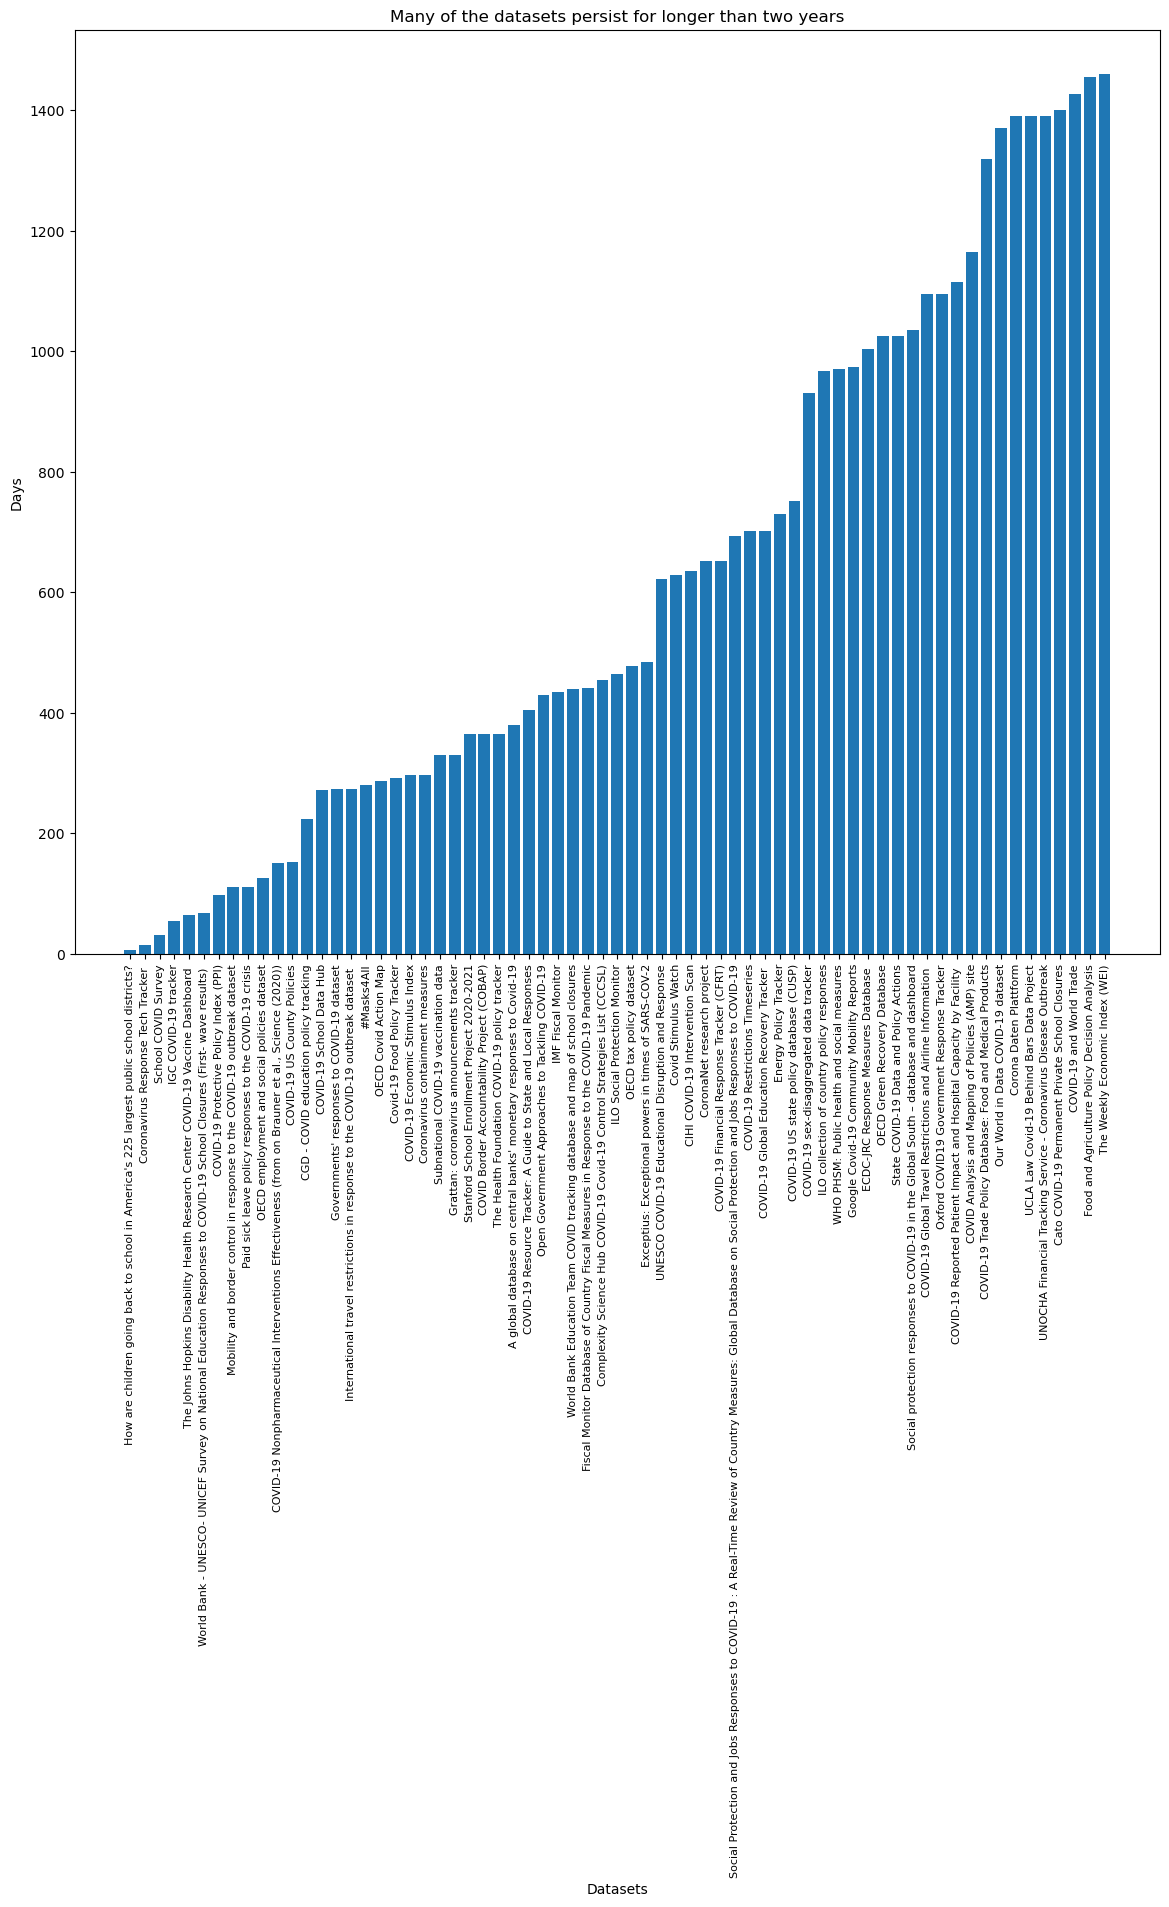

In [979]:
# Plots the datasets by length in days
plt.figure(figsize=[14.0, 12.0])
plt.bar(x = dates_dataframe['Title'],  height = dates_dataframe['Days number'], width = 0.8)
plt.title('Many of the datasets persist for longer than two years')
plt.xlabel('Datasets')
plt.ylabel('Days')
plt.xticks(rotation=90)
plt.show()

<div class="alert-info">
Now that we've got the datasets on a simple view by the number of days, let's go at more parameters of their distribution. 
</div>

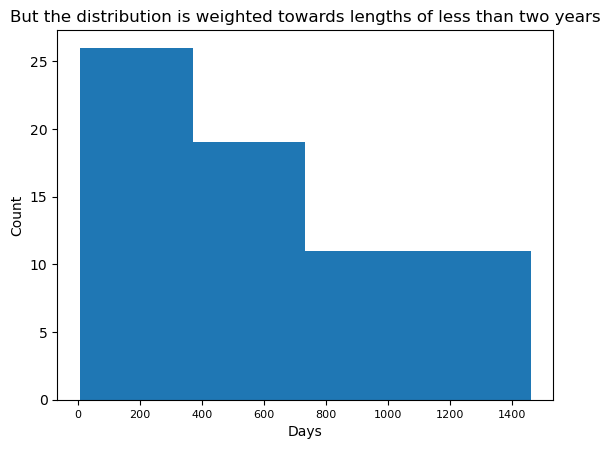

In [980]:
# Plots the datasets by bins of 365 days
plt.figure()
plt.hist(dates_dataframe['Days number'].values, bins = 4)
plt.title('But the distribution is weighted towards lengths of less than two years')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

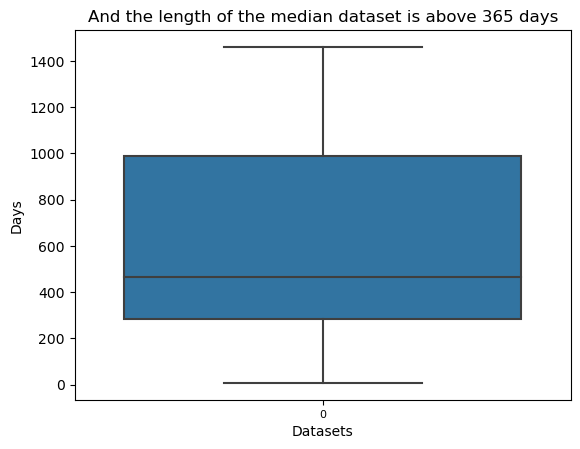

In [981]:
# Puts the days counts of the databases into a boxplot
plt.figure()
sns.boxplot(data=dates_dataframe['Days number'])
plt.title('And the length of the median dataset is above 365 days')
plt.xlabel('Datasets')
plt.ylabel('Days')
plt.show()

In [982]:
# Gives the standard parameters of the datasets
dates_dataframe['Days number'].describe()

count      67.000000
mean      617.985075
std       442.019933
min         7.000000
25%       283.500000
50%       464.000000
75%       988.000000
max      1460.000000
Name: Days number, dtype: float64

<div class="alert-info">
Basically, our meta-dataset has a good amount of policy trackers that followed Covid decision-making across the first two years of the pandemic, which bodes well for later analysis. 
    
<br>
    
Before we move on to the next section, let's add the days counts to the main dataframe for convenience. 
</div>

In [983]:
# Add the days counts to the main dataframe
oxford_supertracker['Length (days)'] = abs(oxford_supertracker['Start Date'] - oxford_supertracker['End Date']).dt.days

In [984]:
# Checks change
oxford_supertracker

Title                                                                                                     Link                                                                                   Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Country Coverage           Data Format                                                                                                                                                                                                                                                                  Authors    Level of Observation Start Date   End Date                                                                      Source Language                                                                                                                                                                              World Region                     Provider  Length (days)
0                                                                                                              #Masks4All                                             https://masks4all.co/what-countries-require-masks-in-public/                                                              Non-Pharmaceutical Interventions                                                                                                                                                                                                                                                                                                                                                                                                                    collects what countries require masks in public or recommend masks.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

## Authors, source, and provider
<a id='authors_source_and_provider'></a>

<div class="alert-info">
Let's have a look at the basic data that we're going to be dealing with - likely having to clean - in this section. 
</div>

In [985]:
# Gives the number of authors
oxford_supertracker['Authors'].nunique()

65

In [986]:
# Sets column widths to show all of the text, when un-hashed
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', None)
pd.set_option('max_colwidth', None)

In [987]:
# Creates a dataframe for the dataset authors
authors = pd.DataFrame(oxford_supertracker['Authors'].unique())

In [988]:
# Shows the top of the dataframe
authors.head(33)

0
0                                                                                                                                                                                                                                                                                                                                                                                [#Masks4All](https://masks4all.co/)
1                                                                                                                                            [Carlos Cantú](https://www.bis.org/author/carlos_cant%c3%ba.htm); [Paolo Cavallino](https://www.bis.org/author/paolo_cavallino.htm); [Fiorella De Fiore](https://www.bis.org/author/fiorella_de_fiore.htm); [James Yetman](https://www.bis.org/author/james_yetman.htm)
2                                                                                                                                                                                                                                                                                                   [Center for Global Development](https://twitter.com/CGDev);\n    [Lee Crawfurd](https://twitter.com/leecrawfurd)
3                                                                                                                                                                                                                                                                                                                                  [Canadian Institute for Health Information (CIHI)](https://twitter.com/CIHI_ICIS)
4                                                                                                                                                                                                                              [Georgetown Global Health Science & Security](https://twitter.com/georgetown_ghss);\n[Talus Analytics, LLC](https://twitter.com/talusanalytics/);\n[NTI](https://twitter.com/NTI_WMD)
5   [Mary Shiraef](https://politicalscience.nd.edu/people/students/mary-a-shiraef/); Mark Weiss; Ian Wang; Camilla Kline; Nikolas Lazar; Michael Shiraef; Ellen Shiraef; Noah Taylor; Bryn Walker; Rachel Musetti; Hannah Risman; Cayleigh Jackson; Cora Hirst; Aadya Bhaskaran; Elizabeth Beling; Aman Bedi; Layth Mattar; Suzanne Martin; Kriti Desai; Yeshwini Selvaraj; Thuy Nguyen; Amalia Gradie; Sarah Naseer
6                                                                                                                                                                                                                                        [Ceyhun Elgin](https://twitter.com/CeyhunElgin);\n        [Basbug Gokce](https://twitter.com/BasbugGokce);\n        [Abdullah Yalaman](https://twitter.com/AbdullahYalaman)
7                                                                                                                                                                                                                                                                                                                                                                 [Yale School of Management](https://som.yale.edu/)
8                                                                                                                                                                                                                                               [Johns Hopkins University eSchool+ Initiative](https://equityschoolplus.jhu.edu/); [World Bank](https://twitter.com/worldbank); [UNICEF](https://twitter.com/unicef)
9                                                                                                                                                                                                                                                                                                                      [United Nations Office for the Coordinatio

In [989]:
# Shows the bottom of the dataframe
authors.tail(32)

0
33                                                                                                                                                                                                   [Food and Agriculture Organization of the United Nations](https://twitter.com/fao)
34                                                                                                                                                                                                 [Google](https://twitter.com/Google);\n[Google Maps](https://twitter.com/googlemaps)
35                                                                                                                                                  [Simon Porcher](https://twitter.com/SimonPorcher); [IAE Paris - Université Paris I Panthéon-Sorbonne](https://twitter.com/iaeparis)
36                                                                                                                                                                              [Grattan Institute](https://twitter.com/GrattanInst); [Anika Stobart](https://twitter.com/AnikaStobart)
37                                                                                                                                                                                                                                            [USA Facts](https://twitter.com/USAFacts)
38                                                                                                                                                                                                                           [International Growth Centre](https://twitter.com/The_IGC)
39                                                                                                                                                                                                                                                                                  ILO
40                                                                                                                                                                                                                                                   [IMF](https://twitter.com/IMFNews)
41                                                                                     [Lorenzo Piccoli](https://twitter.com/piccolimeister); Jelena Dzankic; Andreas Perret; [Didier Ruedin](https://twitter.com/DidierRuedin); [Timothy Jacob-Owens](https://twitter.com/TJacobOwens)
42                                              [Lorenzo Piccoli](https://twitter.com/piccolimeister); [Leslie Ader](https://twitter.com/LeslieAder); [Paula Hoffmeyer](https://twitter.com/PZlotnik); Christina Mittmasser; Oliver Pedersen; Aurélie Pont; Frowin Rausis; Petra Sidler
43                                                                                            [OECD](https://twitter.com/OECD);\n    [OECD Economy](https://twitter.com/OECDeconomy);\n    [OECD Social](https://twitter.com/OECD_Social);\n    [OECD Tax](https://twitter.com/OECDtax)
44                                                                                                                                                                                                                                     [OECD Environment](https://twitter.com/OECD_ENV)
45                                                                                                                [OECD Social](https://twitter.com/OECD_Social);\n        [Andrea Garnero](https://twitter.com/AGarnero);\n        [Sebastian Koenigs](https://twitter.com/sebkoenigs)
46  [OECD Tax](https://twitter.com/OECDtax);\n        [David Bradbury](https://twitter.com/DBradbury1021);\n        [Tibor Hanappi](https://twitter.com/THanappi);\n        [Pierce O'Reilly](https://twitter.com/PierceOReilly);\n        [Jonas Teusch](https://twitter.com/jmteusch)
47                                                                            

<div class="alert-info">
The information given on the authors looks like its in usable shape. Most entries are the name of an organisation, or the names of the authors, with a Twitter handle or website attached. That's enough information for later use. 
    
<br>
    
Let's see what we have in the Source column. 
</div>

In [990]:
# Gives the number of sources
oxford_supertracker['Source'].nunique()

27

In [991]:
# Gives the sources
oxford_supertracker['Source'].unique()

array(['Media', 'Governmental agencies',
       'Governmental agencies; International organisations; Media',
       'International organisations; Academics',
       'Governmental agencies; International organisations',
       'Governmental agencies; Companies',
       'Governmental agencies; Media; Academics',
       'Governmental agencies; Media',
       'Governmental agencies; Media; Academics; Think tanks; other trackers',
       'Governmental agencies; International organisations; Academics; Media',
       'Governmental agencies; Media; Academics; Think tanks',
       'Governmental agencies; Think tanks', 'Media; Think tanks',
       'Governmental agencies; Academics',
       'Governmental agencies; Think tanks; Academics',
       'Think tanks; Companies', 'Companies',
       'International organisations; NGOs; Think tanks',
       'Governmental agencies; International organisations; Companies',
       'International organisations',
       'Governmental agencies; Think tanks; Compa

<div class="alert-info">
There are only 27 'sources' entries across the datasets, but these are a mix of a smaller number of types of source. We'll need to identify those over a few steps, similar to some of the ones above. 
</div>

In [992]:
# Gets the set of unique source clusters
sources_shown = oxford_supertracker['Source'].unique()

# Converts the array to a list
sources_shown = sources_shown.tolist()

# Shows starting list
sources_shown

['Media',
 'Governmental agencies',
 'Governmental agencies; International organisations; Media',
 'International organisations; Academics',
 'Governmental agencies; International organisations',
 'Governmental agencies; Companies',
 'Governmental agencies; Media; Academics',
 'Governmental agencies; Media',
 'Governmental agencies; Media; Academics; Think tanks; other trackers',
 'Governmental agencies; International organisations; Academics; Media',
 'Governmental agencies; Media; Academics; Think tanks',
 'Governmental agencies; Think tanks',
 'Media; Think tanks',
 'Governmental agencies; Academics',
 'Governmental agencies; Think tanks; Academics',
 'Think tanks; Companies',
 'Companies',
 'International organisations; NGOs; Think tanks',
 'Governmental agencies; International organisations; Companies',
 'International organisations',
 'Governmental agencies; Think tanks; Companies; Media',
 'Governmental agencies; International organisations; Academics',
 'Governmental agencies; 

In [993]:
# Creates holding list of terms
sources_holding = []

In [994]:
# Loops through the entries in the edited list
for entry in sources_shown:
    # Splits any entry with a semi-colon and puts it into the holding list
    sources_holding.append(entry.split('; '))

In [995]:
# Creates a list for the definitive terms
sources_definitive = []

In [996]:
# Appends the split entries to the definitive list, starting with a loop through the entries
for entry in sources_holding:
    # Loops through the sources for each entry
    for term in entry:
        # Checks if the source is not repetitious
        if term not in sources_definitive:
            # Adds the source to the definitive list if it isn't already in it
            sources_definitive.append(term)

In [997]:
# Shows the definitive list of sources
sources_definitive

['Media',
 'Governmental agencies',
 'International organisations',
 'Academics',
 'Companies',
 'Think tanks',
 'other trackers',
 'NGOs']

<div class="alert-info">
We've got a neat list of types of sources - eight in total. Before we count which are the most common, let's have a look at what is meant by 'other trackers'.
</div>

In [998]:
# Finds all datasets with 'other trackers' in their list of sources
oxford_supertracker.loc[oxford_supertracker['Source'].str.contains('other trackers', na=False)]

Title                                                                                                                          Link                                                                                                                                            Policy Area                                                                                                                                                                                                                                                                                                                                          Focus                                                                                                                                           Country Coverage Data Format                                                Authors Level of Observation Start Date   End Date                                                                Source Language                                                                                                                                                          World Region     Provider  Length (days)
13  COVID-19 Resource Tracker: A Guide to State and Local Responses  https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses  Health and Care Policy; Non-Pharmaceutical Interventions; Housing; Social and Employment Policy; Education Policy; Politics, Elections, Policy Making  This guide is a spreadsheet compiling more than 100 resources tracking state and local data and policy responses in health care, food, housing, and income supports in the USA. It also includes resources on policies to reduce the spread of the disease, support specific populations, and help residents work, learn, and vote from home.                                                                                                                                                        USA        xlsx  [Urban Institute](https://twitter.com/urbaninstitute)         sub-national 2020-03-01 2021-04-09  Governmental agencies; Media; Academics; Think tanks; other trackers  English                                                                                                                                                         North America  Think tanks            404
57                            Subnational COVID-19 vaccination data                                                                    https://github.com/sociepy/covid19-vaccination-subnational                                                                                                                                            Vaccination                                                                                                                                                                                                                                                                                     Global COVID-19 vaccination data at the subnational level.  ARG; AUS; AUT; BEL; BRA; BGR; CAN; CHL; CZE; DNK; FIN; FRA; DEU; ISL; IND; ITA; KOR; LBN; NOR; PER; POL; RUS; SVK; ESP; SWE; CHE; TUR; UKR; GBR; USA; URY         csv                        [SociePY](https://sociepy.org/)         sub-national 2021-01-20 2021-12-16                                 Governmental agencies; other trackers  English  worldwide; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe  Think tanks            330

<div class="alert-info">
From looking at the two entries, it looks like 'other trackers' might refer to a type of source that is not one of the standard ones, or that the entry is an amalgam of tracking sources. If it's the former, the standard labels are enough to cover any range of authors - although 'individuals' could be added - so it doesn't add much. If it's the latter, there are other entries that should have the tag and don't. Let's remove it. 
</div>

In [999]:
# Removes 'other trackers' from source entries
oxford_supertracker.loc[oxford_supertracker['Source'].str.contains('other trackers'), 'Source'] =  oxford_supertracker['Source'].str.replace('; other trackers', '')

In [1000]:
# Checks change
oxford_supertracker.loc[oxford_supertracker['Source'].str.contains('other trackers', na=False)]

Empty DataFrame
Columns: [Title, Link, Policy Area, Focus, Country Coverage, Data Format, Authors, Level of Observation, Start Date, End Date, Source, Language, World Region, Provider, Length (days)]
Index: []

In [1001]:
# Changes the definitive list of sources
sources_definitive.remove('other trackers')

In [1002]:
# Checks change
sources_definitive

['Media',
 'Governmental agencies',
 'International organisations',
 'Academics',
 'Companies',
 'Think tanks',
 'NGOs']

<div class="alert-info">
Now let's count how often each source appears in the dataframe. 
</div>

In [1003]:
# Creates a list of the sources entered
sources_entered = oxford_supertracker['Source'].tolist()

In [1004]:
# Creates holding list of terms
sources_entered_holding = []

In [1005]:
# Loops through the entries in the entered sources list
for entry in sources_entered:
    # Splits any entry with a semi-colon and puts it into the holding list
    sources_entered_holding.append(entry.split('; '))

In [1006]:
# Creates a list for the definitive terms
filtered_sources_entered = []

In [1007]:
# Appends the split entries to the definitive list, starting with a loop through the entries
for entry in sources_entered_holding:
    # Loops through the policy areas in each entry
    for term in entry:
        # Adds the area to the definitive list if it isn't already in it
        filtered_sources_entered.append(term)

In [1008]:
# Checks filtered list
filtered_sources_entered

['Media',
 'Governmental agencies',
 'Governmental agencies',
 'International organisations',
 'Media',
 'Governmental agencies',
 'Governmental agencies',
 'Governmental agencies',
 'International organisations',
 'Academics',
 'Governmental agencies',
 'Governmental agencies',
 'International organisations',
 'Governmental agencies',
 'Companies',
 'Governmental agencies',
 'Media',
 'Academics',
 'Governmental agencies',
 'Media',
 'Governmental agencies',
 'Governmental agencies',
 'Media',
 'Academics',
 'Think tanks',
 'Governmental agencies',
 'Governmental agencies',
 'Governmental agencies',
 'International organisations',
 'Academics',
 'Media',
 'Governmental agencies',
 'Media',
 'Academics',
 'Think tanks',
 'Governmental agencies',
 'Media',
 'Governmental agencies',
 'International organisations',
 'Governmental agencies',
 'Think tanks',
 'Media',
 'Think tanks',
 'Governmental agencies',
 'International organisations',
 'Academics',
 'Media',
 'Governmental agencies',


In [1009]:
# Starts counts of sources terms
media = 0
governmental_agencies = 0
international_organisations = 0
academics = 0
companies = 0
think_tanks = 0
ngos = 0

In [1010]:
# Loops through list of filtered terms
for term in filtered_sources_entered:
    # Checks areas against list of terms
    if term == 'Media':
        media += 1
    if term == 'Governmental agencies':
        governmental_agencies += 1
    if term == 'International organisations':
        international_organisations += 1
    if term == 'Academics':
        academics += 1
    if term == 'Companies':
        companies += 1
    if term == 'Think tanks':
        think_tanks += 1
    if term == 'NGOs':
        ngos += 1

In [1011]:
# Creates dictionary of policy areas tags
sources_areas_tags_counts = {}

In [1012]:
# Adds entries to the dictionary, adding the three areas with no entries
sources_areas_tags_counts['Media'] = media
sources_areas_tags_counts['Governmental agencies'] = governmental_agencies
sources_areas_tags_counts['International organisations'] = international_organisations
sources_areas_tags_counts['Academics'] = academics
sources_areas_tags_counts['Companies'] = companies
sources_areas_tags_counts['Think tanks'] = think_tanks
sources_areas_tags_counts['NGOs'] = ngos

In [1013]:
# Puts the dictionary into a dataframe to be counted
sources_areas_tags_counts_frame = pd.DataFrame.from_dict(sources_areas_tags_counts, orient ='index', columns = ['Count']).sort_values(by ='Count', ascending = False)

# Shows frame
sources_areas_tags_counts_frame

Count
Governmental agencies           56
International organisations     30
Media                           25
Think tanks                     13
Academics                       11
Companies                        6
NGOs                             1

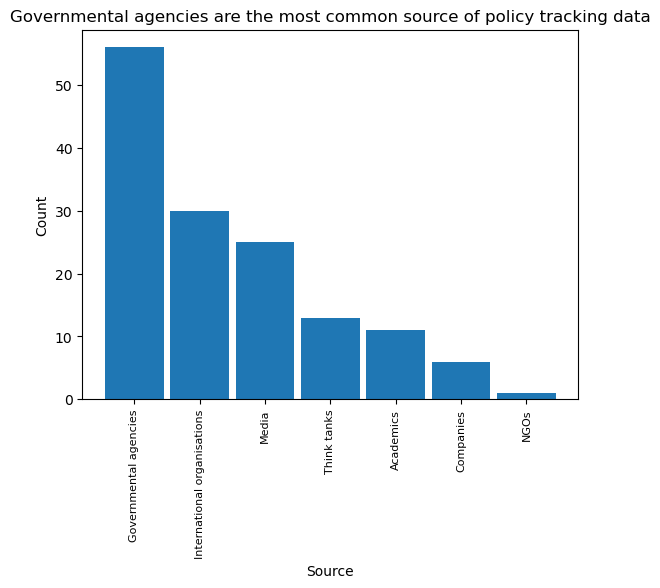

In [1014]:
# Makes barchart for the level of observation counts
plt.figure()
plt.bar(sources_areas_tags_counts_frame.index, sources_areas_tags_counts_frame['Count'], width = 0.9)
plt.xticks(rotation=90)
plt.title('Governmental agencies are the most common source of policy tracking data')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

<div class="alert-info">
Unsurprisingly, government agencies are the dominant source of information on changes in Covid policy in a country. 
    
<br>
    
Let's have a look at the 'provider' entries, too. 
</div>

In [1015]:
# Gets the unique entries from the Provider column
oxford_supertracker['Provider'].unique()

array(['NGOs', 'International organisations', 'Think tanks',
       'Governmental agencies', 'Academics',
       'Academics; International organisations', 'Companies',
       'Academics; Think tanks', 'OECD; International organisations',
       'International organisations; OECD'], dtype=object)

<div class="alert-info">
There aren't any terms that need scrubbing, so let's count the prevalance of those that we have. 
</div>

In [1016]:
# Creates a list of the providers entered
providers_entered = oxford_supertracker['Provider'].tolist()

In [1017]:
# Creates holding list
providers_entered_holding = []

In [1018]:
# Loops through the entries in the entered sources list
for entry in providers_entered:
    # Splits any entry with a semi-colon and puts it into the holding list
    providers_entered_holding.append(entry.split('; '))

In [1019]:
# Creates a list for the definitive terms
filtered_providers_entered = []

In [1020]:
# Appends the split entries to the definitive list, starting with a loop through the entries
for entry in providers_entered_holding:
    # Loops through the policy areas in each entry
    for term in entry:
        # Adds the area to the definitive list if it isn't already in it
        filtered_providers_entered.append(term)

In [1021]:
# Starts counts of providers terms
ngos = 0
international_organisations = 0
think_tanks = 0
governmental_agencies = 0
academics = 0
companies = 0
oecd = 0

In [1022]:
# Loops through list of filtered terms
for term in filtered_providers_entered:
    # Checks areas against list of terms
    if term == 'NGOs':
        ngos += 1
    if term == 'International organisations':
        international_organisations += 1
    if term == 'Think tanks':
        think_tanks += 1
    if term == 'Governmental agencies':
        governmental_agencies += 1
    if term == 'Academics':
        academics += 1
    if term == 'Companies':
        companies += 1  
    if term == 'OECD':
        oecd += 1

In [1023]:
# Creates dictionary of providers
providers_tags_counts = {}

In [1024]:
# Adds entries to the dictionary, adding the three areas with no entries
providers_tags_counts['NGOs'] = ngos
providers_tags_counts['International organisations'] = international_organisations
providers_tags_counts['Think tanks'] = think_tanks
providers_tags_counts['Governmental agencies'] = governmental_agencies
providers_tags_counts['Academics'] = academics
providers_tags_counts['Companies'] = companies
providers_tags_counts['OECD'] = oecd

In [1025]:
# Puts the dictionary into a dataframe to be counted
providers_tags_counts_frame = pd.DataFrame.from_dict(providers_tags_counts, orient ='index', columns = ['Count']).sort_values(by ='Count', ascending = False)

# Shows frame
providers_tags_counts_frame

Count
Academics                       23
International organisations     22
Think tanks                     10
NGOs                             7
Governmental agencies            5
OECD                             5
Companies                        2

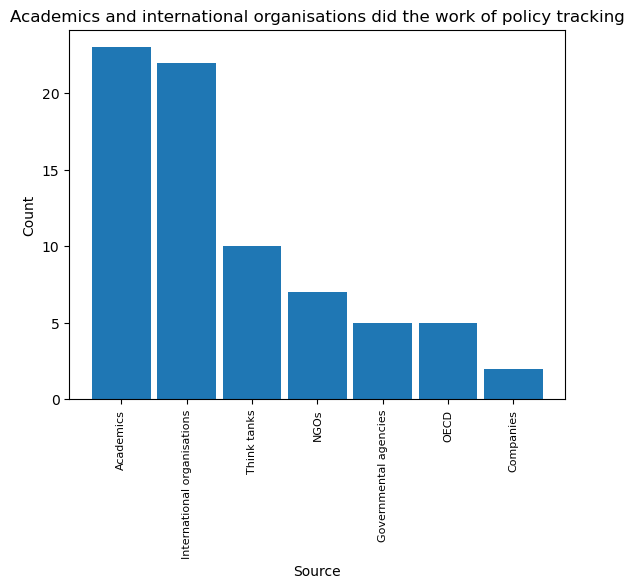

In [1026]:
# Makes barchart for the level of observation counts
plt.figure()
plt.bar(providers_tags_counts_frame.index, providers_tags_counts_frame['Count'], width = 0.9)
plt.xticks(rotation=90)
plt.title('Academics and international organisations did the work of policy tracking')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

<div class="alert-info">
The story from this section is that the policy tracking data is collected mostly from government agencies, by a wide range of organisations that tend to be from academia or the sphere of international organisations. 
    
<br>
On to the final section!
</div>

## World region, country coverage, level of observation 
<a id='world_region_country_coverage_level_of_observation'></a>

<div class="alert-info">
To begin, how many levels of administrative observation are there? 
</div>

In [1027]:
# Gives the number of unique entries for the level of observation
oxford_supertracker['Level of Observation'].nunique()

4

<div class="alert-info">
There are only a small number of types of unique entry in the level of administrative observation column. 
</div>

In [1028]:
# Gives the unique entries for the level of observation
administrative_units = oxford_supertracker['Level of Observation'].unique()

# Prints the unique administrative units
print(administrative_units)

['national' 'national; sub-national' 'sub-national' 'firm-level' nan]


<div class="alert-info">
Let's get rid of the null values. 
</div>

In [1029]:
# Counts the number of null entries
oxford_supertracker['Level of Observation'].isnull().sum()

1

In [1030]:
# Shows the row with the null entry
oxford_supertracker.loc[oxford_supertracker['Level of Observation'].isnull()]

Title                                                                                                     Link       Policy Area                                                                                                                                                                                                                                                      Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Country Coverage Data Format                                                                                                                                                                Authors Level of Observation Start Date   End Date                       Source Language                                                                                                                                                               World Region                     Provider  Length (days)
65  World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results)    https://datacatalog.worldbank.org/dataset/survey-national-education-responses-covid-19-school-closures  Education Policy  National education responses to school closures related to the COVID-19 pandemic by surveying Ministries of Education and national statistics units. [See here for aggregate results](https://infogram.com/copy-copy-covid-fig-_r4-1hke60d1x7m525r?live).  worldwide; AFG; ALB; AND; AIA; ATG; ARG; ARM; AZE; BHS; BHR; BGD; BRB; BLZ; BEN; BTN; BOL; BIH; BWA; BGR; BFA; BDI; KHM; CYM; CHN; COL; COM; COG; COK; CRI; CUB; DJI; DMA; DOM; ECU; SLV; ETH; FJI; GMB; GEO; GHA; GIB; GTM; GIN; GUY; HND; HKG; HUN; IND; IDN; JAM; JPN; JOR; KAZ; KEN; KIR; KGZ; LAO; LBN; MAC; MYS; MDV; MLI; MRT; MUS; MEX; MCO; MSR; MAR; MOZ; MMR; NPL; NLD; NIC; NER; NGA; NIU; OMN; PAK; PLW; PNG; PHL; PRI; QAT; LCA; WSM; SMR; STP; SEN; SYC; SLE; SGP; SLB; LKA; SUR; SYR; THA; TLS; TGO; TON; TTO; TUN; TCA; TUV; ARE; URY; UZB; VEN; YEM; CUW; SRB   xlsx; dta  [World Bank Education Team](https://twitter.com/WBG_Education); [UNESCO-UIS](https://twitter.com/UNESCOstat); [UNICEF Education](https://twitter.com/UNICEFEducation)                  NaN 2020-04-20 2020-06-26  International organisations  English  worldwide; Middle East & North Africa; Eastern Europe & Central Asia; East Asia & Pacific; Sub-Saharan Africa; Latin America & the Caribbean; Southeast Asia; West Europe  International organisations             67

<div class="alert-info">
<a href="https://datacatalog.worldbank.org/search/dataset/0038134" target="_blank">World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results)</a> states that its data is collected at the national level so we'll change the cell value to that. 
</div>

In [1031]:
# Changes the end date for CGD - COVID education policy tracking 
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('World Bank - UNESCO- UNICEF Survey on National Education Responses', na=False), ['Level of Observation']] = 'national'

<div class="alert-info">
At which level are the datasets focused?
</div>

In [1032]:
# Gets the number of entries by the level of observation
entries_by_administrative_level = oxford_supertracker.groupby('Level of Observation').size()

# Puts the count into a dataframe
entries_by_administrative_level =  pd.DataFrame(entries_by_administrative_level)

# Renames first column 
entries_by_administrative_level.rename(columns = {0: 'Count'}, inplace = True)

# Sorts by the count column
entries_by_administrative_level = entries_by_administrative_level.sort_values(by = ['Count'], ascending = False)

# Shows counts
entries_by_administrative_level

Count
Level of Observation         
national                   40
sub-national               14
national; sub-national     12
firm-level                  1

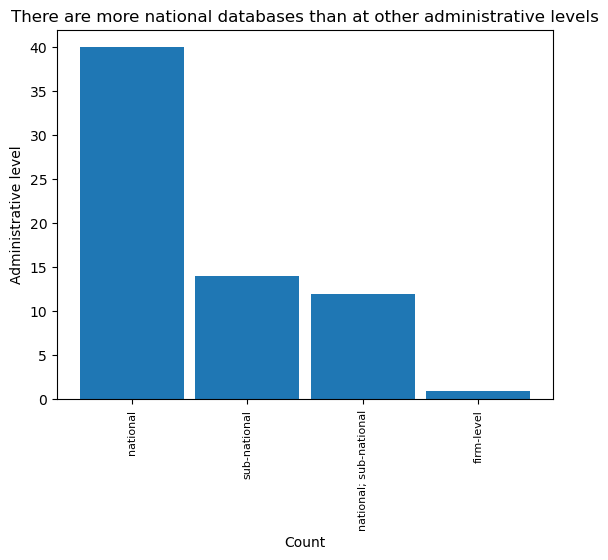

In [1033]:
# Makes barchart for the level of observation counts
plt.figure()
plt.bar(entries_by_administrative_level.index, entries_by_administrative_level['Count'], width = 0.9)
plt.xticks(rotation=90)
plt.title('There are more national databases than at other administrative levels')
plt.xlabel('Count')
plt.ylabel('Administrative level')
plt.show()

<div class="alert-info">
On a simple count it looks like the Covid policy monitors around the world were focused on following what national governments were doing. Three times as many tracked at the national level than the sub-national one, despite the latter probably having meaningful powers to affect the pandemic in many countries. Perhaps this is because it was easier for researchers to follow and measure the policy decisions of national governments. 
    
<br>
    
And let's now look at the firm-level datasets.      
    
</div>

In [1034]:
# Finds the firm-level datasets
supranational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'firm-level']

# Shows the the firm-level datasets
supranational_datasets 

Title                             Link                                                       Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                    Focus Country Coverage      Data Format                                                                                                                                                Authors Level of Observation Start Date   End Date                  Source Language   World Region Provider  Length (days)
27  Covid Stimulus Watch  https://covidstimuluswatch.org/  Macroeconomic and Financial Policy; Social and Employment Policy   strengthen corporate accountability. It assembles CARES Act recipient data on grants and loans per firm and combines it with information about each firm's history of regulatory violations, previous government assistance, federal tax avoidance, and CEO and worker pay practices. It includes US firms receiving grants and loans through the CARES Act. At the moment; it contains more than 5;700 awards; totalling $54 billion.              USA  html; csv; xlsx  [Good Jobs First](https://twitter.com/GoodJobsFirst);\n[Phil Mattera](https://twitter.com/DirtDiggers);\n[Greg LeRoy](https://twitter.com/GregLeRoy4)           firm-level 2020-04-30 2022-01-19  Think tanks; Companies  English  North America     NGOs            629

<div class="alert-info">
<a href="https://covidstimuluswatch.org/" target="_blank">Covid Stimulus Watch</a> monitored financial support provided to companies by US legislation over the pandemic.   
    
<br>
    
Let's also have a quick look at the 'national; sub-national' category.
   
</div>

In [1035]:
# Finds the national-subnational datasets
national_subnational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'national; sub-national']

# Shows the national-subnational datasets
national_subnational_datasets

Title                                                                                                     Link                                                                                                                                                                   Policy Area                                                                                                                                                                                                                                                                                                                                    Focus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Country Coverage           Data Format                                                                                                                                                                                                                                                                                                                           Authors    Level of Observation Start Date   End Date                                                                Source Language                                                                                                                                                                              World Region               Provider  Length (days)
2                                      CGD - COVID education policy tracking           https://docs.google.com/spreadsheets/d/1ndHgP53atJ5J-EtxgWcpSfYG8LdzHpUsnb6mWybErYg/edit#gid=0                                                                                                                                                              Education Policy                                                                                                                                                                                                                                                                                                                          school closures  worldwide; IND; BRA; NGA; USA; AFG; ALB; DZA; ASM; AND; AGO; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FRO; FJI; FIN; FRA; PYF; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MAC; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MCO; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NCL; NZL; NIC; NER; NGA; MNP; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RUS; RWA; WSM; SMR; SAU; SEN; SYC; SLE; SGP; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; SYR; TWN; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TCA; TUV; UGA; UKR; ARE; GBR; URY; UZB; VUT; VEN; VNM; YEM; ZMB; ZWE; CUW; IMN; MNE; SRB; 

<div class="alert-info">
The distinction between the levels of observation of a dataset doesn't seem to have been specified by the <a href="https://supertracker.spi.ox.ac.uk/" target="_blank">Oxford Supertracker</a>, and as shown by the screenshots below of the form for submitting policy trackers, it wasn't a characteristic that users could assert. 
   
</div>

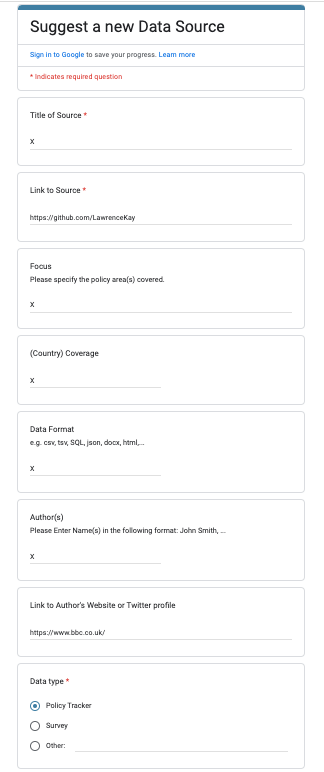

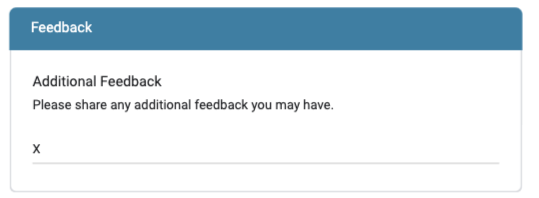

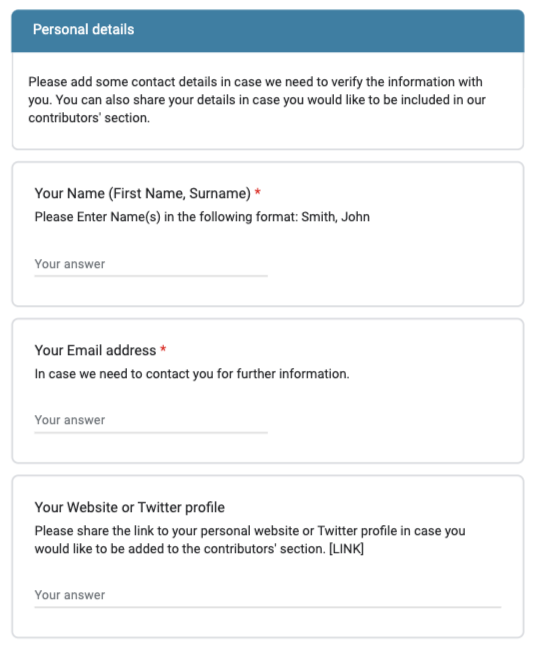

<div class="alert-info">
Given that there don't seem to be guidelines for what makes a dataset specific to one level of observation or another, it must have been determined by the editors of the tracker. Every 'national; sub-national' entry has data at the national level for select countries, as well as the sub-national one for often a small subset. Most of the datasets are focused on the United States.
    
<br>
    
Let's move on to the sub-national ones entries. 
    
</div>

In [1036]:
# Finds the subnational datasets
subnational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'sub-national']

# Shows the subnational datasets
subnational_datasets

Title                                                                                                                          Link                                                                                                                                                                                                             Policy Area                                                                                                                                                                                                                                                                                                                                                                                                                                                     Focus                                                                                                                                           Country Coverage                     Data Format                                                                                                                                                                                                                                                   Authors Level of Observation Start Date   End Date                                                Source Language                                                                                                                                                          World Region               Provider  Length (days)
12                      COVID-19 Reported Patient Impact and Hospital Capacity by Facility                                   https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u                                                                                                                                                                                                  Health and Care Policy                                                                                                                                                                                                                                                                                                                          The dataset provides facility-level data for hospital utilization and coronavirus-related capacity aggregated on a weekly basis.                                                                                                                                                        USA  csv; json; kmz; rdf; rss; xlsx                                                                                                                                                                                  [U.S. Department of Health & Human Services](https://twitter.com/hhsgov)         sub-national 2020-12-12 2023-12-31                                 Governmental agencies  English                                                                                                                                                         North America  Governmental agencies           1114
13                          COVID-19 Resource Tracker: A Guide to State and Local Responses  https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses                                                                   Health and Care Policy; Non-Pharmaceutical Interventions; Housing; Social and Employment Policy; Education Policy; Politics, Elections, Policy Making                                                                                                             This guide is a spreadsheet compiling more than 100 resources tracking state and local data and policy responses in health care, food, housing, and income supports in the USA. It also includes resources on policies to reduce the spread of the disease, support specific populations, and help residen

<div class="alert-info">
There are 41 datasets categorised as 'sub-national'.
    
<br>
    
Let's have a look at the World Region entries.
</div>

In [1037]:
# Finds unique 'world region' entries
oxford_supertracker['World Region'].unique()

array(['worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa',
       'worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe',
       'North America',
       'West Europe; Eastern Europe & Central Asia; Middle East & North Africa; Southeast Asia; Sub-Saharan Africa; East Asia & Pacific',
       'West Europe',
       'North America; East Asia & Pacific; Southeast Asia; West Europe; Eastern Europe & Central Asia',
       'Eastern Europe & Central Asia; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Sub-Saharan Africa',
       'West Europe; Eastern Europe & Central Asia',
       'European Union; West Europe; North America',
       'East Asia & Pacific',
       'West Europe; North America; Latin America 

In [1038]:
# Creates a list of the sources entered
world_regions_entered = oxford_supertracker['World Region'].tolist()

In [1039]:
# Creates holding list of terms
world_regions_entered_holding = []

In [1040]:
world_regions_entered_holding

[]

In [1041]:
# Loops through the entries in the entered sources list
for entry in world_regions_entered:
    # Splits any entry with a semi-colon and puts it into the holding list
    world_regions_entered_holding.append(entry.split('; '))

In [1042]:
# Creates a list for the definitive terms
filtered_world_regions_entered = []

In [1043]:
# Appends the split entries to the definitive list, starting with a loop through the entries
for entry in world_regions_entered_holding:
    # Loops through the policy areas in each entry
    for term in entry:
        # Adds the area to the definitive list if it isn't already in it
        filtered_world_regions_entered.append(term)

In [1044]:
# Checks filtered list
filtered_world_regions_entered

['worldwide',
 'West Europe',
 'North America',
 'East Asia & Pacific',
 'Southeast Asia',
 'Middle East & North Africa',
 'Latin America & the Caribbean',
 'Eastern Europe & Central Asia',
 'Sub-Saharan Africa',
 'worldwide',
 'Sub-Saharan Africa',
 'East Asia & Pacific',
 'Eastern Europe & Central Asia',
 'Latin America & the Caribbean',
 'Middle East & North Africa',
 'Southeast Asia',
 'North America',
 'West Europe',
 'worldwide',
 'Sub-Saharan Africa',
 'East Asia & Pacific',
 'Eastern Europe & Central Asia',
 'Latin America & the Caribbean',
 'Middle East & North Africa',
 'Southeast Asia',
 'North America',
 'West Europe',
 'North America',
 'worldwide',
 'West Europe',
 'North America',
 'East Asia & Pacific',
 'Southeast Asia',
 'Middle East & North Africa',
 'Latin America & the Caribbean',
 'Eastern Europe & Central Asia',
 'Sub-Saharan Africa',
 'worldwide',
 'Sub-Saharan Africa',
 'East Asia & Pacific',
 'Eastern Europe & Central Asia',
 'Latin America & the Caribbean',
 

In [1045]:
# Creates a list for the definitive terms
world_regions_definitive = []

In [1046]:
# Appends the split entries to the definitive list, starting with a loop through the entries
for entry in world_regions_entered_holding:
    # Loops through the policy areas in each entry
    for area in entry:
        # Checks if the area is not repetitious
        if area not in world_regions_definitive:
            # Adds the area to the definitive list if it isn't already in it
            world_regions_definitive.append(area)

In [1047]:
# Shows definitive list of world regions used
world_regions_definitive

['worldwide',
 'West Europe',
 'North America',
 'East Asia & Pacific',
 'Southeast Asia',
 'Middle East & North Africa',
 'Latin America & the Caribbean',
 'Eastern Europe & Central Asia',
 'Sub-Saharan Africa',
 'European Union',
 'OECD']

In [1048]:
# Starts counts of world regions
worldwide = 0
west_europe = 0
north_america = 0
east_asia_pacific = 0
southeast_asia = 0
middle_east_north_africa = 0
latin_america_caribbean = 0
eastern_europe_central_asia = 0
sub_saharan_africa = 0
european_union = 0
oecd = 0

In [1049]:
# Loops through list of filtered terms
for term in filtered_world_regions_entered:
    # Checks areas against list of terms
    if term == 'worldwide':
        worldwide += 1
    if term == 'West Europe':
        west_europe += 1
    if term == 'North America':
       north_america += 1
    if term == 'East Asia & Pacific':
        east_asia_pacific += 1
    if term == 'Southeast Asia':
        southeast_asia += 1
    if term == 'Middle East & North Africa':
        middle_east_north_africa += 1    
    if term == 'Latin America & the Caribbean':
        latin_america_caribbean += 1
    if term == 'Eastern Europe & Central Asia':
        eastern_europe_central_asia += 1    
    if term == 'Sub-Saharan Africa':
        sub_saharan_africa += 1
    if term == 'European Union':
        european_union += 1
    if term == 'OECD':
        oecd += 1

In [1050]:
# Creates dictionary of policy areas tags
world_regions_tags_counts = {}

In [1051]:
# Adds entries to the dictionary, adding the three areas with no entries
world_regions_tags_counts['worldwide'] = worldwide
world_regions_tags_counts['West Europe'] = west_europe
world_regions_tags_counts['North America'] = north_america
world_regions_tags_counts['East Asia & Pacific'] = east_asia_pacific
world_regions_tags_counts['Southeast Asia'] = southeast_asia
world_regions_tags_counts['Middle East & North Africa'] = middle_east_north_africa
world_regions_tags_counts['Latin America & the Caribbean'] = latin_america_caribbean
world_regions_tags_counts['Eastern Europe & Central Asia'] = eastern_europe_central_asia
world_regions_tags_counts['Sub-Saharan Africa'] = sub_saharan_africa
world_regions_tags_counts['European Union'] = european_union
world_regions_tags_counts['OECD'] = oecd

In [1052]:
# Puts the dictionary into a dataframe to be counted
world_regions_tags_counts_frame = pd.DataFrame.from_dict(world_regions_tags_counts, orient ='index', columns = ['Count']).sort_values(by ='Count', ascending = False)

# Shows frame
world_regions_tags_counts_frame

Count
North America                     57
West Europe                       49
Eastern Europe & Central Asia     47
East Asia & Pacific               45
Southeast Asia                    44
Latin America & the Caribbean     43
Middle East & North Africa        42
Sub-Saharan Africa                41
worldwide                         39
OECD                               2
European Union                     1

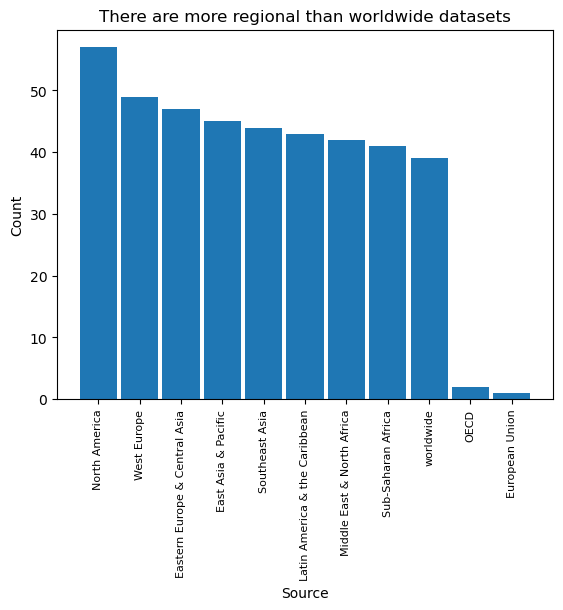

In [1108]:
# Makes barchart for the level of observation counts
plt.figure()
plt.bar(world_regions_tags_counts_frame.index, world_regions_tags_counts_frame['Count'], width = 0.9)
plt.xticks(rotation=90)
plt.title('There are more regional than worldwide datasets')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

<div class="alert-info">
Now let's count the countries that are tagged in the 'Country Coverage' column, using the approach used several times now. 
    
<br>
    
This might be a difficult one to judge, as by looking at the column immediatelt below, there are clearly entries that are just marked 'worldwide'; others that are worldwide and list a great many countries in the world; and a final category that just list a lot of countries.  
</div>

In [1081]:
# Puts the 'country coverage' column into a frame by itself
country_coverage = pd.DataFrame(oxford_supertracker['Country Coverage'])

# Shows the frame
country_coverage

Country Coverage
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           worldwide
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    EU; DZA; ARG; AUS; BRA; CAN; CHL; CHN; COL; CZE; DNK; HKG; HUN; IND; IDN; ISR; JPN; KOR; KWT; MYS; MEX; MAR; NZL; NOR; PER; PHL; POL; ROU; SAU; SGP; ZAF; SWE; CHE; THA; TUR; ARE; GBR; USA; VNM
2   worldwide; IND; BRA; NGA; USA; AFG; ALB; DZA; ASM; AND; AGO; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FRO; FJI; FIN; FRA; PYF; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MAC; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MCO; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NCL; NZL; NIC; NER; NGA; MNP; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RUS; RWA; WSM; SMR; SAU; SEN; SYC; SLE; SGP; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; SYR; TWN; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TCA; TUV; UGA; UKR; ARE; GBR; URY; UZB; VUT; VEN; VNM; YEM; ZMB; ZWE; CUW; IMN; MNE; SRB; SXM; SSD; XKX
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

<div class="alert-info">
If we count the country tags entries we might make further sense of the column.   
</div>

In [1082]:
# Finds unique 'country coverage' entries
oxford_supertracker['Country Coverage'].unique()

array(['worldwide',
       'EU; DZA; ARG; AUS; BRA; CAN; CHL; CHN; COL; CZE; DNK; HKG; HUN; IND; IDN; ISR; JPN; KOR; KWT; MYS; MEX; MAR; NZL; NOR; PER; PHL; POL; ROU; SAU; SGP; ZAF; SWE; CHE; THA; TUR; ARE; GBR; USA; VNM',
       'worldwide; IND; BRA; NGA; USA; AFG; ALB; DZA; ASM; AND; AGO; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FRO; FJI; FIN; FRA; PYF; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MAC; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MCO; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NCL; NZL; NIC; NER; NGA; MNP; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RUS; RWA; WSM; SMR

In [1083]:
# Creates a list of the sources entered
countries_entered = oxford_supertracker['Country Coverage'].tolist()

In [1084]:
# Creates holding list of terms
countries_entered_holding = []

In [1085]:
# Loops through the entries in the entered sources list
for entry in countries_entered:
    # Splits any entry with a semi-colon and puts it into the holding list
    countries_entered_holding.append(entry.split('; '))

In [1086]:
# Creates a list for the definitive terms
countries_entered_filtered = []

In [1087]:
# Appends the split entries to the definitive list, starting with a loop through the entries
for entry in countries_entered_holding:
    # Loops through the policy areas in each entry
    for term in entry:
        # Adds the area to the definitive list if it isn't already in it
        countries_entered_filtered.append(term)

In [1088]:
# Checks filtered list
countries_entered_filtered

['worldwide',
 'EU',
 'DZA',
 'ARG',
 'AUS',
 'BRA',
 'CAN',
 'CHL',
 'CHN',
 'COL',
 'CZE',
 'DNK',
 'HKG',
 'HUN',
 'IND',
 'IDN',
 'ISR',
 'JPN',
 'KOR',
 'KWT',
 'MYS',
 'MEX',
 'MAR',
 'NZL',
 'NOR',
 'PER',
 'PHL',
 'POL',
 'ROU',
 'SAU',
 'SGP',
 'ZAF',
 'SWE',
 'CHE',
 'THA',
 'TUR',
 'ARE',
 'GBR',
 'USA',
 'VNM',
 'worldwide',
 'IND',
 'BRA',
 'NGA',
 'USA',
 'AFG',
 'ALB',
 'DZA',
 'ASM',
 'AND',
 'AGO',
 'ATG',
 'ARG',
 'ARM',
 'ABW',
 'AUS',
 'AUT',
 'AZE',
 'BHS',
 'BHR',
 'BGD',
 'BRB',
 'BLR',
 'BEL',
 'BLZ',
 'BEN',
 'BMU',
 'BTN',
 'BOL',
 'BIH',
 'BWA',
 'BRA',
 'BRN',
 'BGR',
 'BFA',
 'BDI',
 'KHM',
 'CMR',
 'CAN',
 'CYM',
 'CAF',
 'TCD',
 'CHL',
 'CHN',
 'COL',
 'COM',
 'COG',
 'CRI',
 'HRV',
 'CUB',
 'CYP',
 'CZE',
 'DNK',
 'DJI',
 'DMA',
 'DOM',
 'ECU',
 'EGY',
 'SLV',
 'GNQ',
 'ERI',
 'EST',
 'ETH',
 'FRO',
 'FJI',
 'FIN',
 'FRA',
 'PYF',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GIB',
 'GRC',
 'GRL',
 'GRD',
 'GUM',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HTI',
 'HND

In [1089]:
# Creates a list for the definitive terms
countries_definitive = []

In [1091]:
# Appends the split entries to the definitive list, starting with a loop through the entries
for entry in countries_entered_holding:
    # Loops through the policy areas in each entry
    for area in entry:
        # Checks if the area is not repetitious
        if area not in countries_definitive:
            # Adds the area to the definitive list if it isn't already in it
            countries_definitive.append(area)

In [1092]:
for entry in world_regions_entered_holding:
    # Loops through the policy areas in each entry
    for area in entry:
        # Checks if the area is not repetitious
        if area not in world_regions_definitive:
            # Adds the area to the definitive list if it isn't already in it
            world_regions_definitive.append(area)

In [1064]:
# Shows definitive list of world regions used
countries_definitive

['worldwide',
 'EU',
 'DZA',
 'ARG',
 'AUS',
 'BRA',
 'CAN',
 'CHL',
 'CHN',
 'COL',
 'CZE',
 'DNK',
 'HKG',
 'HUN',
 'IND',
 'IDN',
 'ISR',
 'JPN',
 'KOR',
 'KWT',
 'MYS',
 'MEX',
 'MAR',
 'NZL',
 'NOR',
 'PER',
 'PHL',
 'POL',
 'ROU',
 'SAU',
 'SGP',
 'ZAF',
 'SWE',
 'CHE',
 'THA',
 'TUR',
 'ARE',
 'GBR',
 'USA',
 'VNM',
 'NGA',
 'AFG',
 'ALB',
 'ASM',
 'AND',
 'AGO',
 'ATG',
 'ARM',
 'ABW',
 'AUT',
 'AZE',
 'BHS',
 'BHR',
 'BGD',
 'BRB',
 'BLR',
 'BEL',
 'BLZ',
 'BEN',
 'BMU',
 'BTN',
 'BOL',
 'BIH',
 'BWA',
 'BRN',
 'BGR',
 'BFA',
 'BDI',
 'KHM',
 'CMR',
 'CYM',
 'CAF',
 'TCD',
 'COM',
 'COG',
 'CRI',
 'HRV',
 'CUB',
 'CYP',
 'DJI',
 'DMA',
 'DOM',
 'ECU',
 'EGY',
 'SLV',
 'GNQ',
 'ERI',
 'EST',
 'ETH',
 'FRO',
 'FJI',
 'FIN',
 'FRA',
 'PYF',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GIB',
 'GRC',
 'GRL',
 'GRD',
 'GUM',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HTI',
 'HND',
 'ISL',
 'IRQ',
 'IRL',
 'ITA',
 'JAM',
 'JOR',
 'KAZ',
 'KEN',
 'KIR',
 'LVA',
 'LBN',
 'LSO',
 'LBR',
 'LBY',
 'L

In [1093]:
# Counts the number of unique country tags
len(countries_definitive)

230

<div class="alert-info">
There are more tags than countries in the world, so the list must include some regions. That's not a big problem.   
</div>

In [1094]:
# Sets country counts tags to zero
EU = 0
DZA = 0
ARG = 0
AUS = 0
BRA = 0
CAN = 0
CHL = 0
CHN = 0
COL = 0
CZE = 0
DNK = 0
HKG = 0
HUN = 0
IND = 0
IDN = 0
ISR = 0
JPN = 0
KOR = 0
KWT = 0
MYS = 0
MEX = 0
MAR = 0
NZL = 0
NOR = 0
PER = 0
PHL = 0
POL = 0
ROU = 0
SAU = 0
SGP = 0
ZAF = 0
SWE = 0
CHE = 0
THA = 0
TUR = 0
ARE = 0
GBR = 0
USA = 0
VNM = 0
NGA = 0
AFG = 0
ALB = 0
ASM = 0
AND = 0
AGO = 0
ATG = 0
ARM = 0
ABW = 0
AUT = 0
AZE = 0
BHS = 0
BHR = 0
BGD = 0
BRB = 0
BLR = 0
BEL = 0
BLZ = 0
BEN = 0
BMU = 0
BTN = 0
BOL = 0
BIH = 0
BWA = 0
BRN = 0
BGR = 0
BFA = 0
BDI = 0
KHM = 0
CMR = 0
CYM = 0
CAF = 0
TCD = 0
COM = 0
COG = 0
CRI = 0
HRV = 0
CUB = 0
CYP = 0
DJI = 0
DMA = 0
DOM = 0
ECU = 0
EGY = 0
SLV = 0
GNQ = 0
ERI = 0
EST = 0
ETH = 0
FRO = 0
FJI = 0
FIN = 0
FRA = 0
PYF = 0
GAB = 0
GMB = 0
GEO = 0
DEU = 0
GHA = 0
GIB = 0
GRC = 0
GRL = 0
GRD = 0
GUM = 0
GTM = 0
GIN = 0
GNB = 0
GUY = 0
HTI = 0
HND = 0
ISL = 0
IRQ = 0
IRL = 0
ITA = 0
JAM = 0
JOR = 0
KAZ = 0
KEN = 0
KIR = 0
LVA = 0
LBN = 0
LSO = 0
LBR = 0
LBY = 0
LIE = 0
LTU = 0
LUX = 0
MAC = 0
MDG = 0
MWI = 0
MDV = 0
MLI = 0
MLT = 0
MHL = 0
MRT = 0
MUS = 0
MCO = 0
MNG = 0
MOZ = 0
MMR = 0
NAM = 0
NRU = 0
NPL = 0
NLD = 0
NCL = 0
NIC = 0
NER = 0
MNP = 0
OMN = 0
PAK = 0
PLW = 0
PAN = 0
PNG = 0
PRY = 0
PRT = 0
PRI = 0
QAT = 0
RUS = 0
RWA = 0
WSM = 0
SMR = 0
SEN = 0
SYC = 0
SLE = 0
SVN = 0
SLB = 0
SOM = 0
ESP = 0
LKA = 0
SDN = 0
SUR = 0
SWZ = 0
SYR = 0
TWN = 0
TJK = 0
TLS = 0
TGO = 0
TON = 0
TTO = 0
TUN = 0
TKM = 0
TCA = 0
TUV = 0
UGA = 0
UKR = 0
URY = 0
UZB = 0
VUT = 0
VEN = 0
YEM = 0
ZMB = 0
ZWE = 0
CUW = 0
IMN = 0
MNE = 0
SRB = 0
SXM = 0
SSD = 0
XKX = 0
Canada = 0
UMI = 0
SVK = 0
KGZ = 0
CPV = 0
PRK = 0
KNA = 0
LCA = 0
VCT = 0
STP = 0
COK = 0
CIV = 0
NIU = 0
USA = 0
MDA = 0
MKD = 0
AIA = 0
MSR = 0
TZA = 0
TKL = 0
GGY = 0
JEY = 0
IRN = 0
LAO = 0
FSM = 0
SPM = 0
worldwide = 0
REU = 0
ESH = 0
GBR = 0
GUF = 0

In [1095]:
# Loops through list of filtered terms
for term in countries_entered_filtered:
    # Checks areas against list of terms
    if term == 'worldwide':
        worldwide += 1
    if term == 'EU':
        EU += 1
    if term == 'DZA':
        DZA += 1
    if term == 'ARG':
        ARG += 1
    if term == 'AUS':
        AUS += 1
    if term == 'BRA':
        BRA += 1
    if term == 'CAN':
        CAN += 1
    if term == 'CHL':
        CHL += 1
    if term == 'CHN':
        CHN += 1
    if term == 'COL':
        COL += 1
    if term == 'CZE':
        CZE += 1
    if term == 'DNK':
        DNK += 1
    if term == 'HKG':
        HKG += 1
    if term == 'HUN':
        HUN += 1
    if term == 'IND':
        IND += 1
    if term == 'IDN':
        IDN += 1
    if term == 'ISR':
        ISR += 1
    if term == 'JPN':
        JPN += 1
    if term == 'KOR':
        KOR += 1
    if term == 'KWT':
        KWT += 1
    if term == 'MYS':
        MYS += 1
    if term == 'MEX':
        MEX += 1
    if term == 'MAR':
        MAR += 1
    if term == 'NZL':
        NZL += 1
    if term == 'NOR':
        NOR += 1
    if term == 'PER':
        PER += 1
    if term == 'PHL':
        PHL += 1
    if term == 'POL':
        POL += 1
    if term == 'ROU':
        ROU += 1
    if term == 'SAU':
        SAU += 1
    if term == 'SGP':
        SGP += 1
    if term == 'ZAF':
        ZAF += 1
    if term == 'SWE':
        SWE += 1
    if term == 'CHE':
        CHE += 1
    if term == 'THA':
        THA += 1
    if term == 'TUR':
        TUR += 1
    if term == 'ARE':
        ARE += 1
    if term == 'GBR':
        GBR += 1
    if term == 'USA':
        USA += 1
    if term == 'VNM':
        VNM += 1
    if term == 'NGA':
        NGA += 1
    if term == 'AFG':
        AFG += 1
    if term == 'ALB':
        ALB += 1
    if term == 'ASM':
        ASM += 1
    if term == 'AND':
        AND += 1
    if term == 'AGO':
        AGO += 1
    if term == 'ATG':
        ATG += 1
    if term == 'ARM':
        ARM += 1
    if term == 'ABW':
        ABW += 1
    if term == 'AUT':
        AUT += 1
    if term == 'AZE':
        AZE += 1
    if term == 'BHS':
        BHS += 1
    if term == 'BHR':
        BHR += 1
    if term == 'BGD':
        BGD += 1
    if term == 'BRB':
        BRB += 1
    if term == 'BLR':
        BLR += 1
    if term == 'BEL':
        BEL += 1
    if term == 'BLZ':
        BLZ += 1
    if term == 'BEN':
        BEN += 1
    if term == 'BMU':
        BMU += 1
    if term == 'BTN':
        BTN += 1
    if term == 'BOL':
        BOL += 1
    if term == 'BIH':
        BIH += 1
    if term == 'BWA':
        BWA += 1
    if term == 'BRN':
        BRN += 1
    if term == 'BGR':
        BGR += 1
    if term == 'BFA':
        BFA += 1
    if term == 'BDI':
        BDI += 1
    if term == 'KHM':
        KHM += 1
    if term == 'CMR':
        CMR += 1
    if term == 'CYM':
        CYM += 1
    if term == 'CAF':
        CAF += 1
    if term == 'TCD':
        TCD += 1
    if term == 'COM':
        COM += 1
    if term == 'COG':
        COG += 1
    if term == 'CRI':
        CRI += 1
    if term == 'HRV':
        HRV += 1
    if term == 'CUB':
        CUB += 1
    if term == 'CYP':
        CYP += 1
    if term == 'DJI':
        DJI += 1
    if term == 'DMA':
        DMA += 1
    if term == 'DOM':
        DOM += 1
    if term == 'ECU':
        ECU += 1
    if term == 'EGY':
        EGY += 1
    if term == 'SLV':
        SLV += 1
    if term == 'GNQ':
        GNQ += 1
    if term == 'ERI':
        ERI += 1
    if term == 'EST':
        EST += 1
    if term == 'ETH':
        ETH += 1
    if term == 'FRO':
        FRO += 1
    if term == 'FJI':
        FJI += 1
    if term == 'FIN':
        FIN += 1
    if term == 'FRA':
        FRA += 1
    if term == 'PYF':
        PYF += 1
    if term == 'GAB':
        GAB += 1
    if term == 'GMB':
        GMB += 1
    if term == 'GEO':
        GEO += 1
    if term == 'DEU':
        DEU += 1
    if term == 'GHA':
        GHA += 1
    if term == 'GIB':
        GIB += 1
    if term == 'GRC':
        GRC += 1
    if term == 'GRL':
        GRL += 1
    if term == 'GRD':
        GRD += 1
    if term == 'GUM':
        GUM += 1
    if term == 'GTM':
        GTM += 1
    if term == 'GIN':
        GIN += 1
    if term == 'GNB':
        GNB += 1
    if term == 'GUY':
        GUY += 1
    if term == 'HTI':
        HTI += 1
    if term == 'HND':
        HND += 1
    if term == 'ISL':
        ISL += 1
    if term == 'IRQ':
        IRQ += 1
    if term == 'IRL':
        IRL += 1
    if term == 'ITA':
        ITA += 1
    if term == 'JAM':
        JAM += 1
    if term == 'JOR':
        JOR += 1
    if term == 'KAZ':
        KAZ += 1
    if term == 'KEN':
        KEN += 1
    if term == 'KIR':
        KIR += 1
    if term == 'LVA':
        LVA += 1
    if term == 'LBN':
        LBN += 1
    if term == 'LSO':
        LSO += 1
    if term == 'LBR':
        LBR += 1
    if term == 'LBY':
        LBY += 1
    if term == 'LIE':
        LIE += 1
    if term == 'LTU':
        LTU += 1
    if term == 'LUX':
        LUX += 1
    if term == 'MAC':
        MAC += 1
    if term == 'MDG':
        MDG += 1
    if term == 'MWI':
        MWI += 1
    if term == 'MDV':
        MDV += 1
    if term == 'MLI':
        MLI += 1
    if term == 'MLT':
        MLT += 1
    if term == 'MHL':
        MHL += 1
    if term == 'MRT':
        MRT += 1
    if term == 'MUS':
        MUS += 1
    if term == 'MCO':
        MCO += 1
    if term == 'MNG':
        MNG += 1
    if term == 'MOZ':
        MOZ += 1
    if term == 'MMR':
        MMR += 1
    if term == 'NAM':
        NAM += 1
    if term == 'NRU':
        NRU += 1
    if term == 'NPL':
        NPL += 1
    if term == 'NLD':
        NLD += 1
    if term == 'NCL':
        NCL += 1
    if term == 'NIC':
        NIC += 1
    if term == 'NER':
        NER += 1
    if term == 'MNP':
        MNP += 1
    if term == 'OMN':
        OMN += 1
    if term == 'PAK':
        PAK += 1
    if term == 'PLW':
        PLW += 1
    if term == 'PAN':
        PAN += 1
    if term == 'PNG':
        PNG += 1
    if term == 'PRY':
        PRY += 1
    if term == 'PRT':
        PRT += 1
    if term == 'PRI':
        PRI += 1
    if term == 'QAT':
        QAT += 1
    if term == 'RUS':
        RUS += 1
    if term == 'RWA':
        RWA += 1
    if term == 'WSM':
        WSM += 1
    if term == 'SMR':
        SMR += 1
    if term == 'SEN':
        SEN += 1
    if term == 'SYC':
        SYC += 1
    if term == 'SLE':
        SLE += 1
    if term == 'SVN':
        SVN += 1
    if term == 'SLB':
        SLB += 1
    if term == 'SOM':
        SOM += 1
    if term == 'ESP':
        ESP += 1
    if term == 'LKA':
        LKA += 1
    if term == 'SDN':
        SDN += 1
    if term == 'SUR':
        SUR += 1
    if term == 'SWZ':
        SWZ += 1
    if term == 'SYR':
        SYR += 1
    if term == 'TWN':
        TWN += 1
    if term == 'TJK':
        TJK += 1
    if term == 'TLS':
        TLS += 1
    if term == 'TGO':
        TGO += 1
    if term == 'TON':
        TON += 1
    if term == 'TTO':
        TTO += 1
    if term == 'TUN':
        TUN += 1
    if term == 'TKM':
        TKM += 1
    if term == 'TCA':
        TCA += 1
    if term == 'TUV':
        TUV += 1
    if term == 'UGA':
        UGA += 1
    if term == 'UKR':
        UKR += 1
    if term == 'URY':
        URY += 1
    if term == 'UZB':
        UZB += 1
    if term == 'VUT':
        VUT += 1
    if term == 'VEN':
        VEN += 1
    if term == 'YEM':
        YEM += 1
    if term == 'ZMB':
        ZMB += 1
    if term == 'ZWE':
        ZWE += 1
    if term == 'CUW':
        CUW += 1
    if term == 'IMN':
        IMN += 1
    if term == 'MNE':
        MNE += 1
    if term == 'SRB':
        SRB += 1
    if term == 'SXM':
        SXM += 1
    if term == 'SSD':
        SSD += 1
    if term == 'XKX':
        XKX += 1
    if term == 'Canada':
        CAN += 1
    if term == 'UMI':
        UMI += 1
    if term == 'SVK':
        SVK += 1
    if term == 'KGZ':
        KGZ += 1
    if term == 'CPV':
        CPV += 1
    if term == 'PRK':
        PRK += 1
    if term == 'KNA':
        KNA += 1
    if term == 'LCA':
        LCA += 1
    if term == 'VCT':
        VCT += 1
    if term == 'STP':
        STP += 1
    if term == 'COK':
        COK += 1
    if term == 'CIV':
        CIV += 1
    if term == 'NIU':
        NIU += 1
    if term == ' USA':
        USA += 1
    if term == 'MDA':
        MDA += 1
    if term == 'MKD':
        MKD += 1
    if term == 'AIA':
        AIA += 1
    if term == 'MSR':
        MSR += 1
    if term == 'TZA':
        TZA += 1
    if term == 'TKL':
        TKL += 1
    if term == 'GGY':
        GGY += 1
    if term == 'JEY':
        JEY += 1
    if term == 'IRN':
        IRN += 1
    if term == 'LAO':
        LAO += 1
    if term == 'FSM':
        FSM += 1
    if term == 'SPM':
        SPM += 1
    if term == 'worldwide':
        worldwide += 1
    if term == 'REU':
        REU += 1
    if term == 'ESH':
        ESH += 1
    if term == ' GBR':
        GBR += 1
    if term == 'GUF':
        GUF += 1

In [1096]:
# Creates dictionary of policy areas tags
countries_tags_counts = {}

In [1097]:
# Adds entries to the dictionary, dropping 'worldwide' and the repetitions of 'Canada' and 'USA'
#countries_tags_counts['worldwide'] = worldwide
countries_tags_counts['EU'] = EU
countries_tags_counts['DZA'] = DZA
countries_tags_counts['ARG'] = ARG
countries_tags_counts['AUS'] = AUS
countries_tags_counts['BRA'] = BRA
countries_tags_counts['CAN'] = CAN
countries_tags_counts['CHL'] = CHL
countries_tags_counts['CHN'] = CHN
countries_tags_counts['COL'] = COL
countries_tags_counts['CZE'] = CZE
countries_tags_counts['DNK'] = DNK
countries_tags_counts['HKG'] = HKG
countries_tags_counts['HUN'] = HUN
countries_tags_counts['IND'] = IND
countries_tags_counts['IDN'] = IDN
countries_tags_counts['ISR'] = ISR
countries_tags_counts['JPN'] = JPN
countries_tags_counts['KOR'] = KOR
countries_tags_counts['KWT'] = KWT
countries_tags_counts['MYS'] = MYS
countries_tags_counts['MEX'] = MEX
countries_tags_counts['MAR'] = MAR
countries_tags_counts['NZL'] = NZL
countries_tags_counts['NOR'] = NOR
countries_tags_counts['PER'] = PER
countries_tags_counts['PHL'] = PHL
countries_tags_counts['POL'] = POL
countries_tags_counts['ROU'] = ROU
countries_tags_counts['SAU'] = SAU
countries_tags_counts['SGP'] = SGP
countries_tags_counts['ZAF'] = ZAF
countries_tags_counts['SWE'] = SWE
countries_tags_counts['CHE'] = CHE
countries_tags_counts['THA'] = THA
countries_tags_counts['TUR'] = TUR
countries_tags_counts['ARE'] = ARE
countries_tags_counts['GBR'] = GBR
countries_tags_counts['USA'] = USA
countries_tags_counts['VNM'] = VNM
countries_tags_counts['NGA'] = NGA
countries_tags_counts['AFG'] = AFG
countries_tags_counts['ALB'] = ALB
countries_tags_counts['ASM'] = ASM
countries_tags_counts['AND'] = AND
countries_tags_counts['AGO'] = AGO
countries_tags_counts['ATG'] = ATG
countries_tags_counts['ARM'] = ARM
countries_tags_counts['ABW'] = ABW
countries_tags_counts['AUT'] = AUT
countries_tags_counts['AZE'] = AZE
countries_tags_counts['BHS'] = BHS
countries_tags_counts['BHR'] = BHR
countries_tags_counts['BGD'] = BGD
countries_tags_counts['BRB'] = BRB
countries_tags_counts['BLR'] = BLR
countries_tags_counts['BEL'] = BEL
countries_tags_counts['BLZ'] = BLZ
countries_tags_counts['BEN'] = BEN
countries_tags_counts['BMU'] = BMU
countries_tags_counts['BTN'] = BTN
countries_tags_counts['BOL'] = BOL
countries_tags_counts['BIH'] = BIH
countries_tags_counts['BWA'] = BWA
countries_tags_counts['BRN'] = BRN
countries_tags_counts['BGR'] = BGR
countries_tags_counts['BFA'] = BFA
countries_tags_counts['BDI'] = BDI
countries_tags_counts['KHM'] = KHM
countries_tags_counts['CMR'] = CMR
countries_tags_counts['CYM'] = CYM
countries_tags_counts['CAF'] = CAF
countries_tags_counts['TCD'] = TCD
countries_tags_counts['COM'] = COM
countries_tags_counts['COG'] = COG
countries_tags_counts['CRI'] = CRI
countries_tags_counts['HRV'] = HRV
countries_tags_counts['CUB'] = CUB
countries_tags_counts['CYP'] = CYP
countries_tags_counts['DJI'] = DJI
countries_tags_counts['DMA'] = DMA
countries_tags_counts['DOM'] = DOM
countries_tags_counts['ECU'] = ECU
countries_tags_counts['EGY'] = EGY
countries_tags_counts['SLV'] = SLV
countries_tags_counts['GNQ'] = GNQ
countries_tags_counts['ERI'] = ERI
countries_tags_counts['EST'] = EST
countries_tags_counts['ETH'] = ETH
countries_tags_counts['FRO'] = FRO
countries_tags_counts['FJI'] = FJI
countries_tags_counts['FIN'] = FIN
countries_tags_counts['FRA'] = FRA
countries_tags_counts['PYF'] = PYF
countries_tags_counts['GAB'] = GAB
countries_tags_counts['GMB'] = GMB
countries_tags_counts['GEO'] = GEO
countries_tags_counts['DEU'] = DEU
countries_tags_counts['GHA'] = GHA
countries_tags_counts['GIB'] = GIB
countries_tags_counts['GRC'] = GRC
countries_tags_counts['GRL'] = GRL
countries_tags_counts['GRD'] = GRD
countries_tags_counts['GUM'] = GUM
countries_tags_counts['GTM'] = GTM
countries_tags_counts['GIN'] = GIN
countries_tags_counts['GNB'] = GNB
countries_tags_counts['GUY'] = GUY
countries_tags_counts['HTI'] = HTI
countries_tags_counts['HND'] = HND
countries_tags_counts['ISL'] = ISL
countries_tags_counts['IRQ'] = IRQ
countries_tags_counts['IRL'] = IRL
countries_tags_counts['ITA'] = ITA
countries_tags_counts['JAM'] = JAM
countries_tags_counts['JOR'] = JOR
countries_tags_counts['KAZ'] = KAZ
countries_tags_counts['KEN'] = KEN
countries_tags_counts['KIR'] = KIR
countries_tags_counts['LVA'] = LVA
countries_tags_counts['LBN'] = LBN
countries_tags_counts['LSO'] = LSO
countries_tags_counts['LBR'] = LBR
countries_tags_counts['LBY'] = LBY
countries_tags_counts['LIE'] = LIE
countries_tags_counts['LTU'] = LTU 
countries_tags_counts['LUX'] = LUX
countries_tags_counts['MAC'] = MAC
countries_tags_counts['MDG'] = MDG
countries_tags_counts['MWI'] = MWI
countries_tags_counts['MDV'] = MDV
countries_tags_counts['MLI'] = MLI
countries_tags_counts['MLT'] = MLT
countries_tags_counts['MHL'] = MHL
countries_tags_counts['MRT'] = MRT
countries_tags_counts['MUS'] = MUS
countries_tags_counts['MCO'] = MCO
countries_tags_counts['MNG'] = MNG
countries_tags_counts['MOZ'] = MOZ
countries_tags_counts['MMR'] = MMR
countries_tags_counts['NAM'] = NAM
countries_tags_counts['NRU'] = NRU
countries_tags_counts['NPL'] = NPL
countries_tags_counts['NLD'] = NLD
countries_tags_counts['NCL'] = NCL
countries_tags_counts['NIC'] = NIC
countries_tags_counts['NER'] = NER
countries_tags_counts['MNP'] = MNP
countries_tags_counts['OMN'] = OMN
countries_tags_counts['PAK'] = PAK
countries_tags_counts['PLW'] = PLW
countries_tags_counts['PAN'] = PAN
countries_tags_counts['PNG'] = PNG
countries_tags_counts['PRY'] = PRY
countries_tags_counts['PRT'] = PRT
countries_tags_counts['PRI'] = PRI
countries_tags_counts['QAT'] = QAT
countries_tags_counts['RUS'] = RUS
countries_tags_counts['RWA'] = RWA
countries_tags_counts['WSM'] = WSM
countries_tags_counts['SMR'] = SMR
countries_tags_counts['SEN'] = SEN
countries_tags_counts['SYC'] = SYC
countries_tags_counts['SLE'] = SLE
countries_tags_counts['SVN'] = SVN
countries_tags_counts['SLB'] = SLB
countries_tags_counts['SOM'] = SOM
countries_tags_counts['ESP'] = ESP
countries_tags_counts['LKA'] = LKA
countries_tags_counts['SDN'] = SDN
countries_tags_counts['SUR'] = SUR
countries_tags_counts['SWZ'] = SWZ
countries_tags_counts['SYR'] = SYR
countries_tags_counts['TWN'] = TWN
countries_tags_counts['TLS'] = TLS
countries_tags_counts['TGO'] = TGO
countries_tags_counts['TON'] = TON
countries_tags_counts['TTO'] = TTO
countries_tags_counts['TUN'] = TUN
countries_tags_counts['TKM'] = TKM
countries_tags_counts['TCA'] = TCA
countries_tags_counts['TUV'] = TUV
countries_tags_counts['UGA'] = UGA
countries_tags_counts['UKR'] = UKR
countries_tags_counts['URY'] = URY
countries_tags_counts['UZB'] = UZB
countries_tags_counts['VUT'] = VUT
countries_tags_counts['VEN'] = VEN
countries_tags_counts['YEM'] = YEM
countries_tags_counts['ZMB'] = ZMB
countries_tags_counts['ZWE'] = ZWE
countries_tags_counts['CUW'] = CUW
countries_tags_counts['IMN'] = IMN
countries_tags_counts['MNE'] = MNE
countries_tags_counts['SRB'] = SRB
countries_tags_counts['SXM'] = SXM
countries_tags_counts['SSD'] = SSD
countries_tags_counts['XKX'] = XKX
#countries_tags_counts['Canada'] = CAN
countries_tags_counts['UMI'] = UMI
countries_tags_counts['SVK'] = SVK
countries_tags_counts['KGZ'] = KGZ
countries_tags_counts['CPV'] = CPV
countries_tags_counts['PRK'] = PRK
countries_tags_counts['KNA'] = KNA
countries_tags_counts['LCA'] = LCA
countries_tags_counts['VCT'] = VCT
countries_tags_counts['STP'] = STP
countries_tags_counts['COK'] = COK
countries_tags_counts['CIV'] = CIV
countries_tags_counts['NIU'] = NIU
# countries_tags_counts[' USA'] = USA
countries_tags_counts['MDA'] = MDA
countries_tags_counts['MKD'] = MKD
countries_tags_counts['AIA'] = AIA
countries_tags_counts['MSR'] = MSR
countries_tags_counts['TZA'] = TZA
countries_tags_counts['TKL'] = TKL
countries_tags_counts['GGY'] = GGY
countries_tags_counts['JEY'] = JEY
countries_tags_counts['IRN'] = IRN
countries_tags_counts['LAO'] = LAO
countries_tags_counts['FSM'] = FSM
countries_tags_counts['SPM'] = SPM
#countries_tags_counts['worldwide'] = worldwide
countries_tags_counts['REU'] = REU
countries_tags_counts['ESH'] = ESH
countries_tags_counts['GBR'] = GBR
countries_tags_counts['GUF'] = GUF

In [1098]:
# Puts the dictionary into a dataframe to be counted
countries_tags_counts_frame = pd.DataFrame.from_dict(countries_tags_counts, orient ='index', columns = ['Count']).sort_values(by ='Count', ascending = False)

# Shows frame
countries_tags_counts_frame.head(50)

Count
USA     43
ITA     34
DEU     34
CAN     33
ESP     33
IND     33
SWE     32
CHE     32
DNK     32
NOR     32
FRA     32
NLD     32
BEL     31
FIN     31
MEX     31
EST     31
GBR     30
ARG     30
AUS     30
IRL     30
RUS     30
POL     30
ROU     29
GRC     29
THA     29
AUT     29
PRT     29
ZAF     29
IDN     29
JPN     29
BRA     29
COL     29
HUN     29
CHN     28
ISR     28
LVA     28
LTU     28
NZL     28
TUR     27
CHL     27
ISL     27
OMN     27
BGR     26
SVN     26
CZE     25
LUX     25
SGP     25
MYS     25
PER     25
HND     24

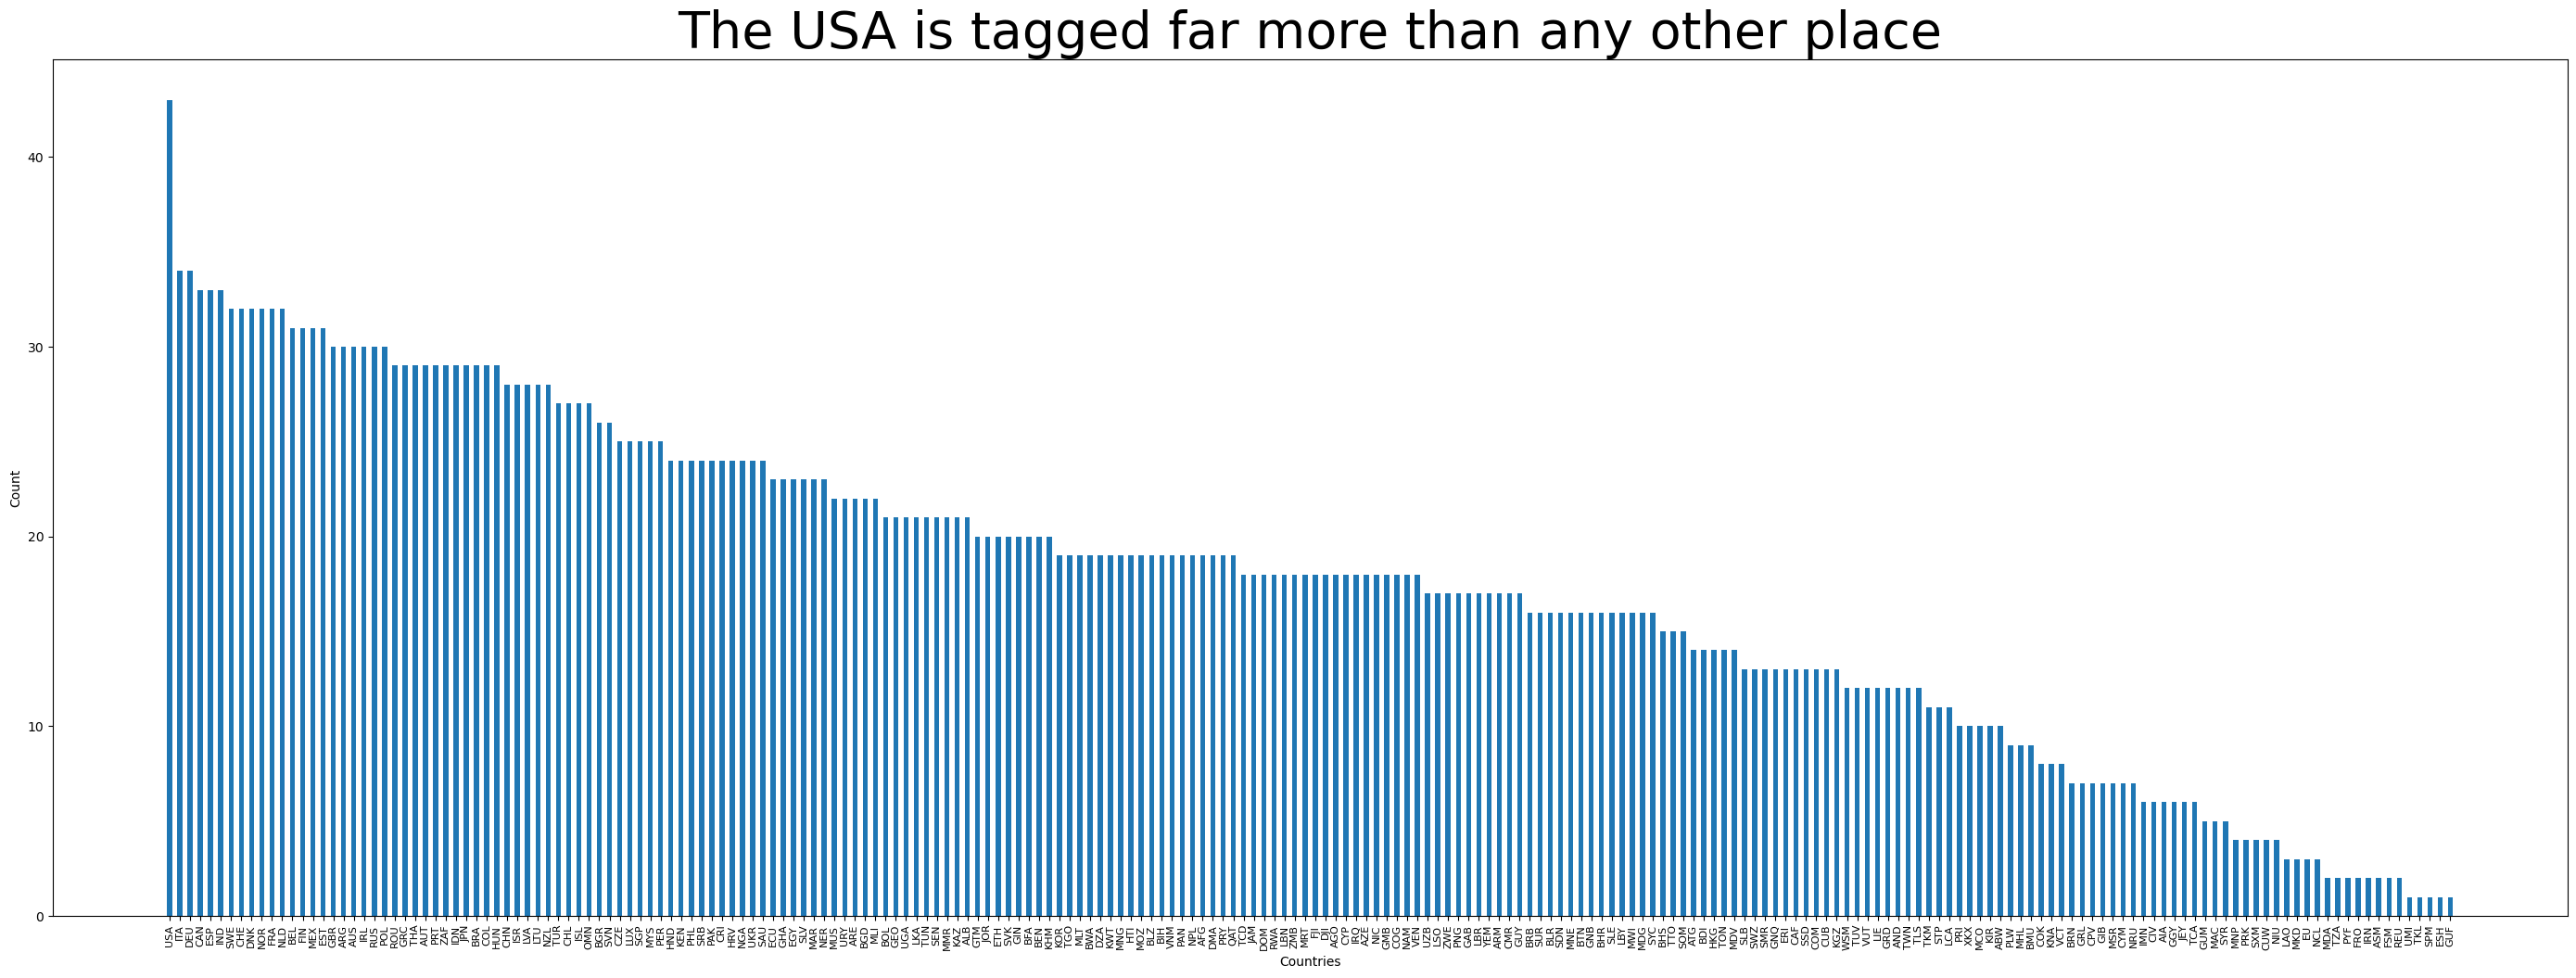

In [1101]:
# Makes barchart for the level of observation counts
plt.figure(figsize=[35.0, 12.0])
plt.bar(countries_tags_counts_frame.index, countries_tags_counts_frame['Count'], width = 0.5)
plt.xticks(rotation=90)
plt.title('The USA is tagged far more than any other place', fontsize = 40)
plt.xlabel('Countries')
plt.rc('xtick', labelsize=8)
plt.ylabel('Count')
plt.show()

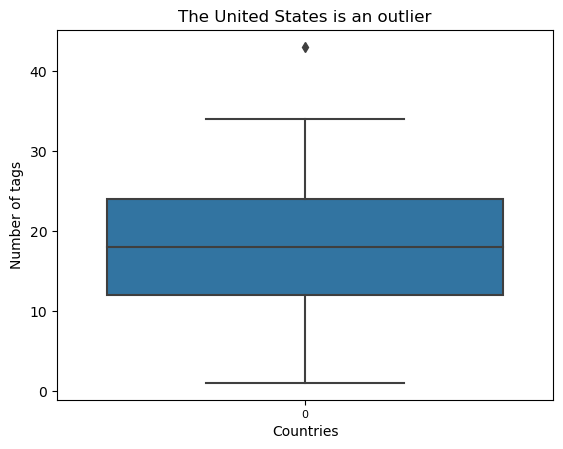

In [1074]:
# Puts the countries counts of the databases into a boxplot
plt.figure()
sns.boxplot(data=countries_tags_counts_frame['Count'])
plt.title('The United States is an outlier')
plt.xlabel('Countries')
plt.ylabel('Number of tags')
plt.show()

<div class="alert-info">
If we ignore the questions raised above about country-level tagging, these charts basically show that the United States is present in many more datasets than any other designation; and the median country and many others like it have around 20 tags. 
 
<br>
    
But what to do about the question of the tags? Let's look at the relevant columns. 
</div>

In [1107]:
# Shoes the columns that are relevant to georgraphy 
oxford_supertracker[['Title', 'Country Coverage', 'World Region', 'Level of Observation']].head(50)

Title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Country Coverage                                                                                                                                                                              World Region    Level of Observation
0                                                                                        #Masks4All                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         worldwide  worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa                national
1                                A global database on central banks' monetary responses to Covid-19                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  EU; DZA; ARG; AUS; BRA; CAN; CHL; CHN; COL; CZE; DNK; HKG; HUN; IND; IDN; ISR; JPN; KOR; KWT; MYS; MEX; MAR; NZL; NOR; PER; PHL; POL; ROU; SAU; SGP; ZAF; SWE; CHE; THA; TUR; ARE; GBR; USA; VNM  worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe                national
2                                                             CGD - COVID education po

<div class="alert-info">
It's hard to know what to do without checking through the datasets. We could reduce the 'country coverage' entries to 'worldwide' where that is entered, but that would leave ones that have just as many countries but aren't labelled as such. There are ways to deal with this, and perhaps we'll come back to them later. 
</div>

## Conclusion
<a id='conclusion'></a>

<div class="alert-info">
[Insert]
</div>

